<center> <img src="https://miro.medium.com/v2/resize:fit:1200/1*lbDXL0IuitCRz4mpZ7MmfQ.png" width=55% > </center>

<br><br>

<center> 
    <font size="6">Final Lab (Part 2): Image Classification using Convolutional Neural Networks </font>
</center>
<center> 
    <font size="4">Computer Vision 1 University of Amsterdam</font> 
</center>
<center> 
    <font size="4">Due 23:59PM, October 18, 2024 (Amsterdam time)</font> 
</center>
<center> 
    <font size="4"><b>TA's:  Yue, Konrad & Thies</b></font>
</center>

<br><br>

***

<br><br>

<center>

Student1 ID:  \
Student1 Name: 

Student2 ID: \
Student2 Name: 

Student3 ID: \
Student3 Name: 

( Student4 ID: \
Student4 Name: )

</center>

### **Coding Guidelines**

Your code must be handed in this Jupyter notebook, renamed to **StudentID1_StudentID2_StudentID3.ipynb** before the deadline by submitting it to the Canvas Final Lab: Image Classification Assignment. Please also fill out your names and IDs above.

For full credit, make sure your notebook follows these guidelines:

- Please express your thoughts **concisely**. The number of words does not necessarily correlate with how well you understand the concepts.
- Understand the problem as much as you can. When answering a question, provide evidence (qualitative and/or quantitative results, references to papers, figures, etc.) to support your arguments. Not everything might be explicitly asked for, so think about what might strengthen your arguments to make the notebook self-contained and complete.
- Tables and figures must be accompanied by a **brief** description. Add a number, a title, and, if applicable, the name and unit of variables in a table, and name and unit of axes and legends in a figure.

**Late submissions are not allowed.** Assignments submitted after the strict deadline will not be graded. In case of submission conflicts, TAs’ system clock is taken as reference. We strongly recommend submitting well in advance to avoid last-minute system failure issues.

**Environment:** Since this is a project-based assignment, you are free to use any feature descriptor and machine learning tools (e.g., K-means, SVM). You should use Python for your implementation. You are free to use any Python library for this assignment, but make sure to provide a conda environment file!

**Plagiarism Note:** Keep in mind that plagiarism (submitted materials which are not your work) is a serious offense and any misconduct will be addressed according to university regulations. This includes using generative tools such as ChatGPT.

**Ensure that you save all results/answers to the questions (even if you reuse some code).**

### **Report Preparation**

Your tasks include the following:

1. **Report Preparation:** For both parts of the final project, students are expected to prepare a report. The report should include all details on implementation approaches, analysis of results for different settings, and visualizations illustrating experiments and performance of your implementation. Grading will be based on the report, so it should be as self-contained as possible. If the report contains faulty results or ambiguities, TAs can refer to your code for clarification. 

2. **Explanation of Results:** Do not just provide numbers without explanation. Discuss different settings to show your understanding of the material and processes involved.

3. **Quantitative Evaluation:** For quantitative evaluation, you are expected to provide the results based on performance (accuracy, learning loss and learning curves). 

4. **Aim:** Understand the basic Image Classification pipeline using Convolutional Neural Nets (CNN's).

5. **Working on Assignments:** Students should work in assigned groups for **two** weeks. Any questions can be discussed on ED.

    - **Submission:** Submit your source code and report together in a zip file (`ID1_ID2_ID3_part2.zip`). The report should be a maximum of 10 pages (single-column, including tables and figures, excluding references and appendix). Express thoughts concisely. Tables and figures must be accompanied by a description. Number them and, if applicable, name variables in tables, and label axes in figures.

6. **Hyperparameter Search:** In your experiments, remember to perform a hyperparameter search to find the optimal settings for your model(s). Clearly document the search process, the parameters you explored, and how they influenced the performance of your model.

8. **Format and Testing:** The report should be in **PDF format**, and the code in **.ipynb format**. Test that all functionality works as expected in the notebook.

### **Overview**

- [Section 1: Image Classification on CIFAR-100 (0 points)](#section-1)
- [Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)](#section-2)
- [Section 3: TwoLayerNet Architecture (2 points)](#section-3)
- [Section 4: ConvNet Architecture (2 points)](#section-4)
- [Section 5: Preparation of Training (7 points)](#section-5)
- [Section 6: Training the Networks (5 points)](#section-6)
- [Section 7: Setting Up the Hyperparameters (14 points)](#section-7)
- [Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)](#section-8)
- [Section 9: Fine-tuning ConvNet on STL-10 (14 points)](#section-9)
- [Section 10: Bonus Challenge (optional)](#section-10)
- [Section X: Individual Contribution Report (Mandatory)](#section-x)

### **Section 1: Image Classification on CIFAR-100 (0 points)**

The goal of this lab is to implement an image classification system using Convolutional Neural Networks (CNNs) that can identify objects from a set of classes in the [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). You will implement and compare two different architectures: a simple two-layer network and a ConvNet based on the LeNet architecture.

The CIFAR-100 dataset contains 32x32 pixel RGB images, categorized into 100 different classes. The dataset will be automatically downloaded and loaded using the code provided in this notebook.

You will train and test your classification system using the entire CIFAR-100 dataset. Ensure that the test images are excluded from training to maintain a fair evaluation of the model's performance.

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

from PIL import Image
from torchinfo import summary
from torch.utils.data import DataLoader, Dataset, random_split
from tqdm import tqdm
from sklearn import metrics

In [111]:
# Define the transformations

transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
])

    
# Load the CIFAR-100 training set
train_set = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)

# Load the CIFAR-100 test set
test_set = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

# Create data loaders for the entire CIFAR-100 dataset
train_data_loader = DataLoader(train_set, shuffle=True)
test_data_loader = DataLoader(test_set, shuffle=False)

print("Data loaders for CIFAR-100 are ready for use.")



In [ ]:
# Define CIFAR-100 superclasses and their subclasses
superclasses = {
    'aquatic mammals': ['beaver', 'dolphin', 'otter', 'seal', 'whale'],
    'fish': ['aquarium_fish', 'flatfish', 'ray', 'shark', 'trout'],
    'flowers': ['orchid', 'poppy', 'rose', 'sunflower', 'tulip'],
    'food containers': ['bottle', 'bowl', 'can', 'cup', 'plate'],
    'fruit and vegetables': ['apple', 'mushroom', 'orange', 'pear', 'sweet_pepper'],
    'household electrical devices': ['clock', 'keyboard', 'lamp', 'telephone', 'television'],
    'household furniture': ['bed', 'chair', 'couch', 'table', 'wardrobe'],
    'insects': ['bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach'],
    'large carnivores': ['bear', 'leopard', 'lion', 'tiger', 'wolf'],
    'large man-made outdoor things': ['bridge', 'castle', 'house', 'road', 'skyscraper'],
    'large natural outdoor scenes': ['cloud', 'forest', 'mountain', 'plain', 'sea'],
    'large omnivores and herbivores': ['camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo'],
    'medium-sized mammals': ['fox', 'porcupine', 'possum', 'raccoon', 'skunk'],
    'non-insect invertebrates': ['crab', 'lobster', 'snail', 'spider', 'worm'],
    'people': ['baby', 'boy', 'girl', 'man', 'woman'],
    'reptiles': ['crocodile', 'dinosaur', 'lizard', 'snake', 'turtle'],
    'small mammals': ['hamster', 'mouse', 'rabbit', 'shrew', 'squirrel'],
    'trees': ['maple_tree', 'oak_tree', 'palm_tree', 'pine_tree', 'willow_tree'],
    'vehicles 1': ['bicycle', 'bus', 'motorcycle', 'pickup_truck', 'train'],
    'vehicles 2': ['lawn_mower', 'rocket', 'streetcar', 'tank', 'tractor']
}

# List of all CIFAR-100 classes
classes = ('apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 
           'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
           'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
           'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
           'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
           'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea',
           'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
           'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 
           'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm')

# Create a mapping of class names to their indices
class_to_idx = {cls_name: idx for idx, cls_name in enumerate(classes)}

# Create a mapping of superclasses to their corresponding class indices
superclass_to_indices = {supcls: [class_to_idx[cls] for cls in subclasses] for supcls, subclasses in superclasses.items()}

<a id="section-2"></a>
### **Section 2: Visualizing CIFAR-100 Classes and Subclasses (3 points)**

In this section, you will implement a function to visualize the CIFAR-100 dataset, including **all** superclasses and their corresponding subclasses. Your implementation should provide a clear and organized overview of the dataset's diversity.

You add the figure(s) to appendix of your report and refer to it in the main text.

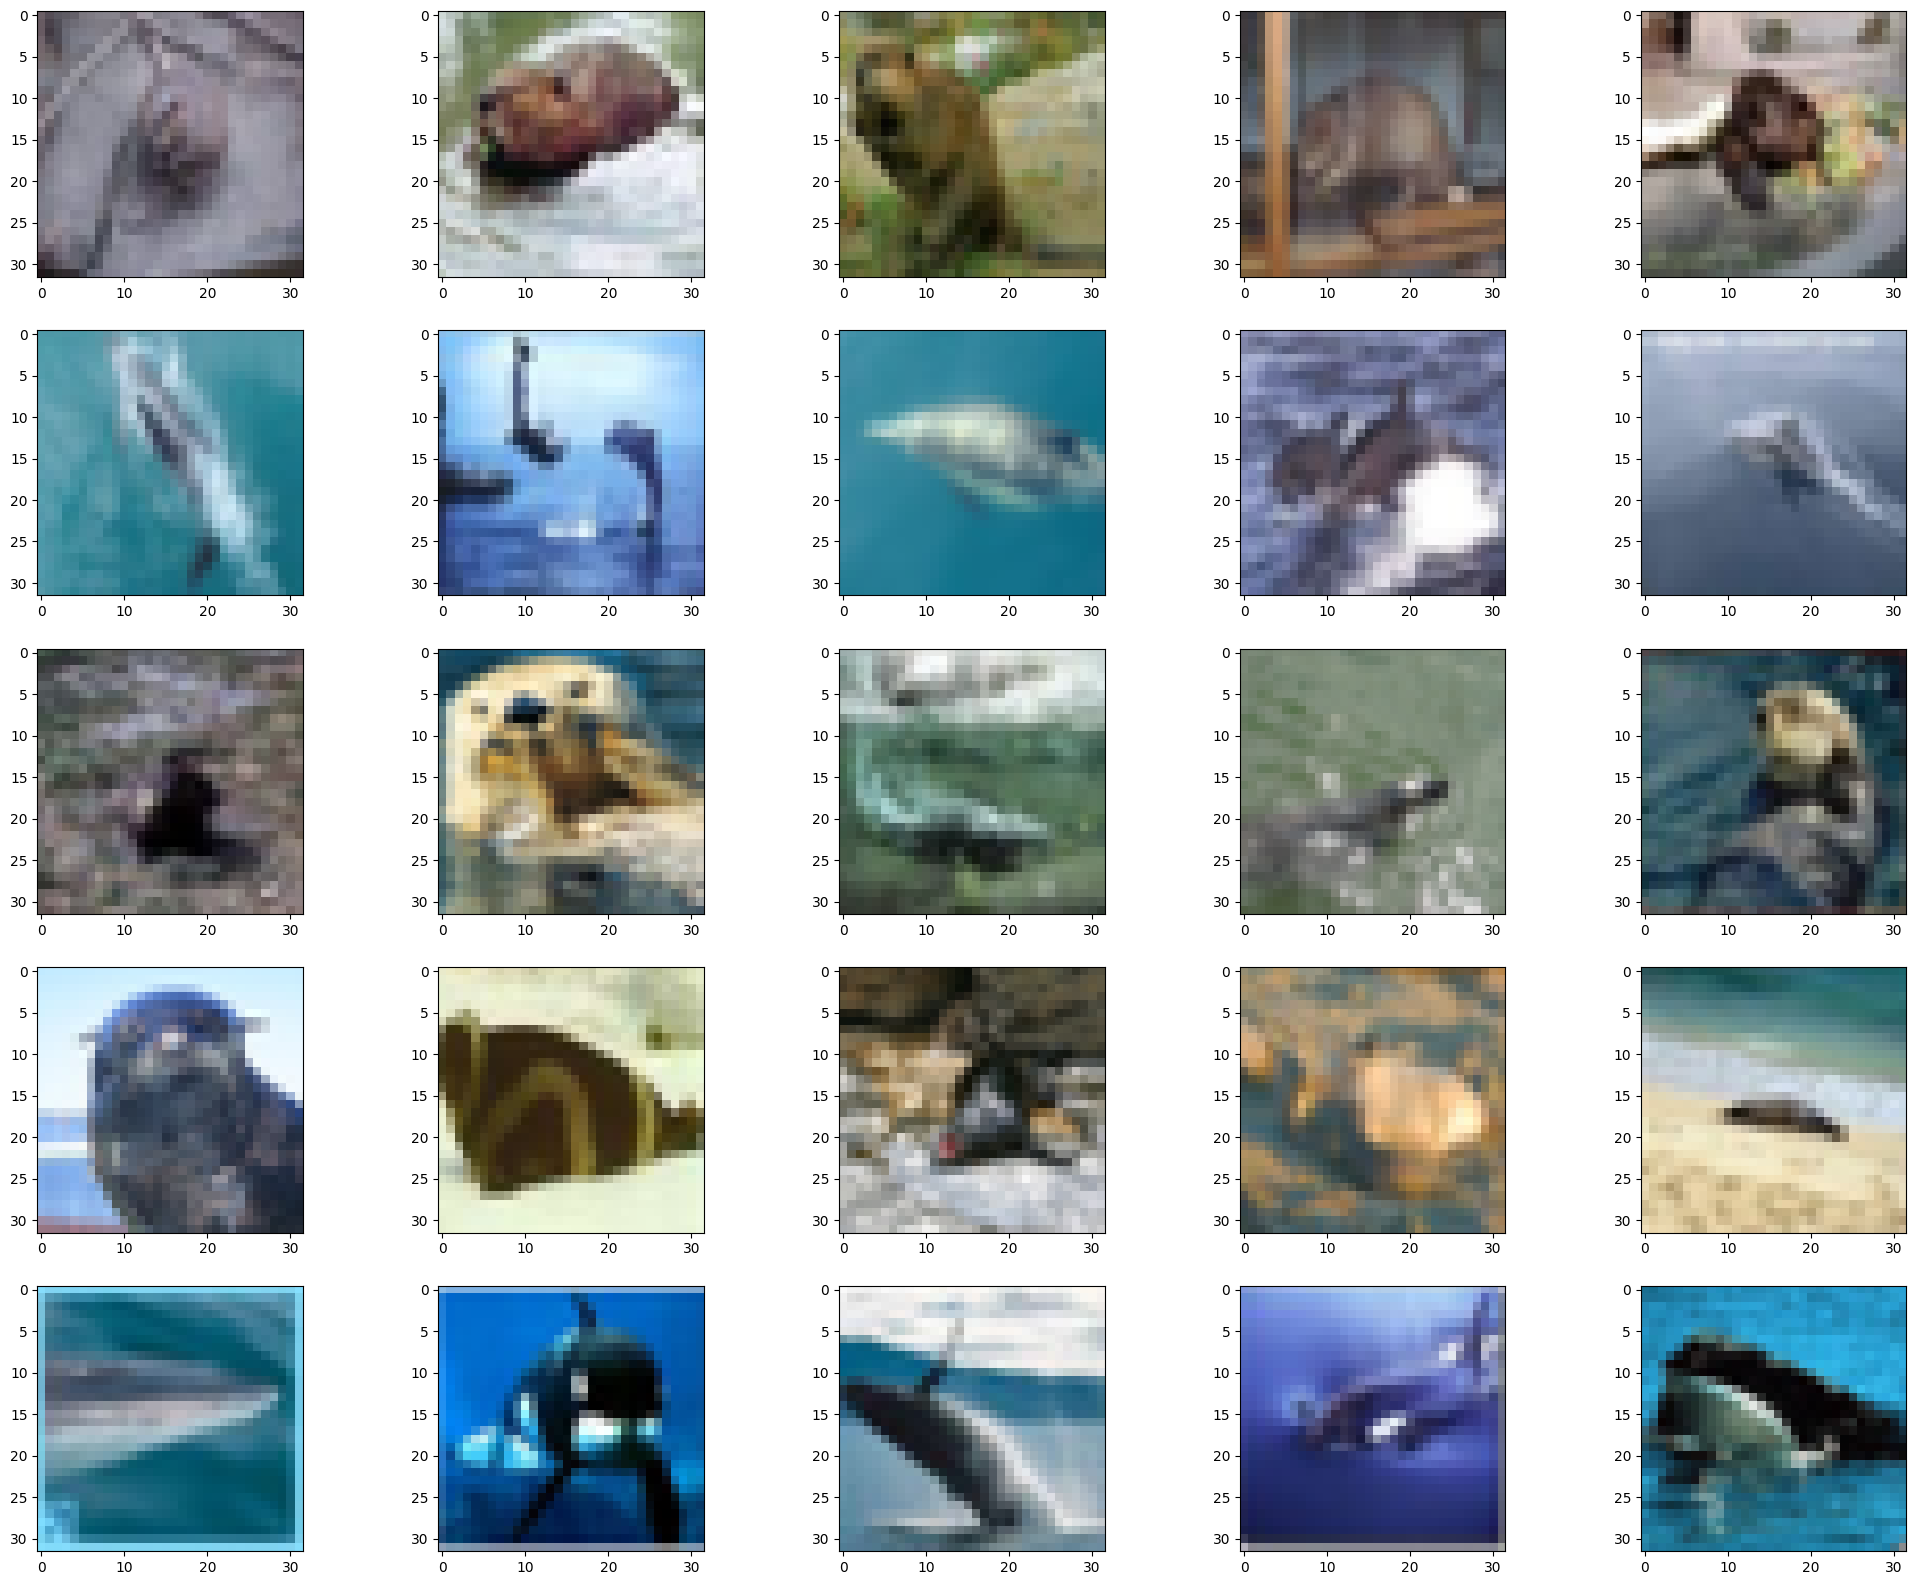

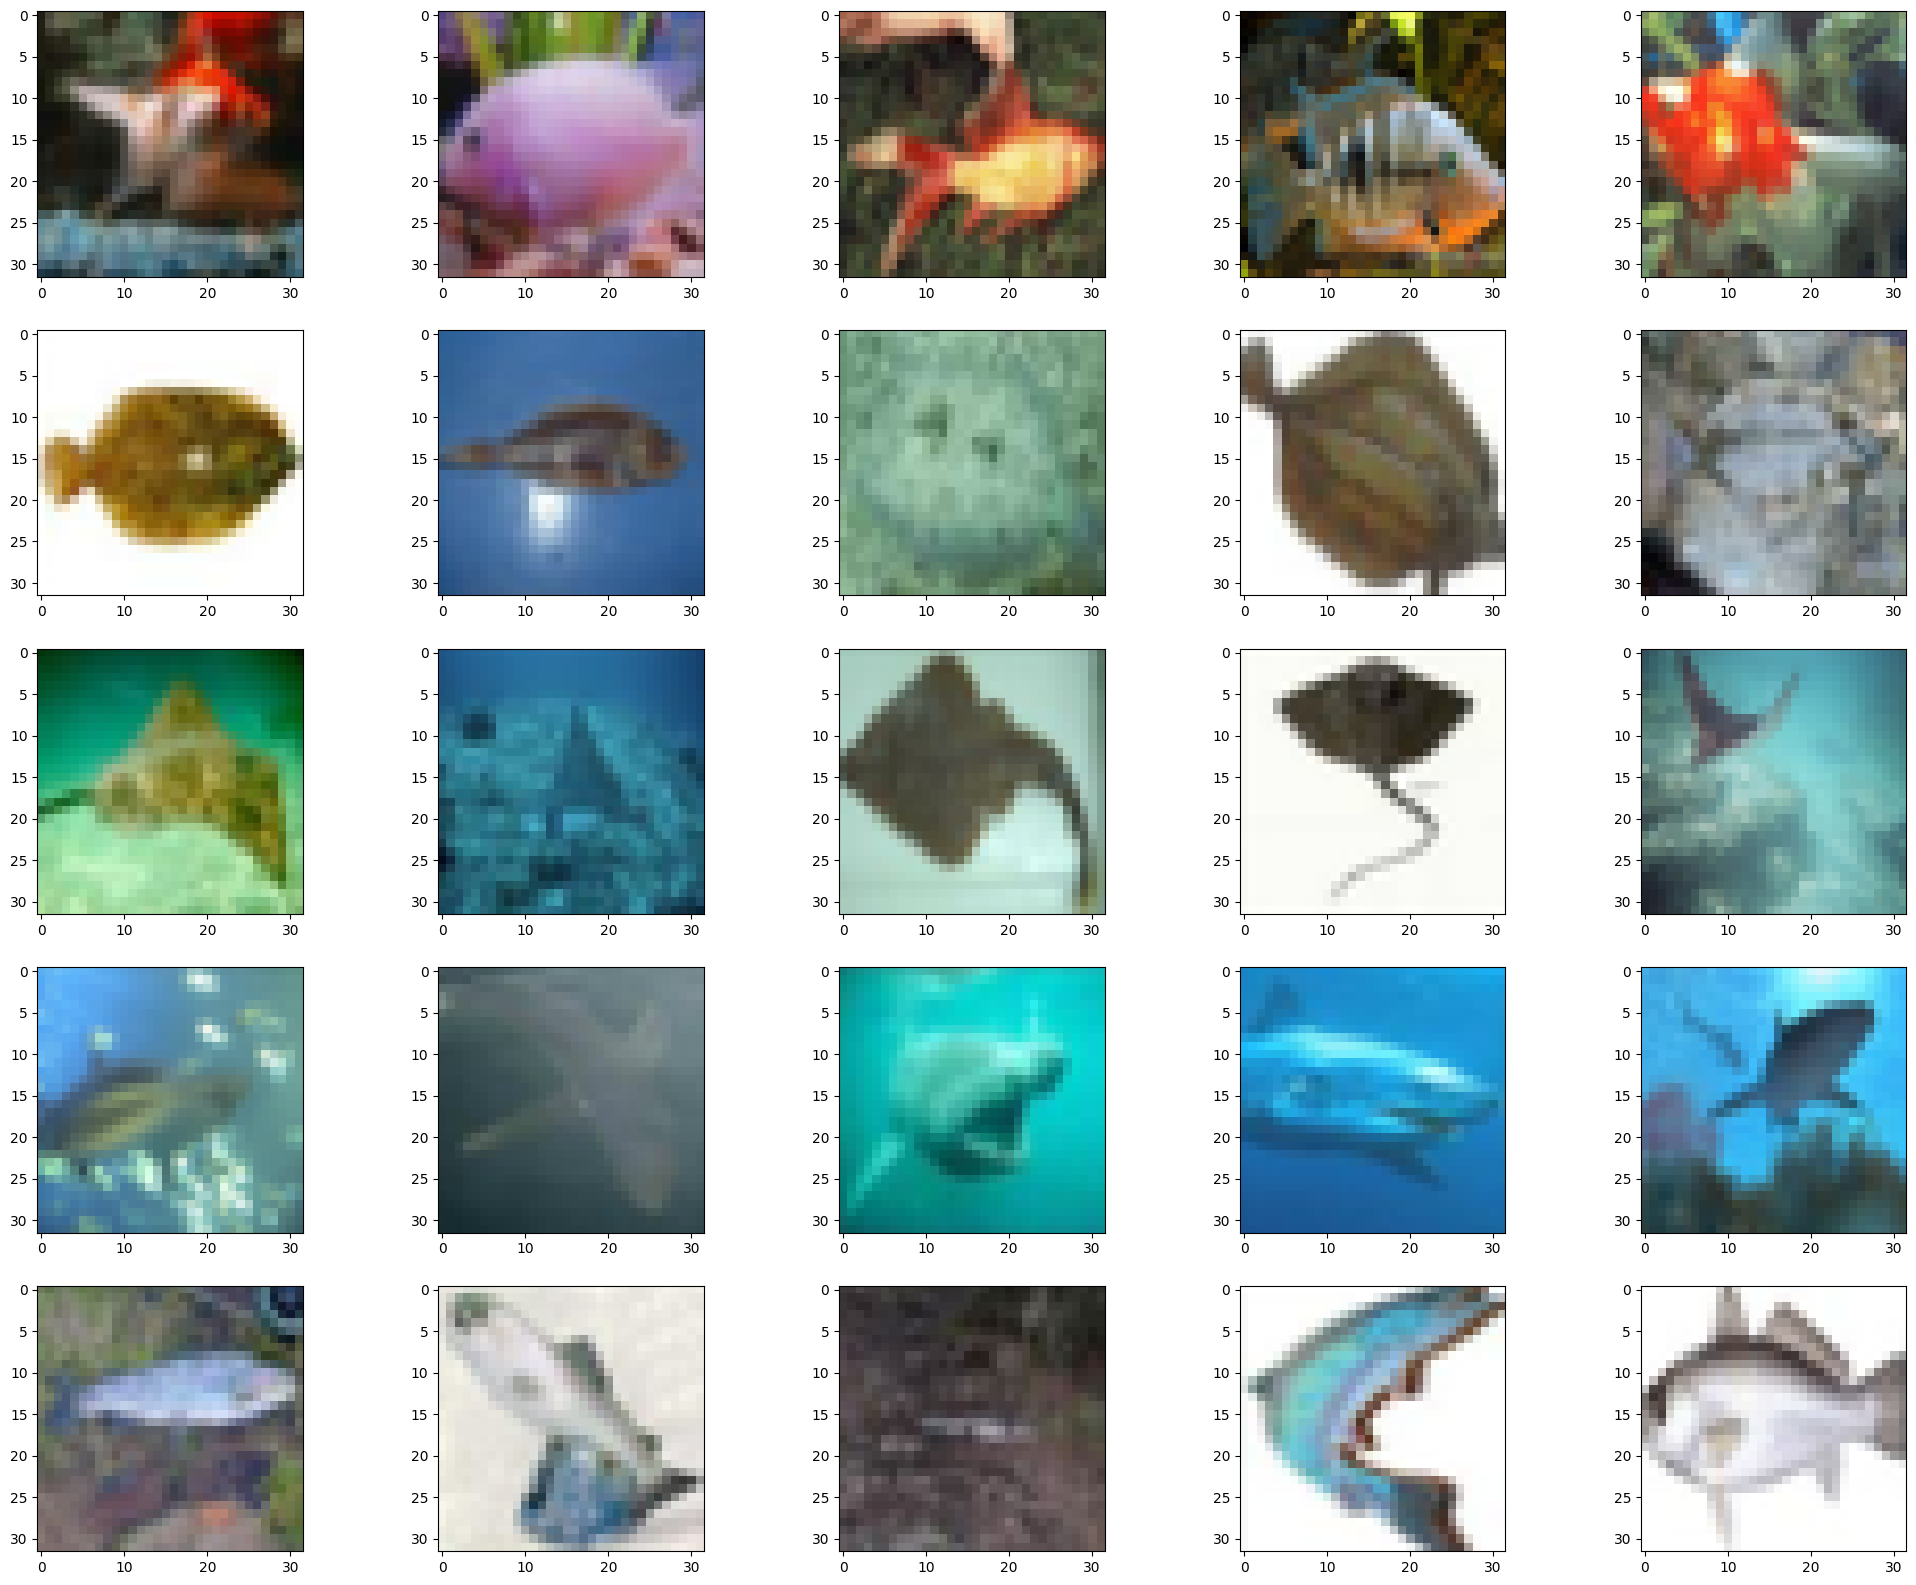

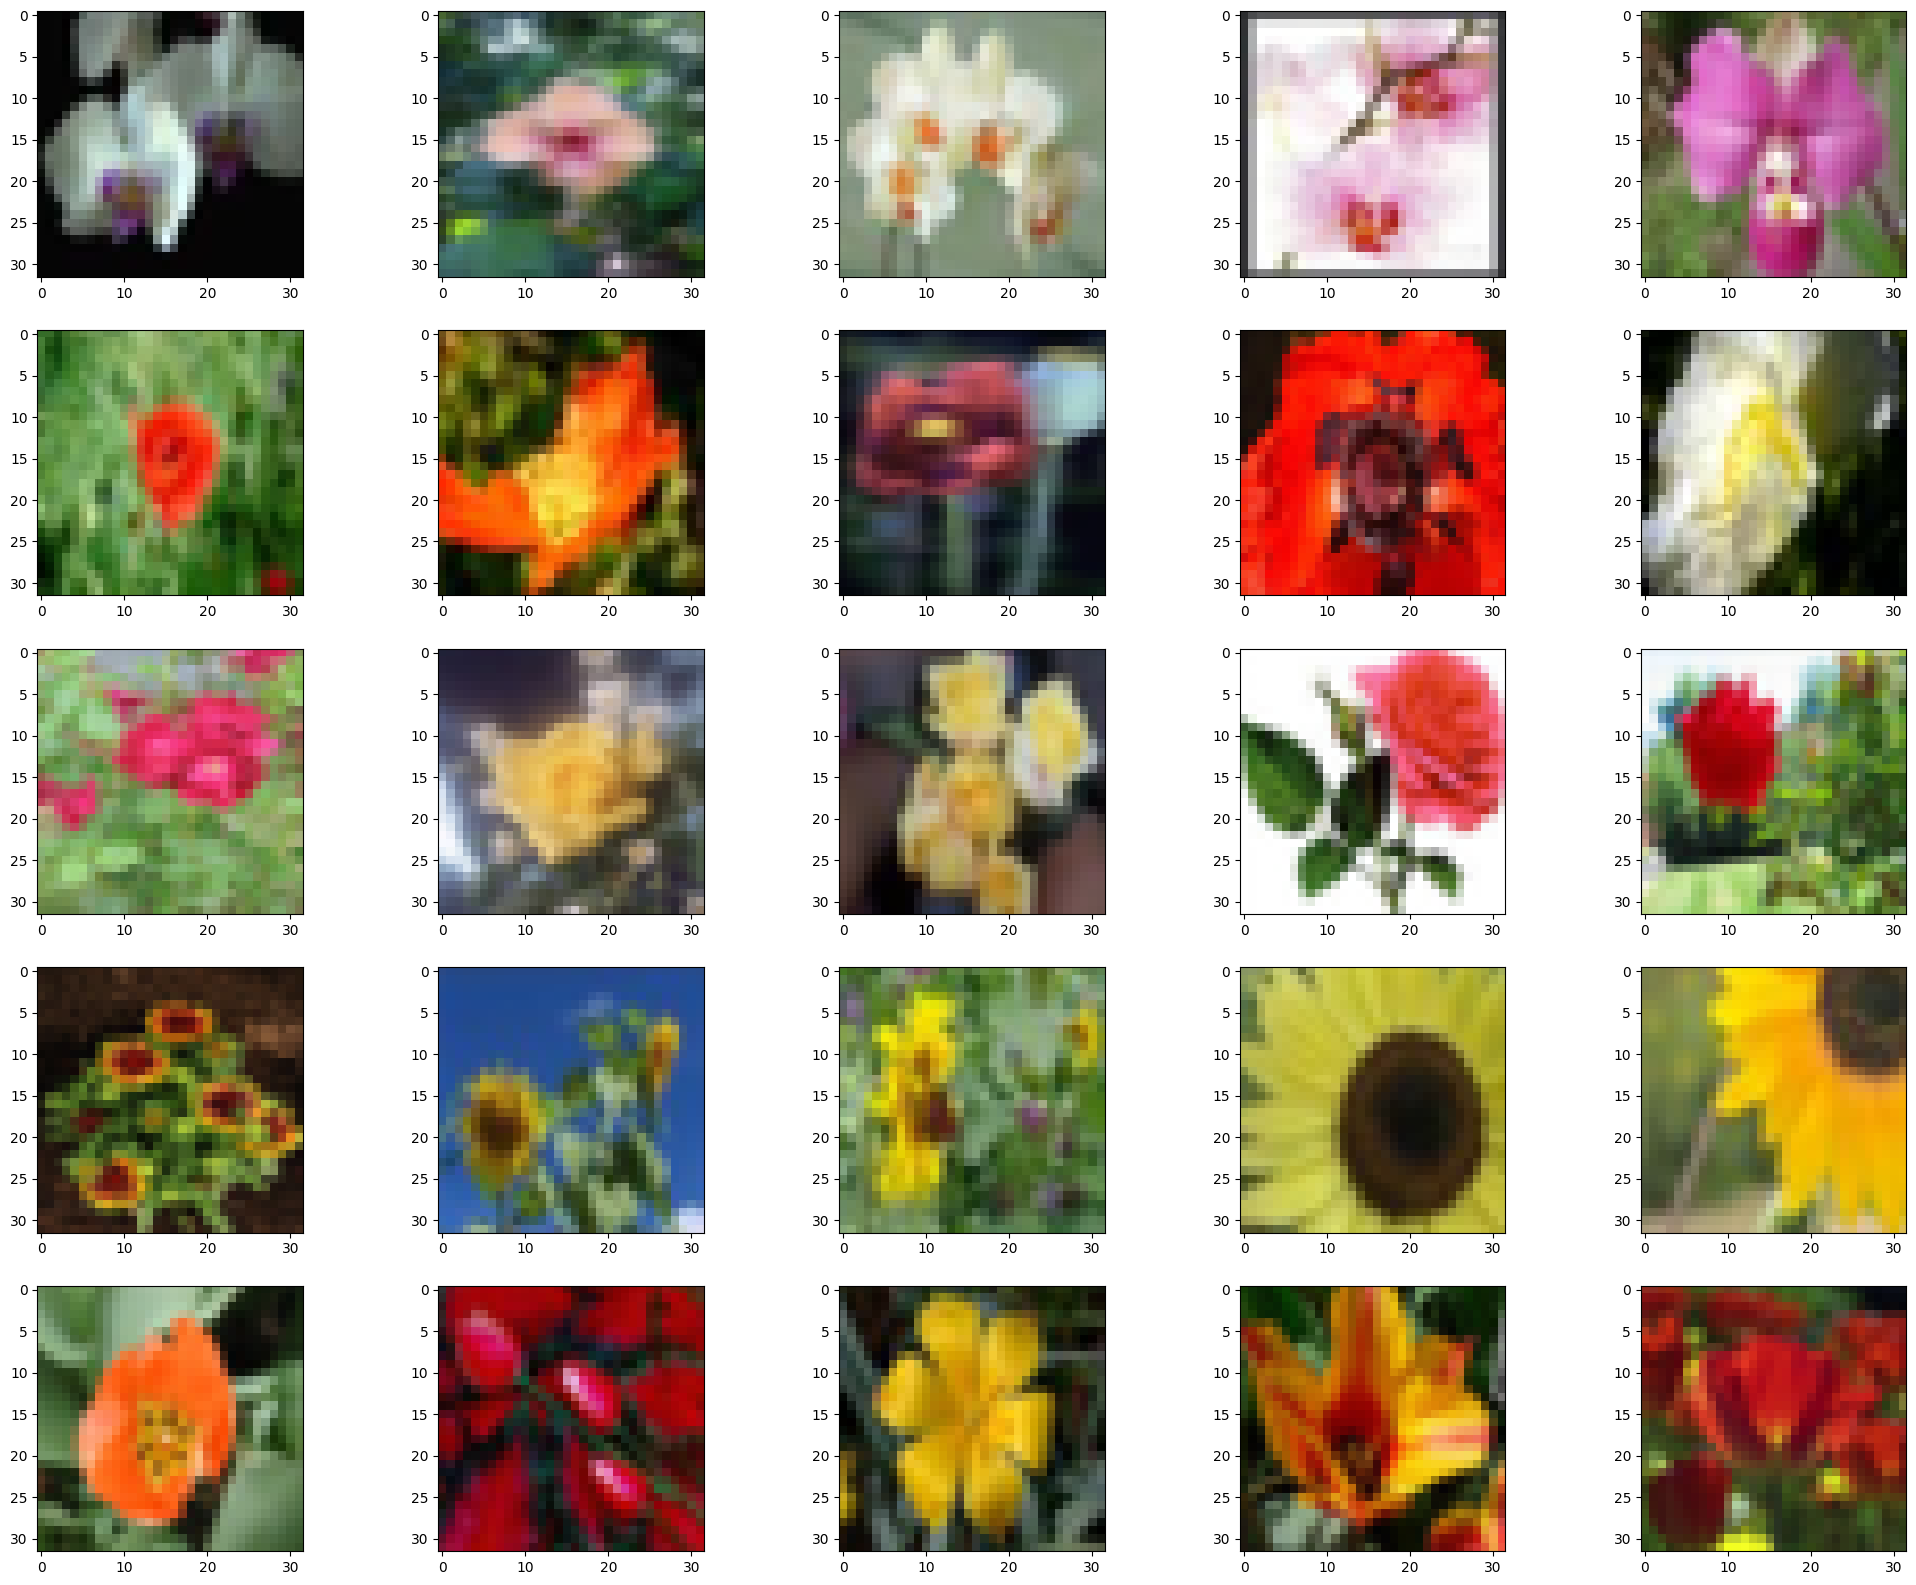

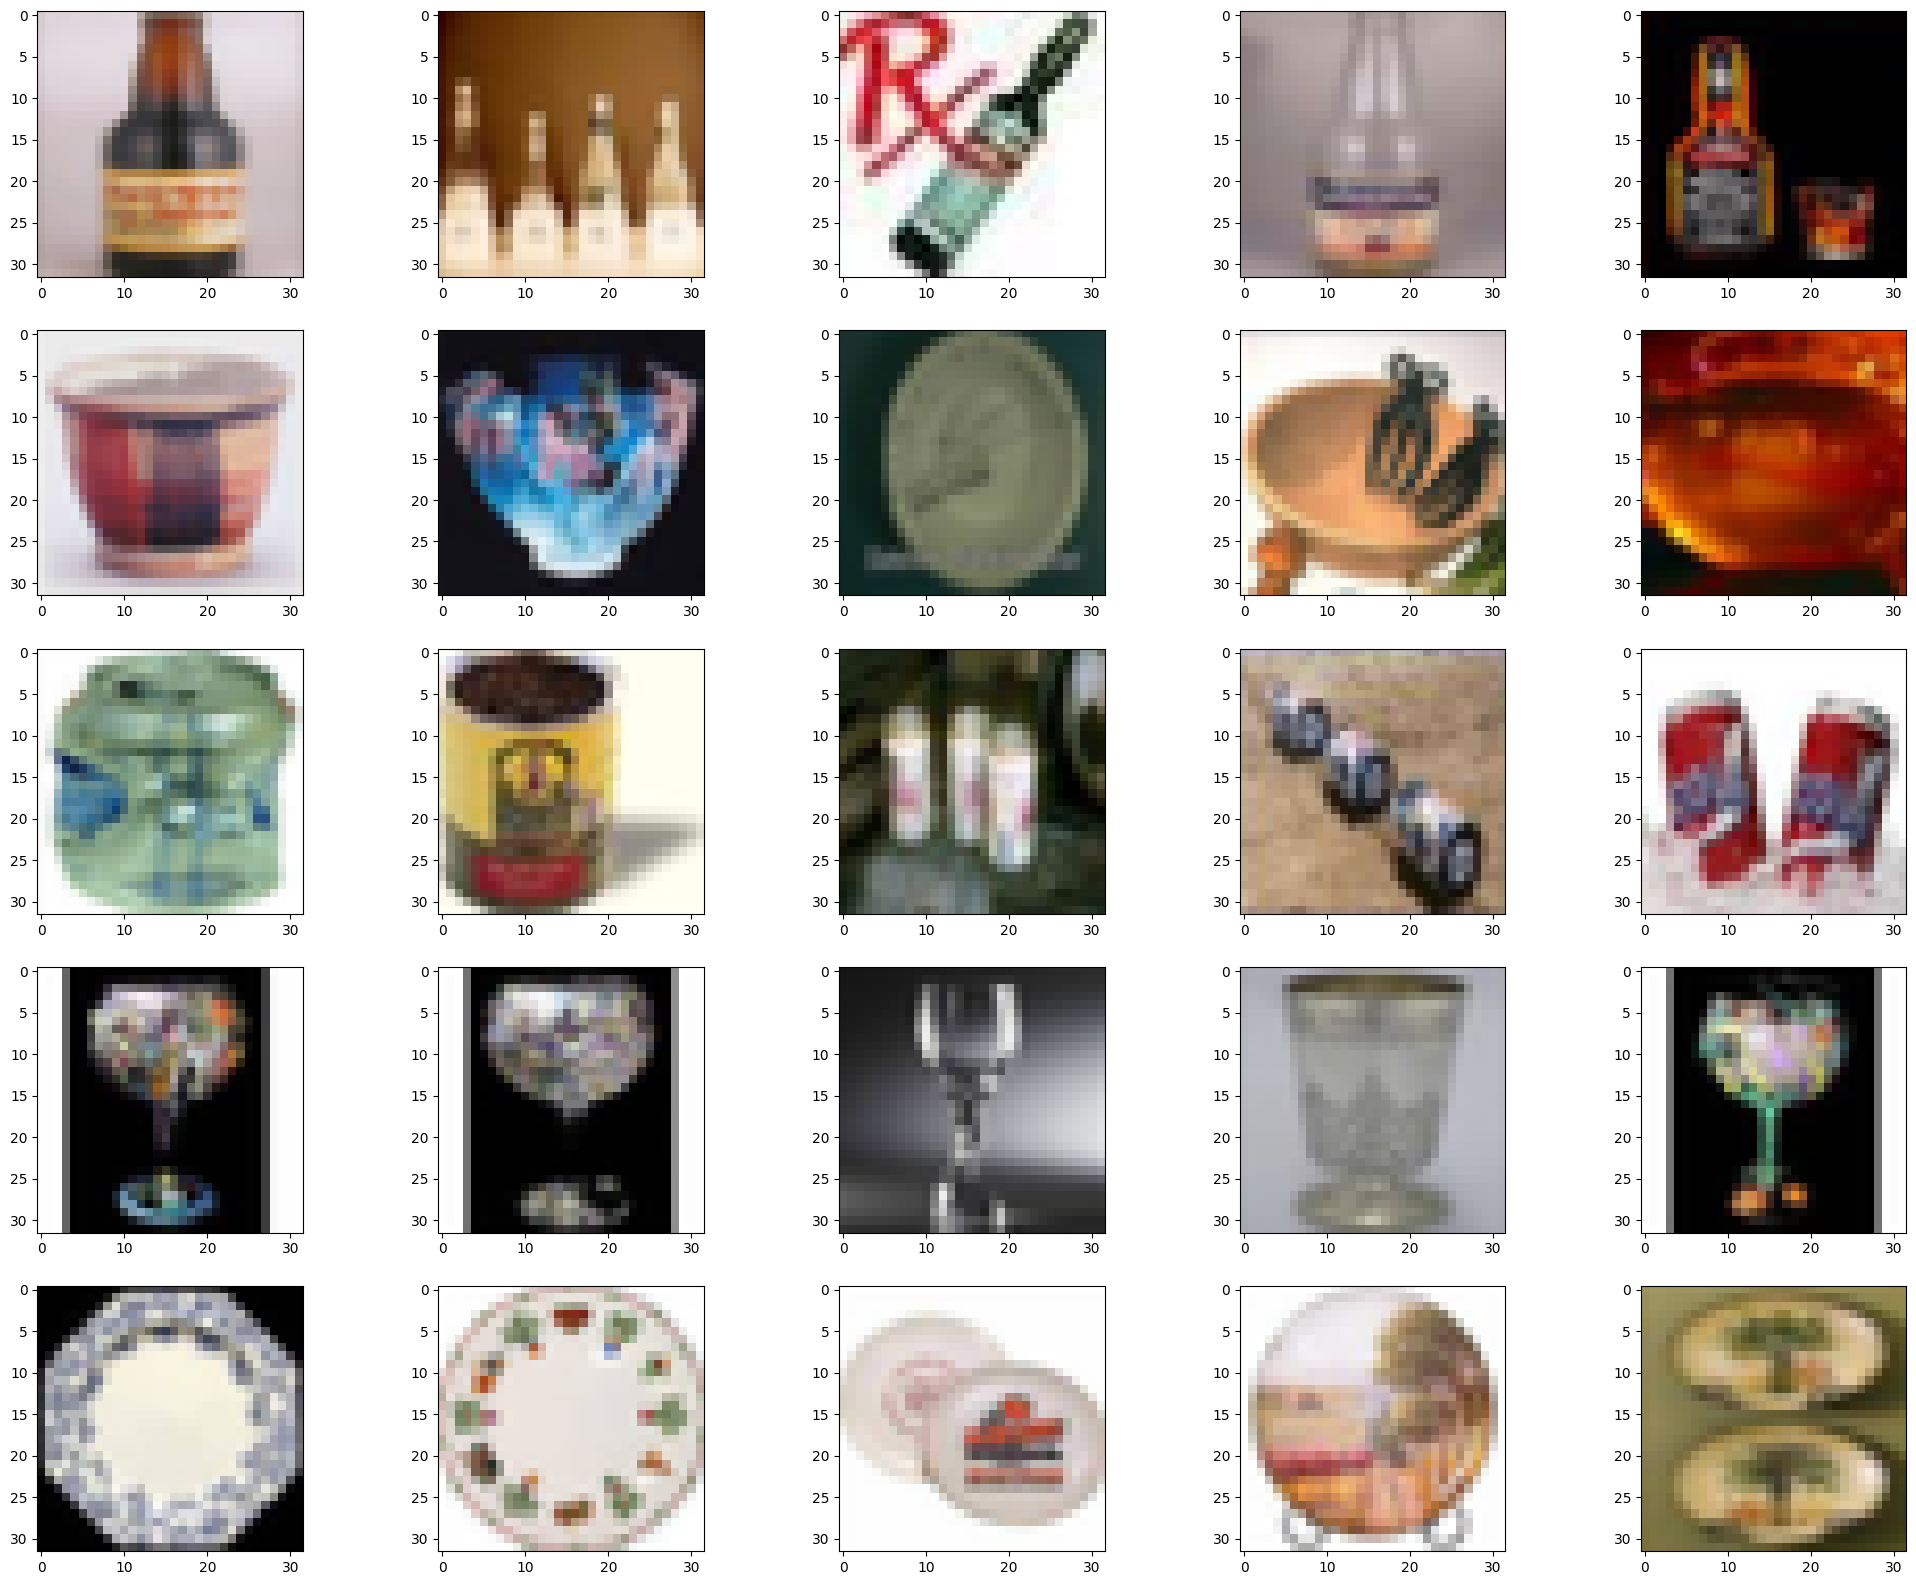

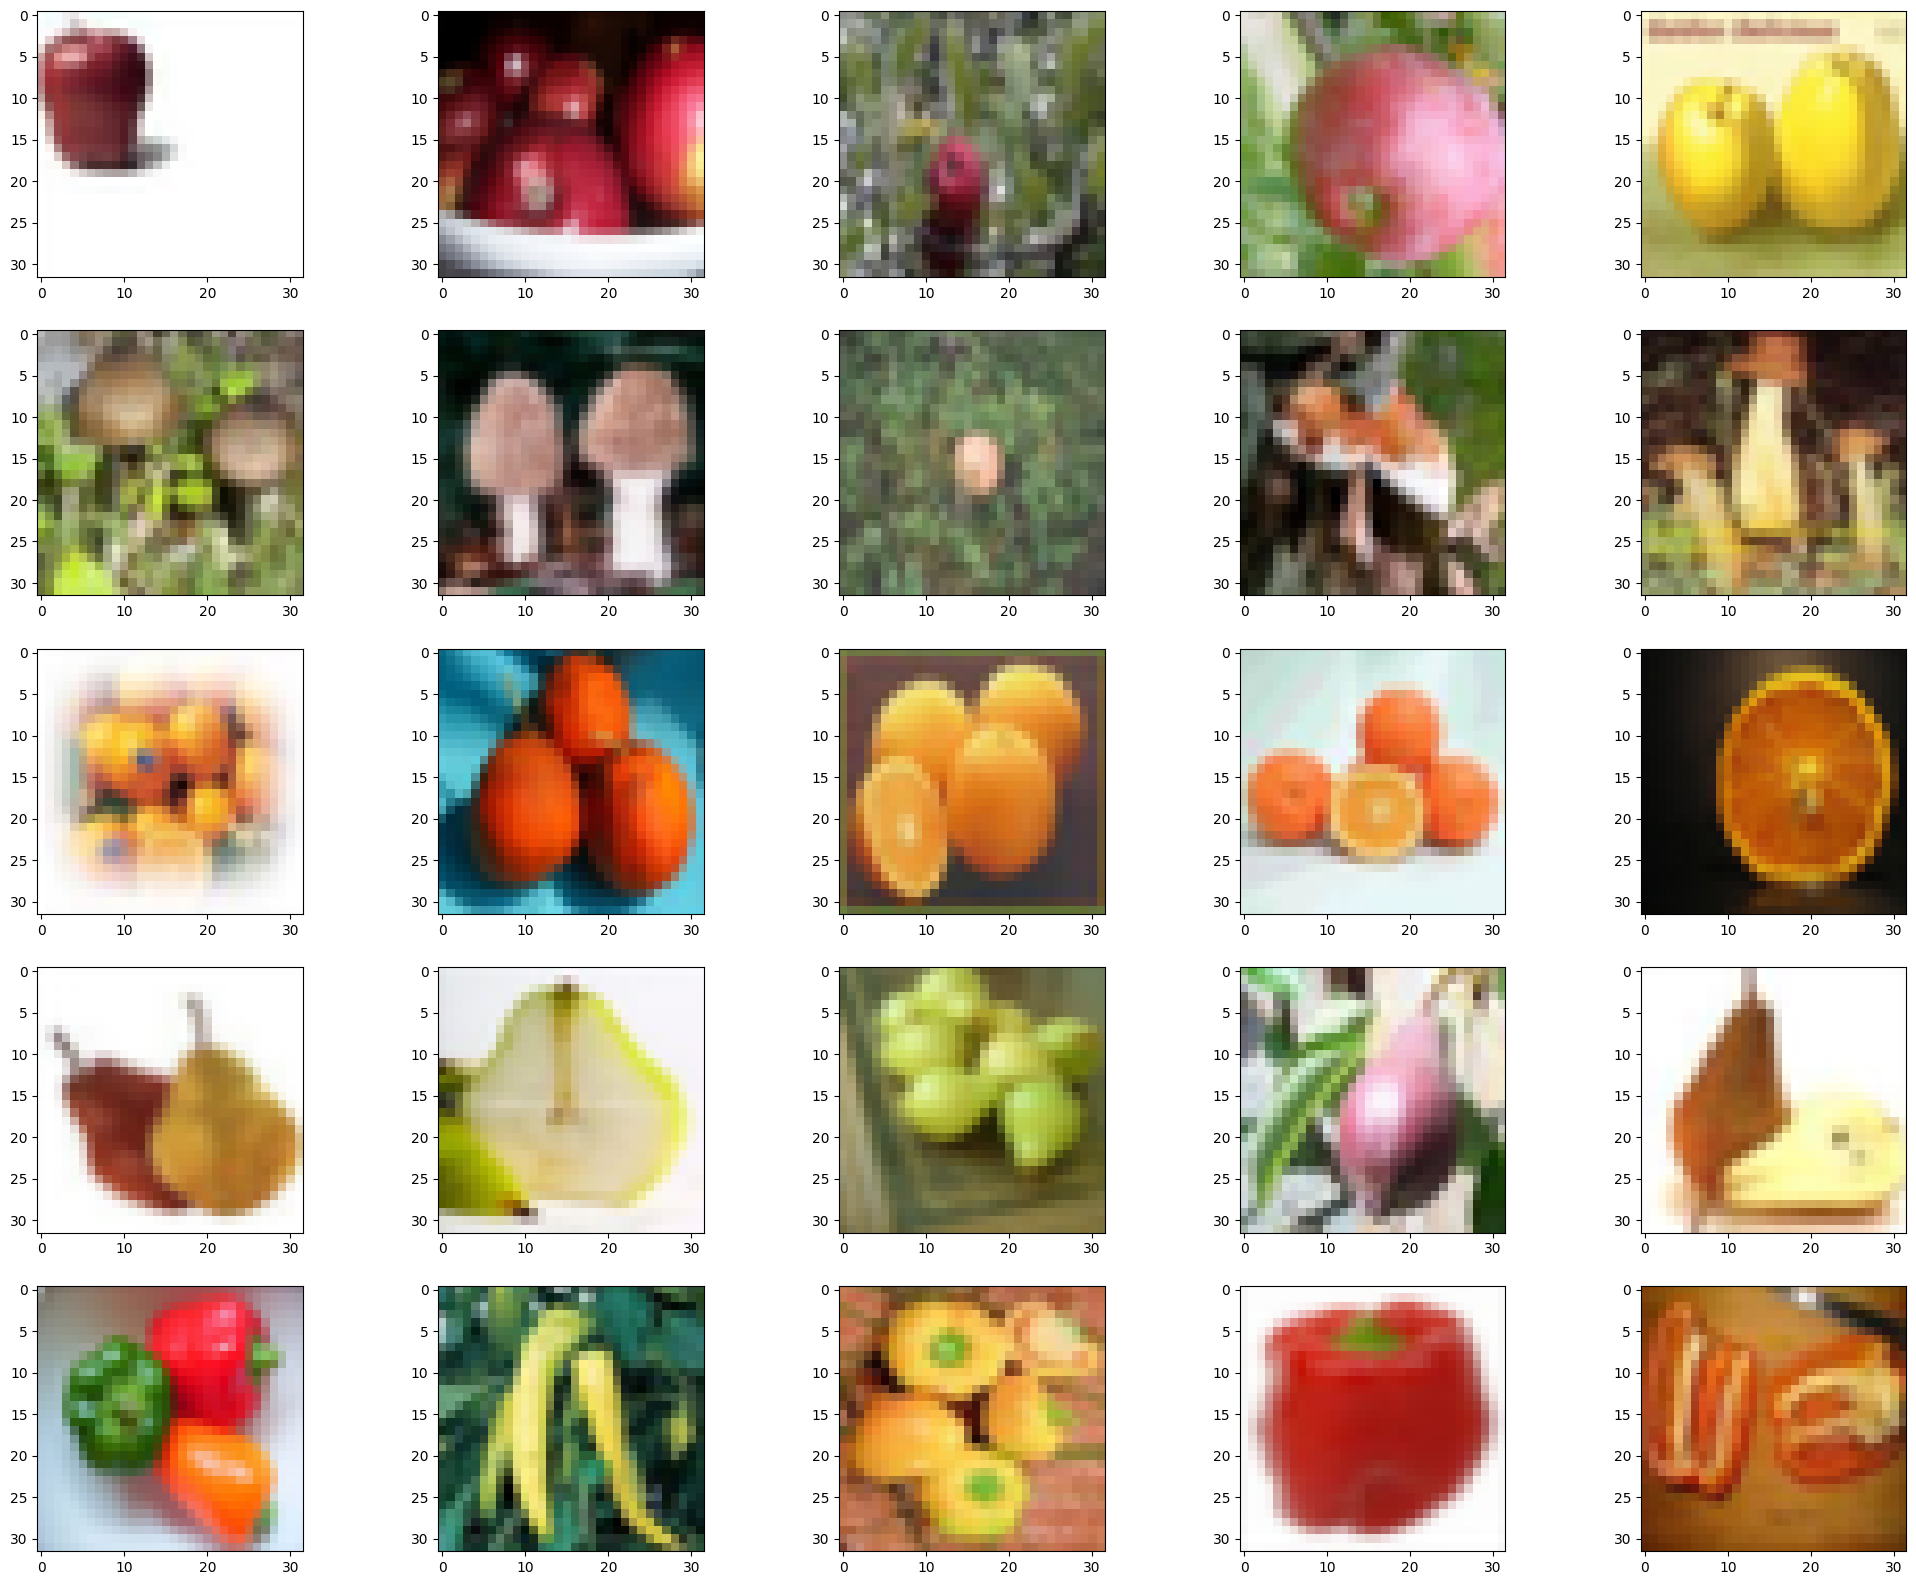

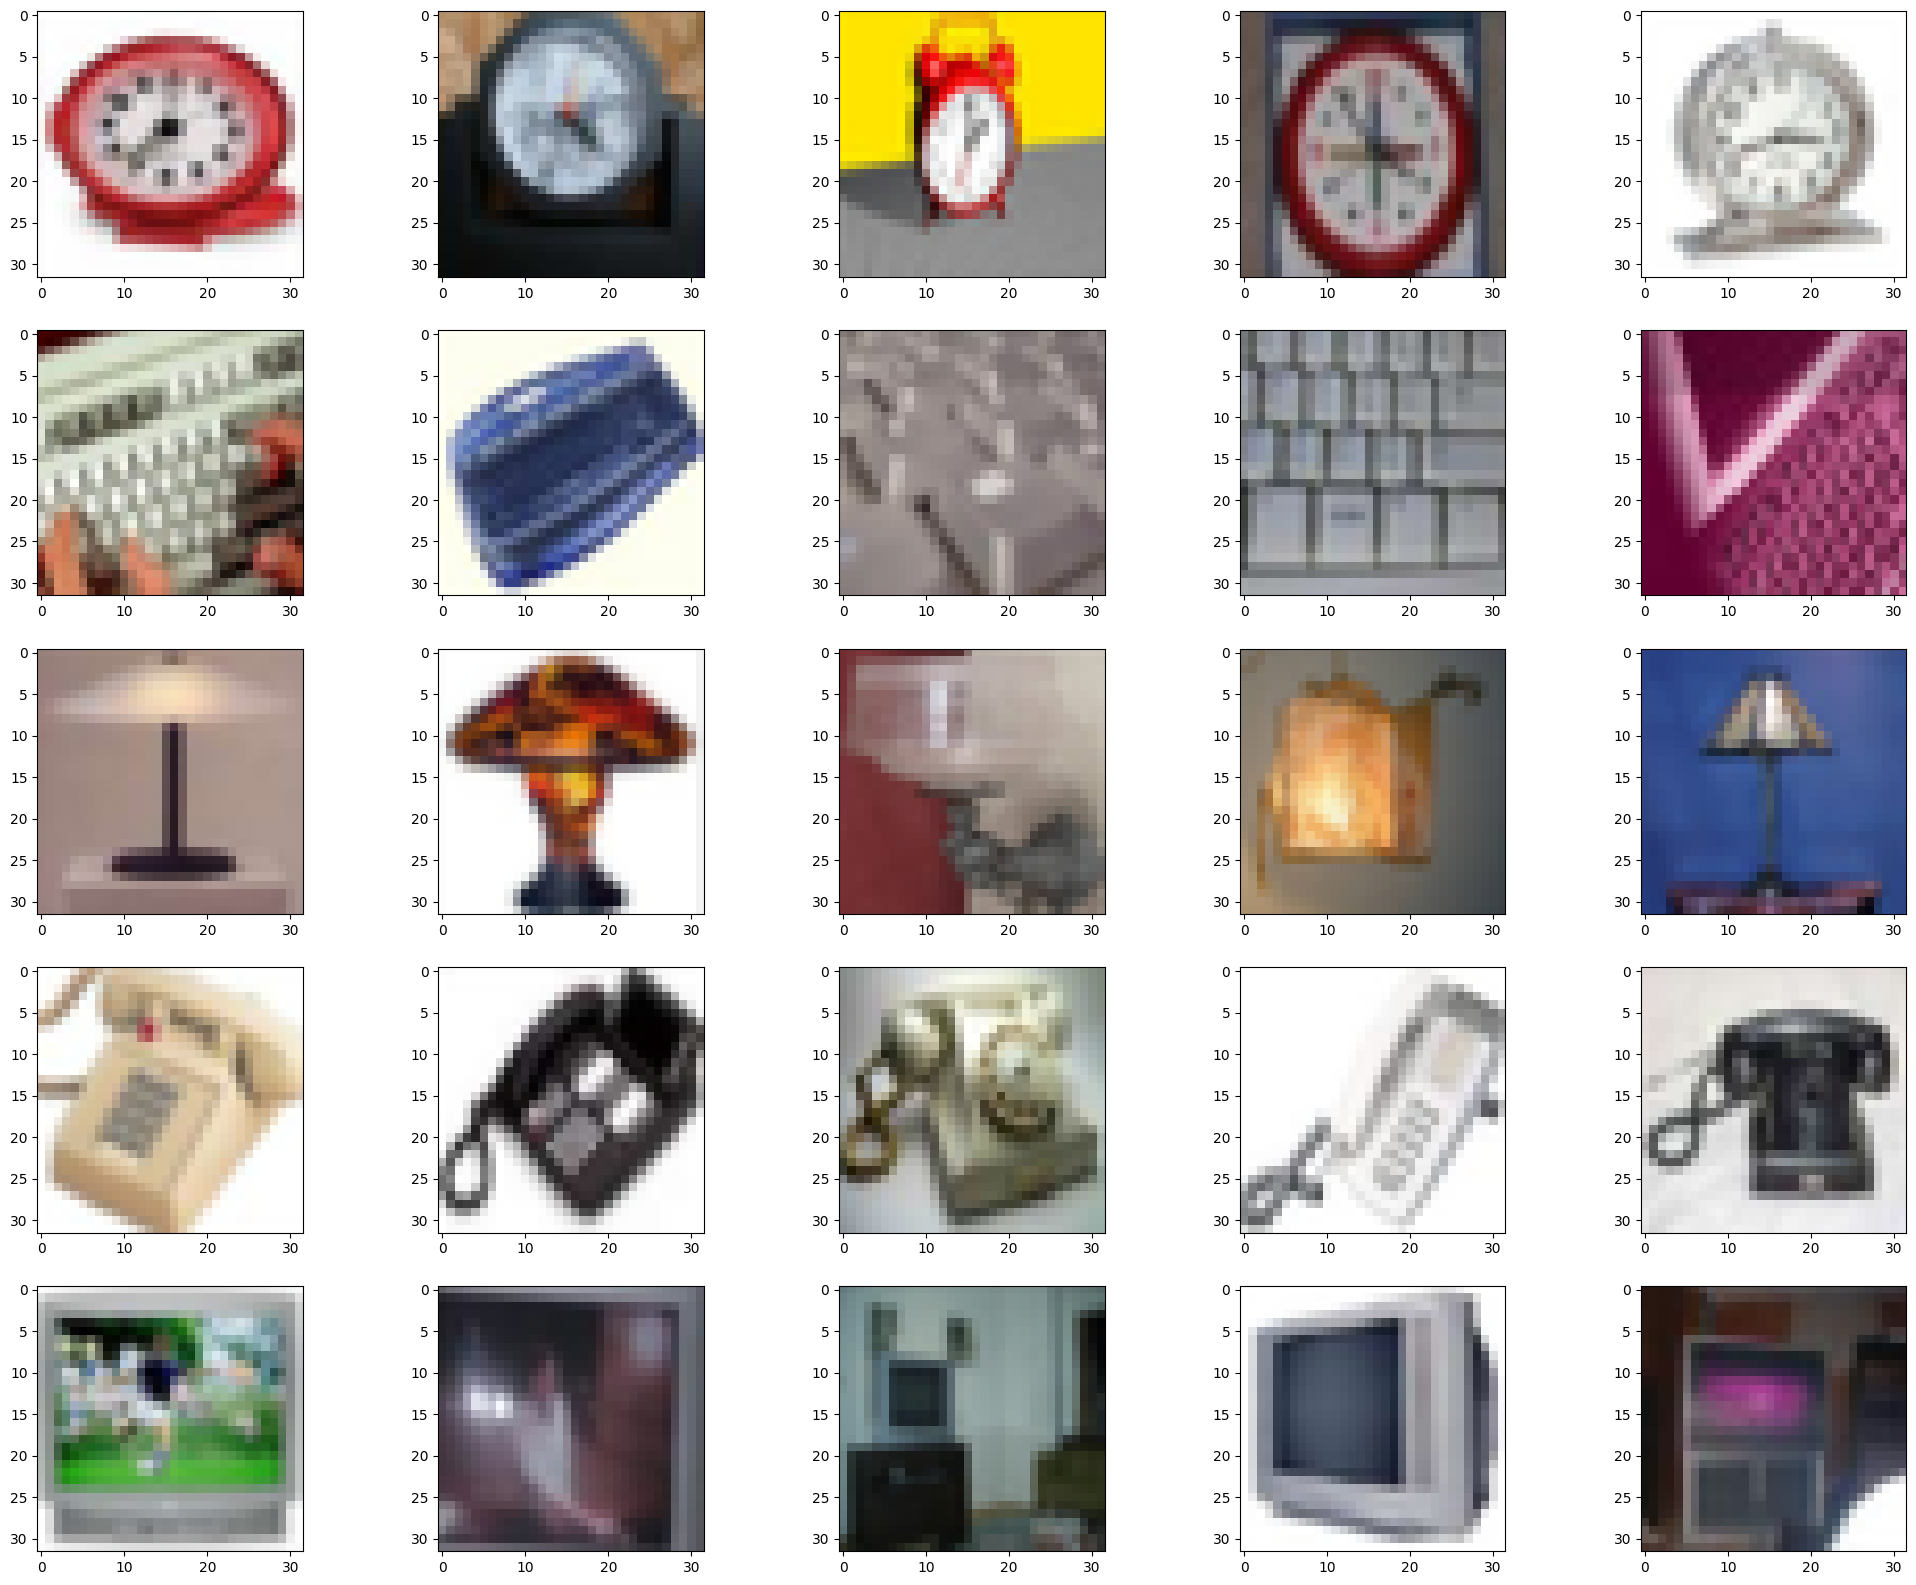

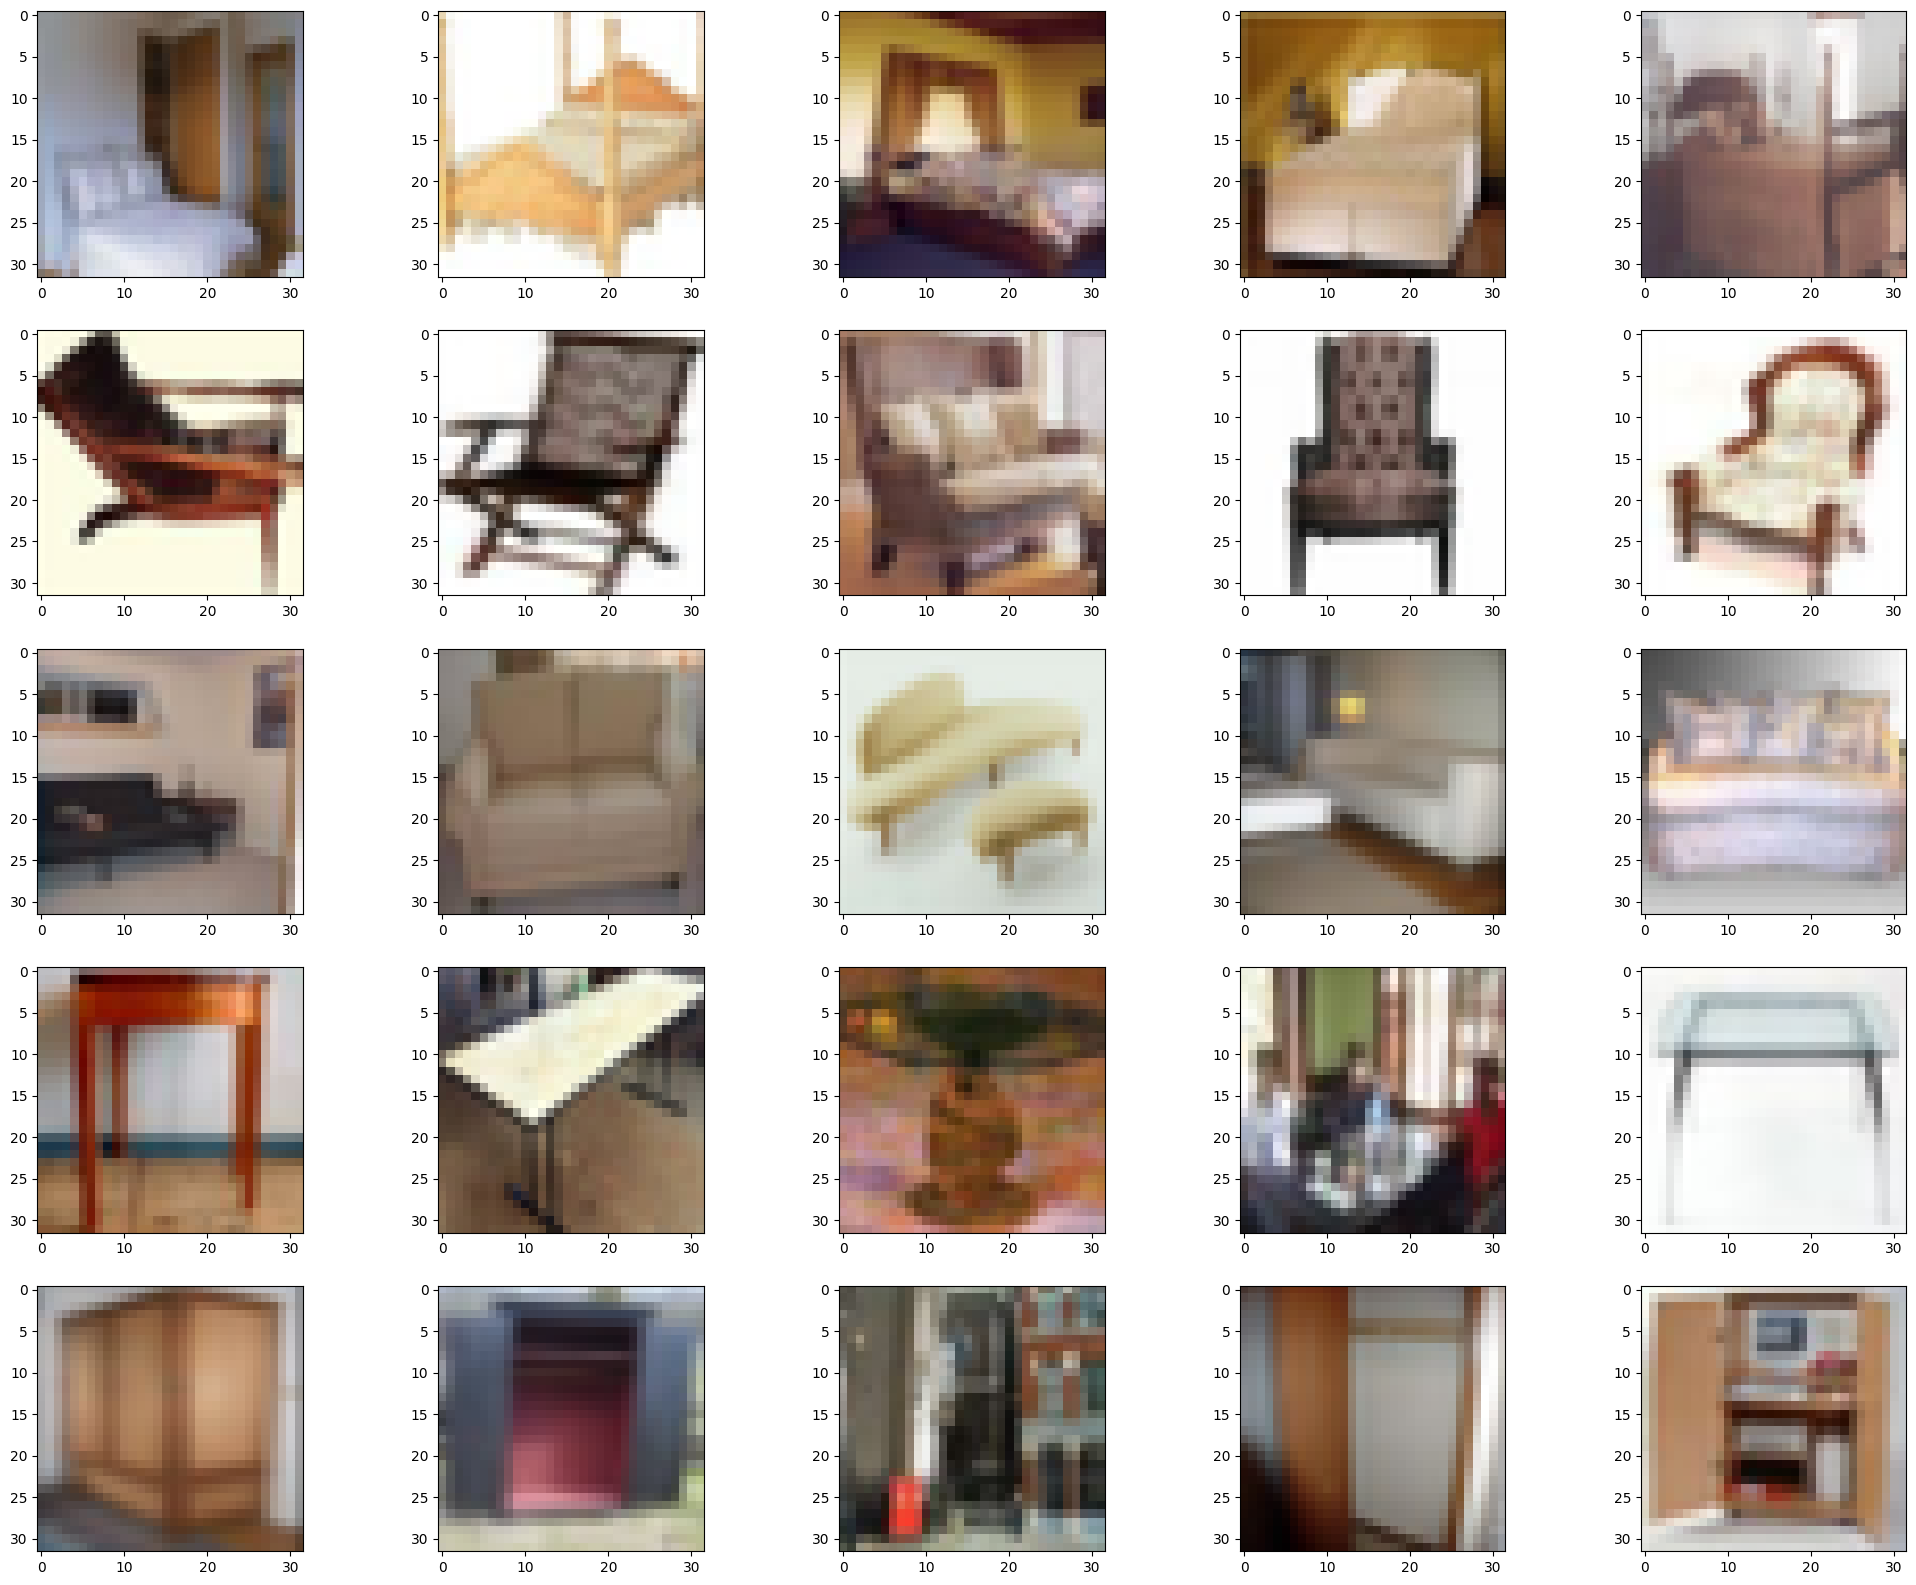

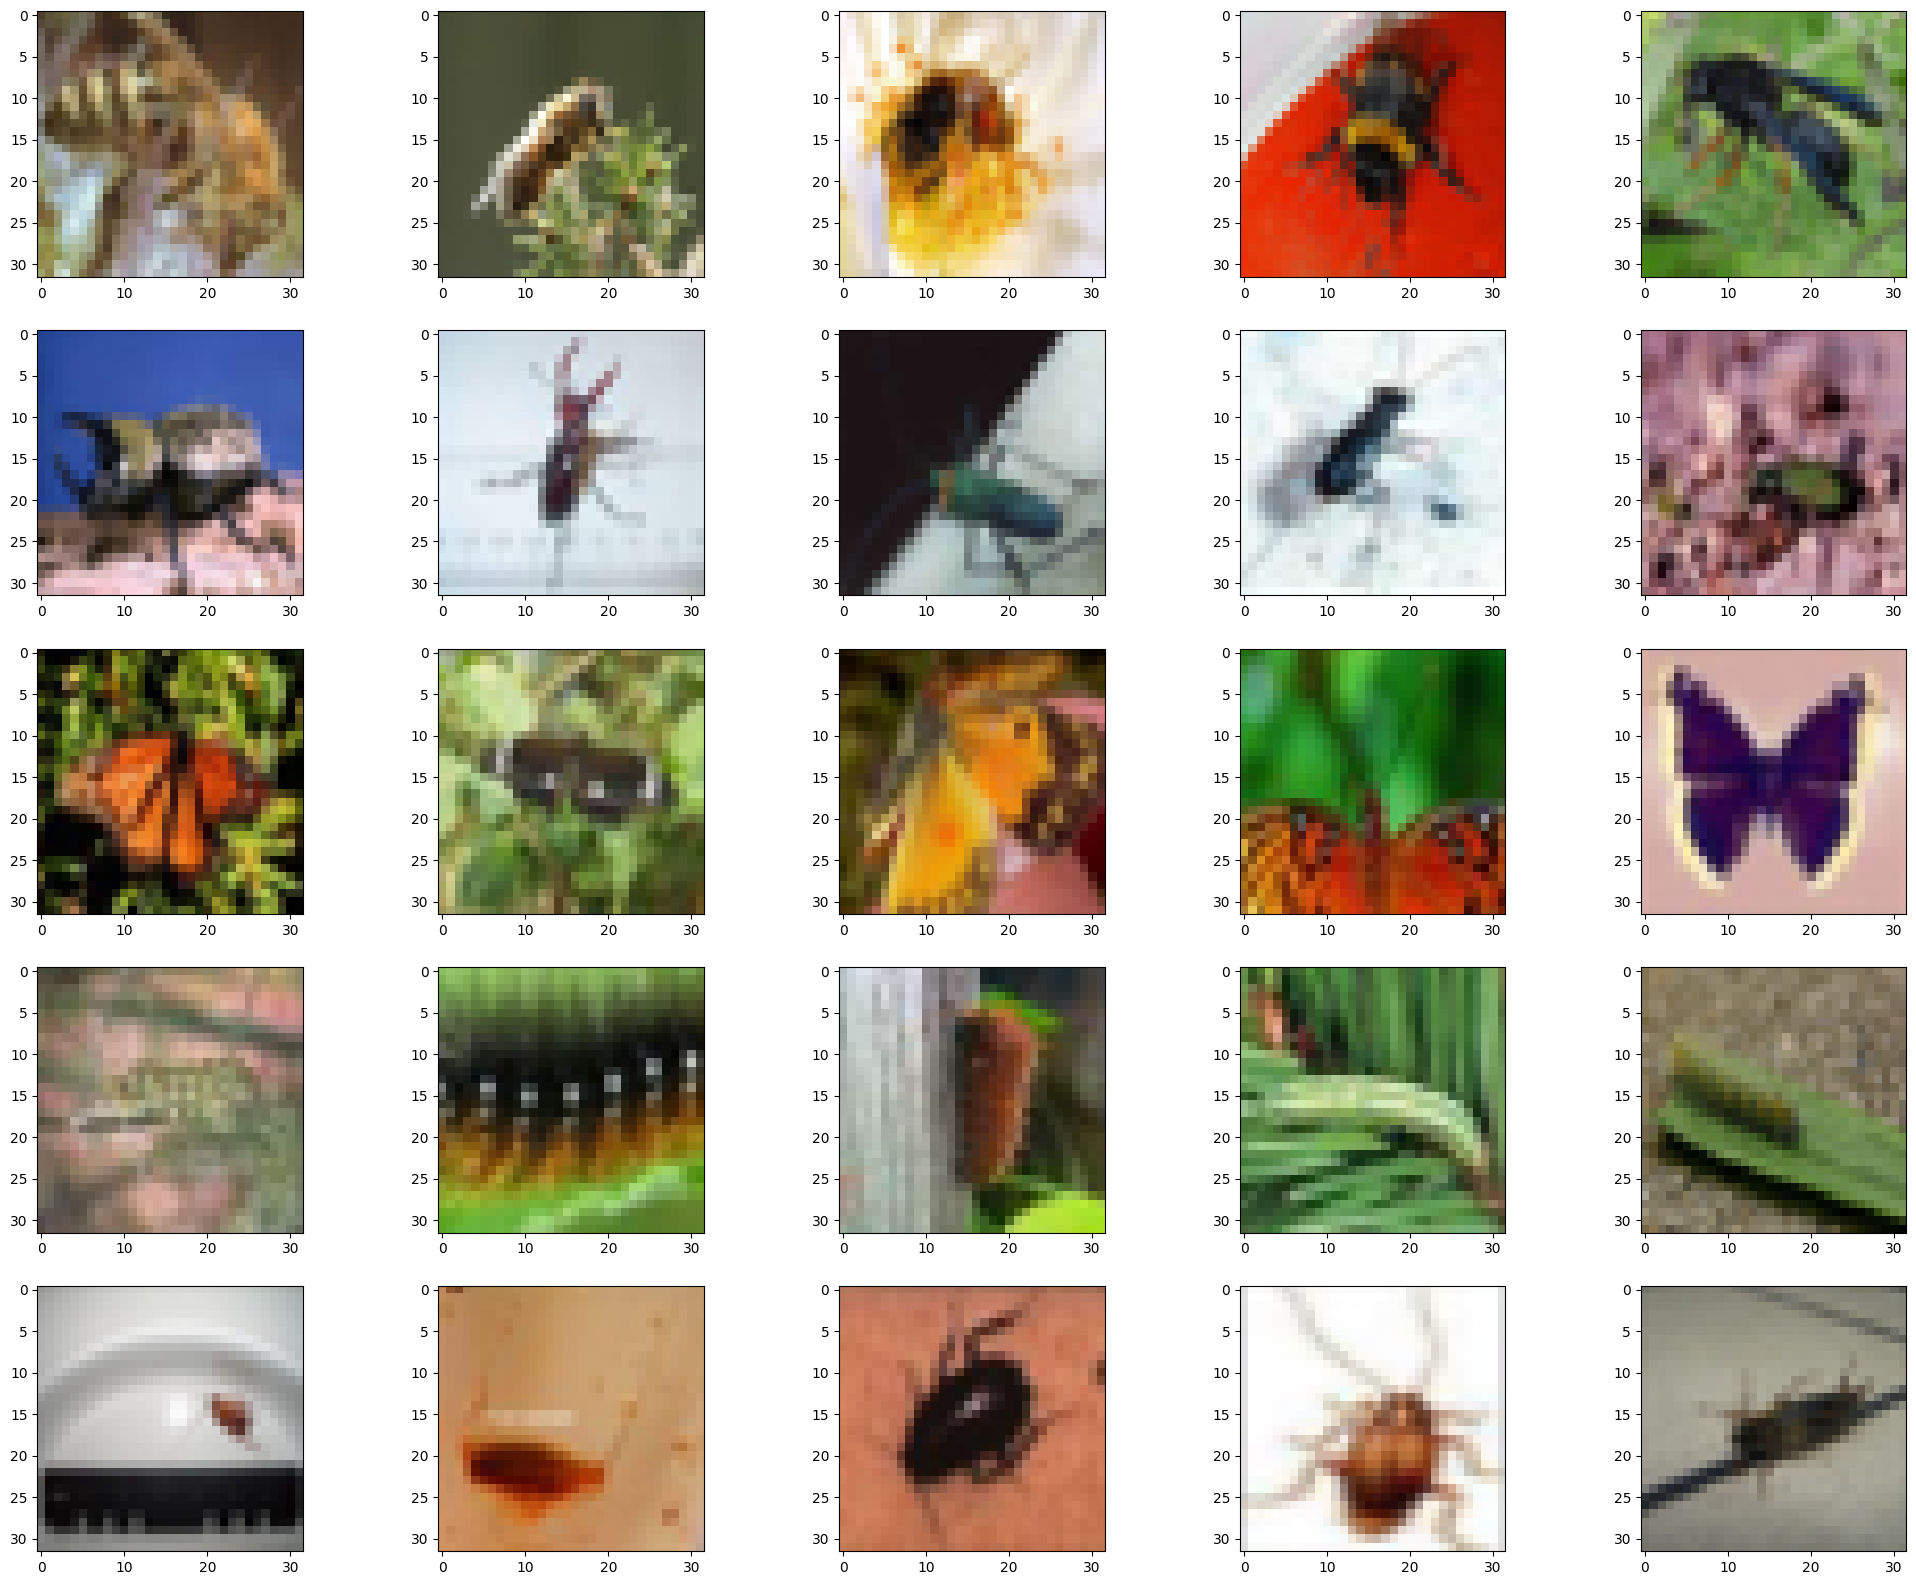

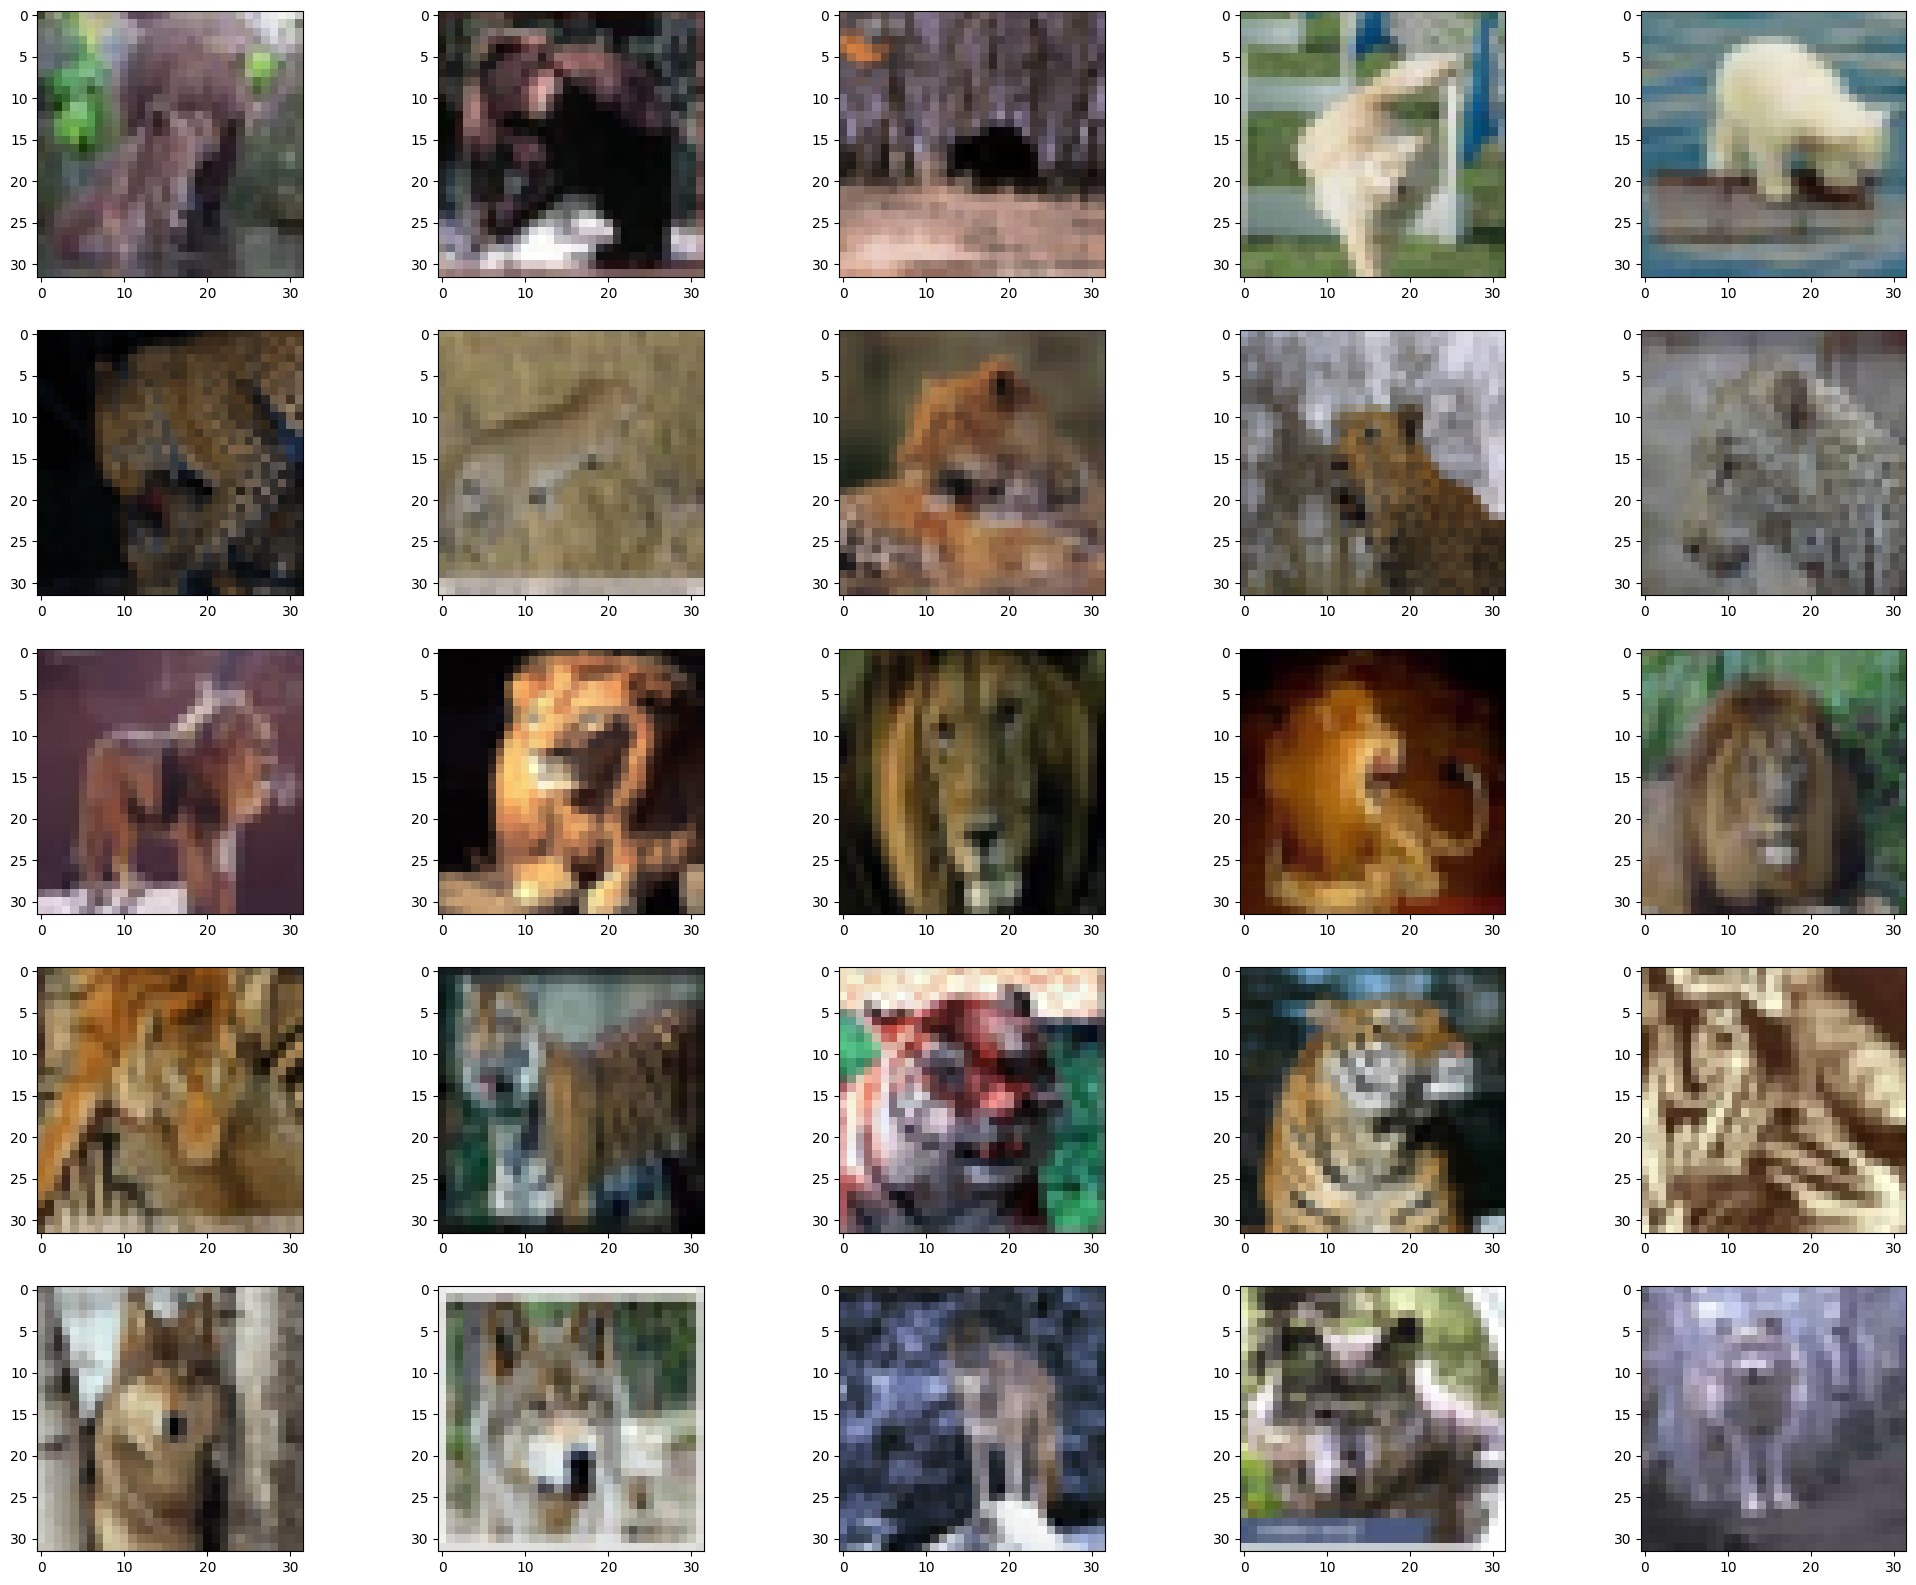

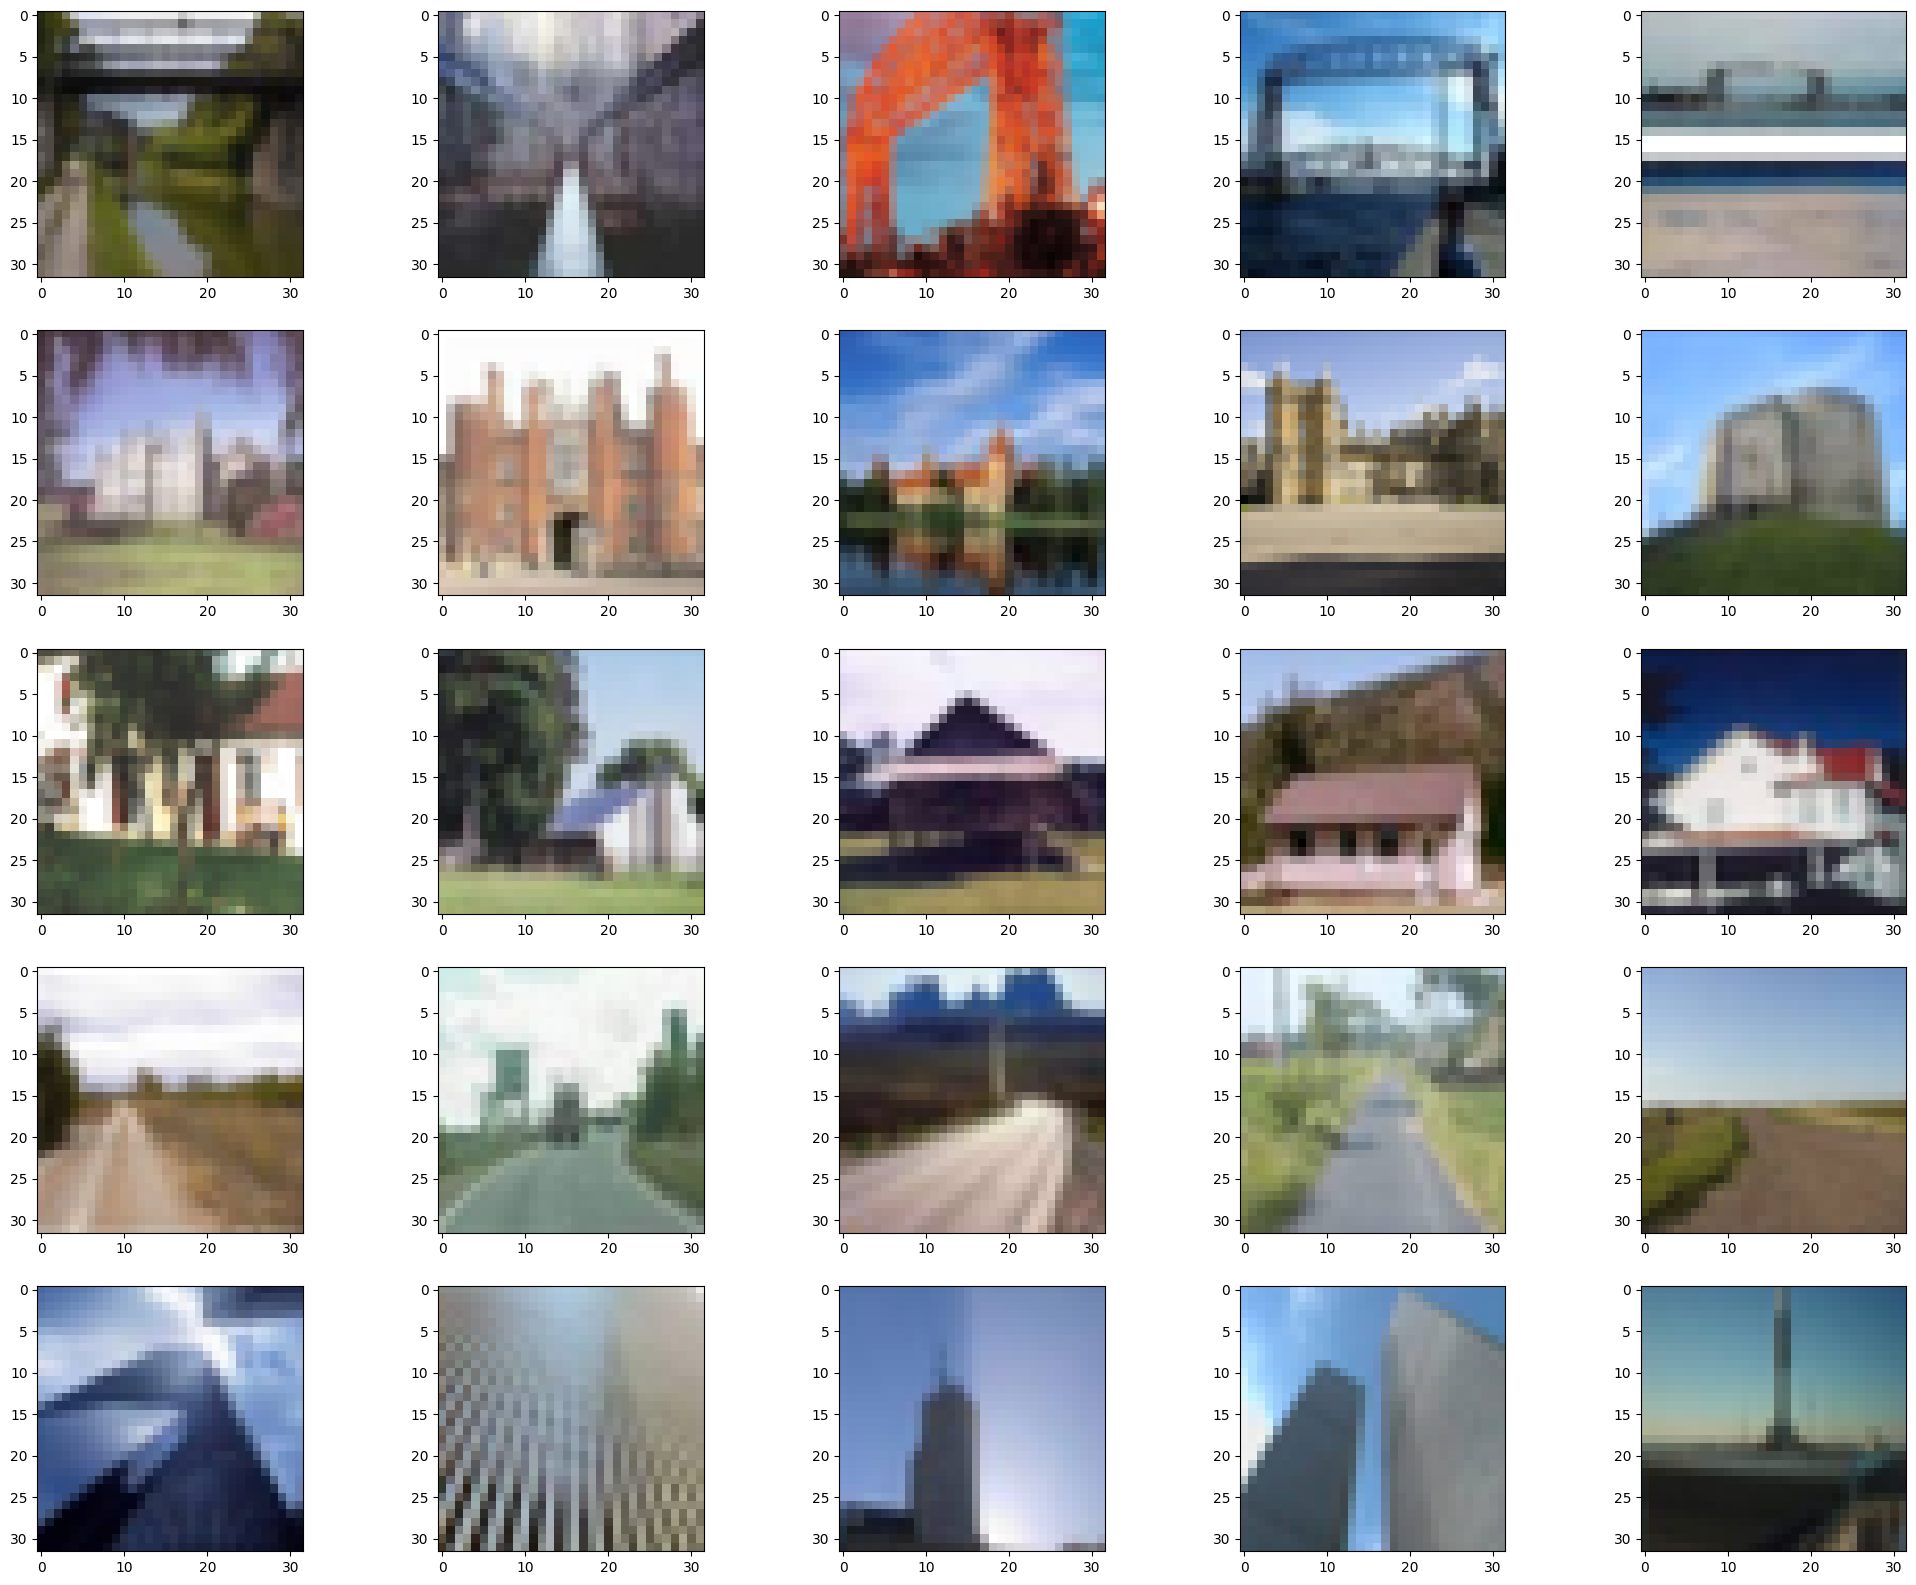

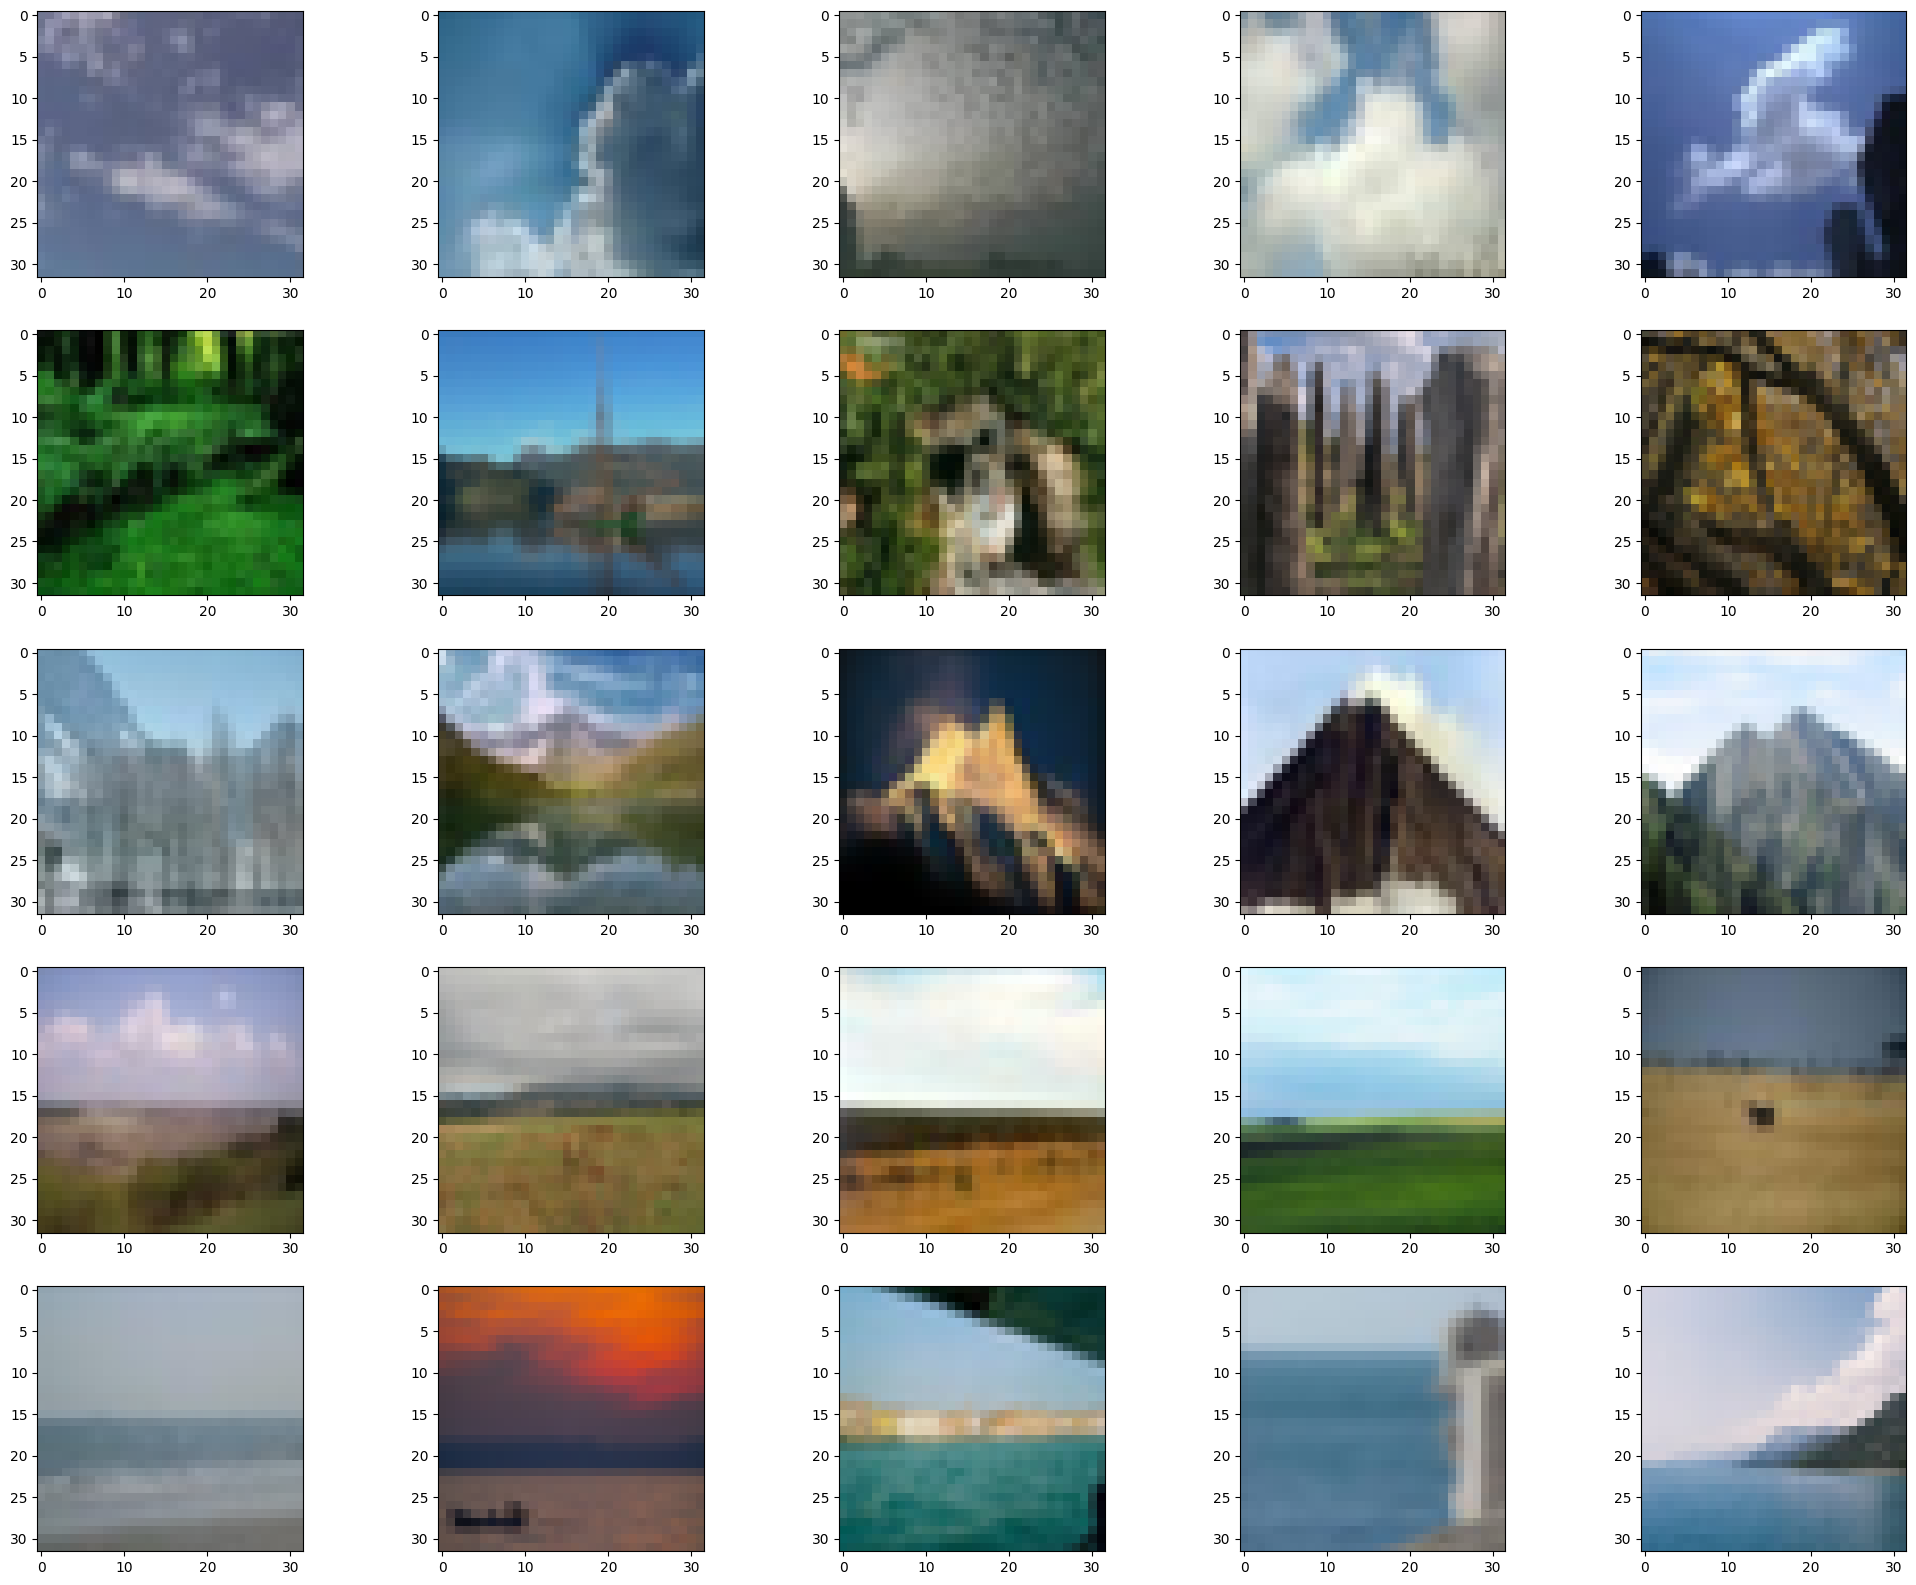

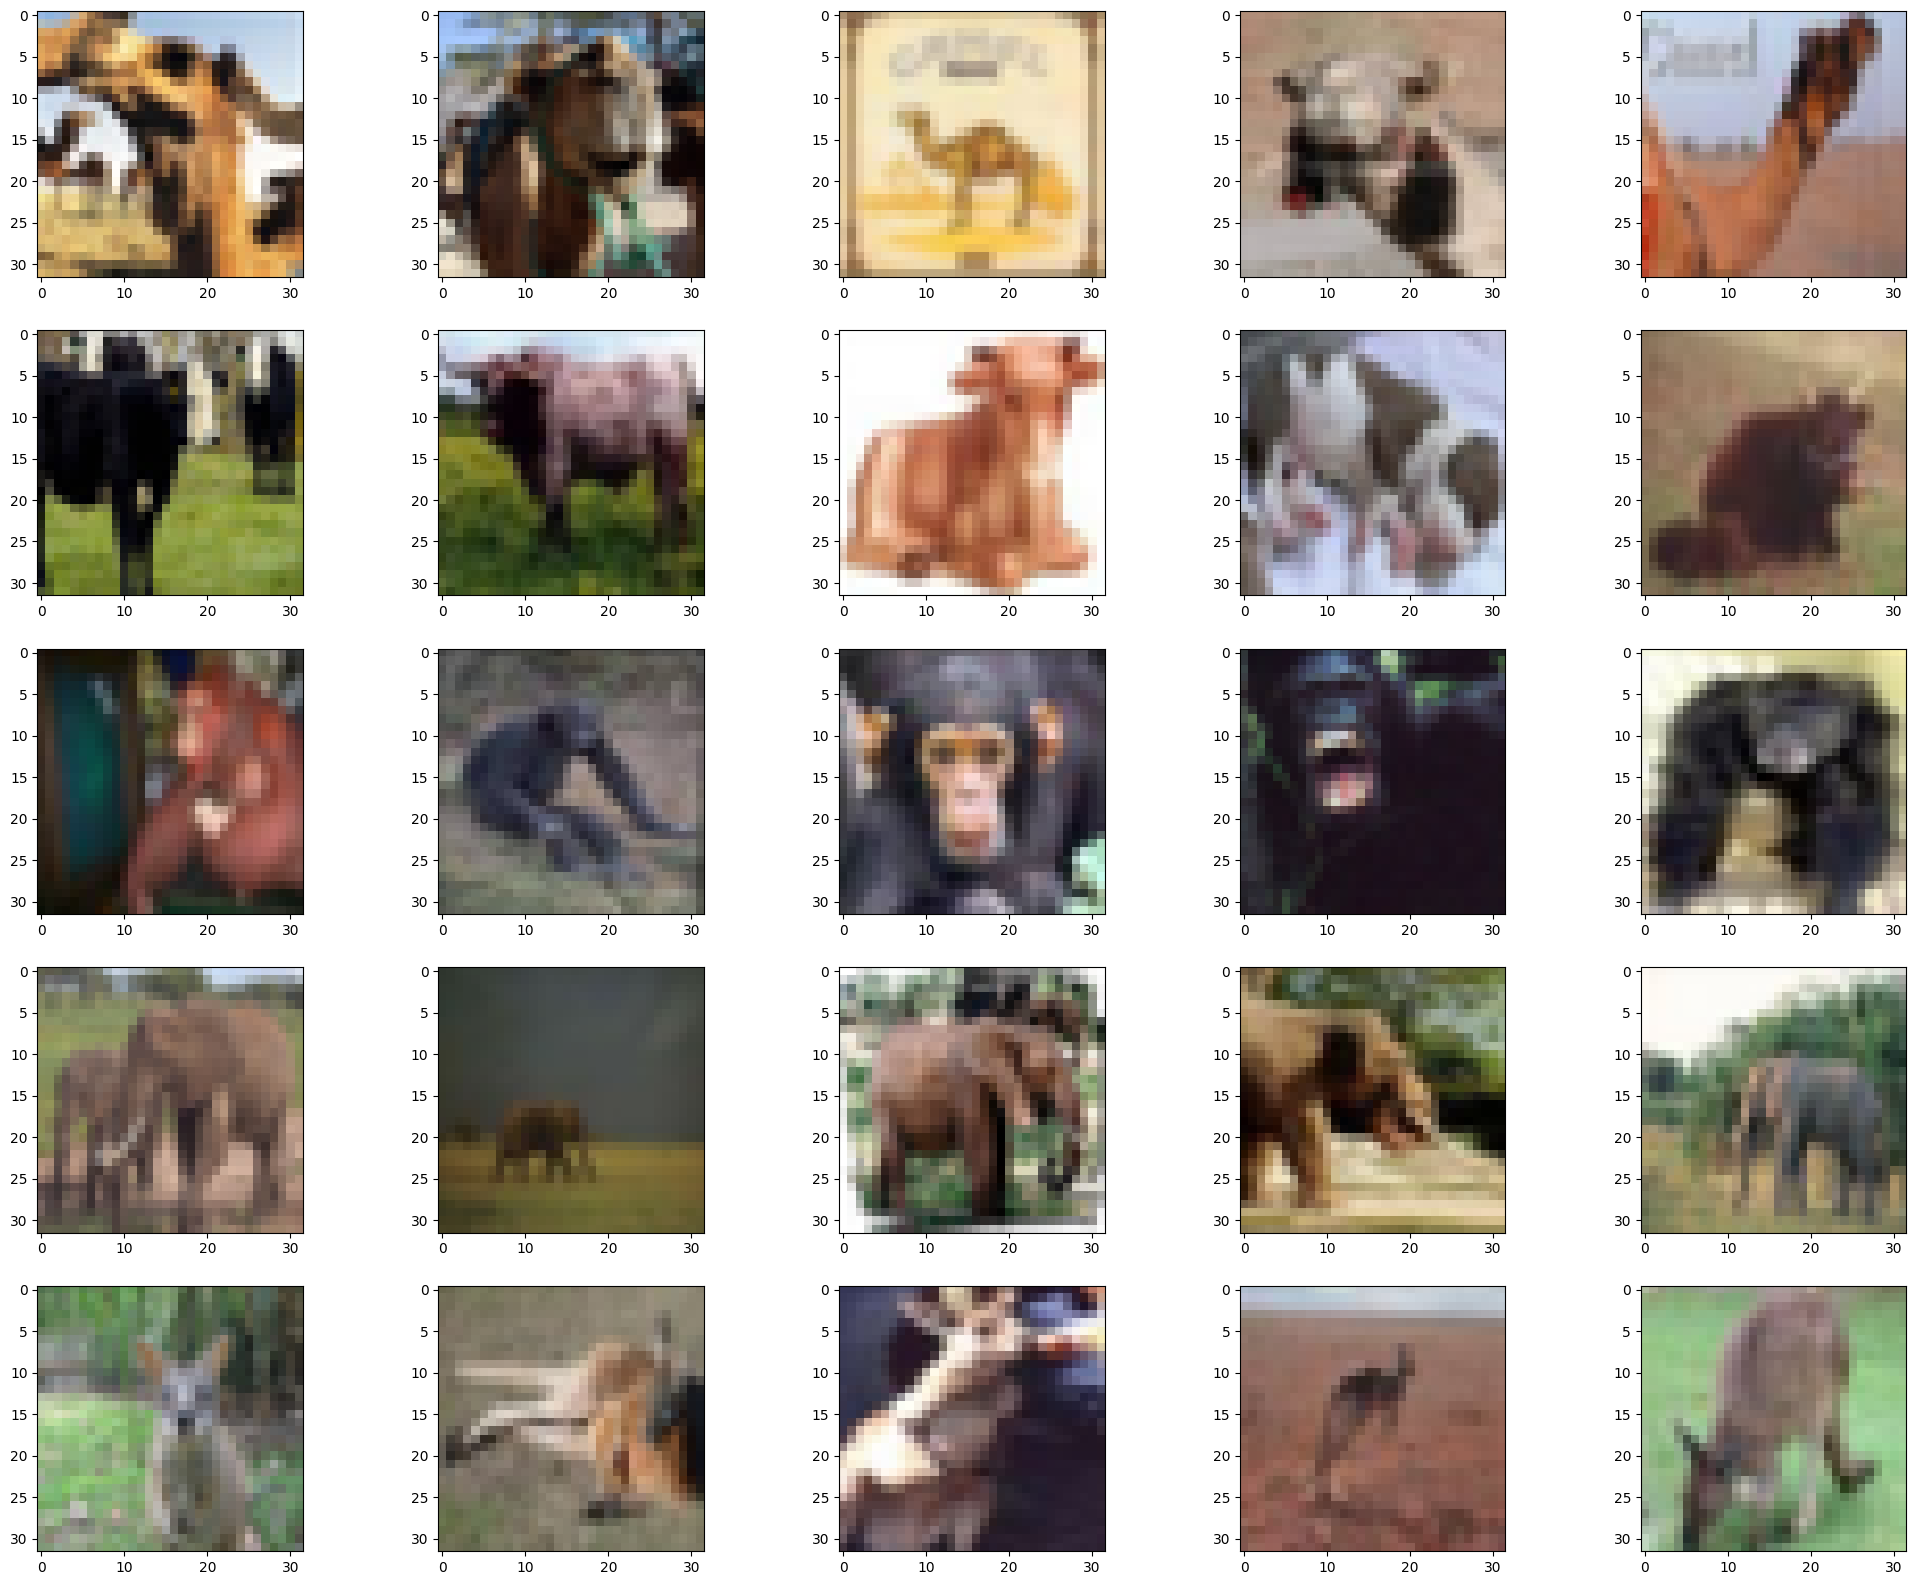

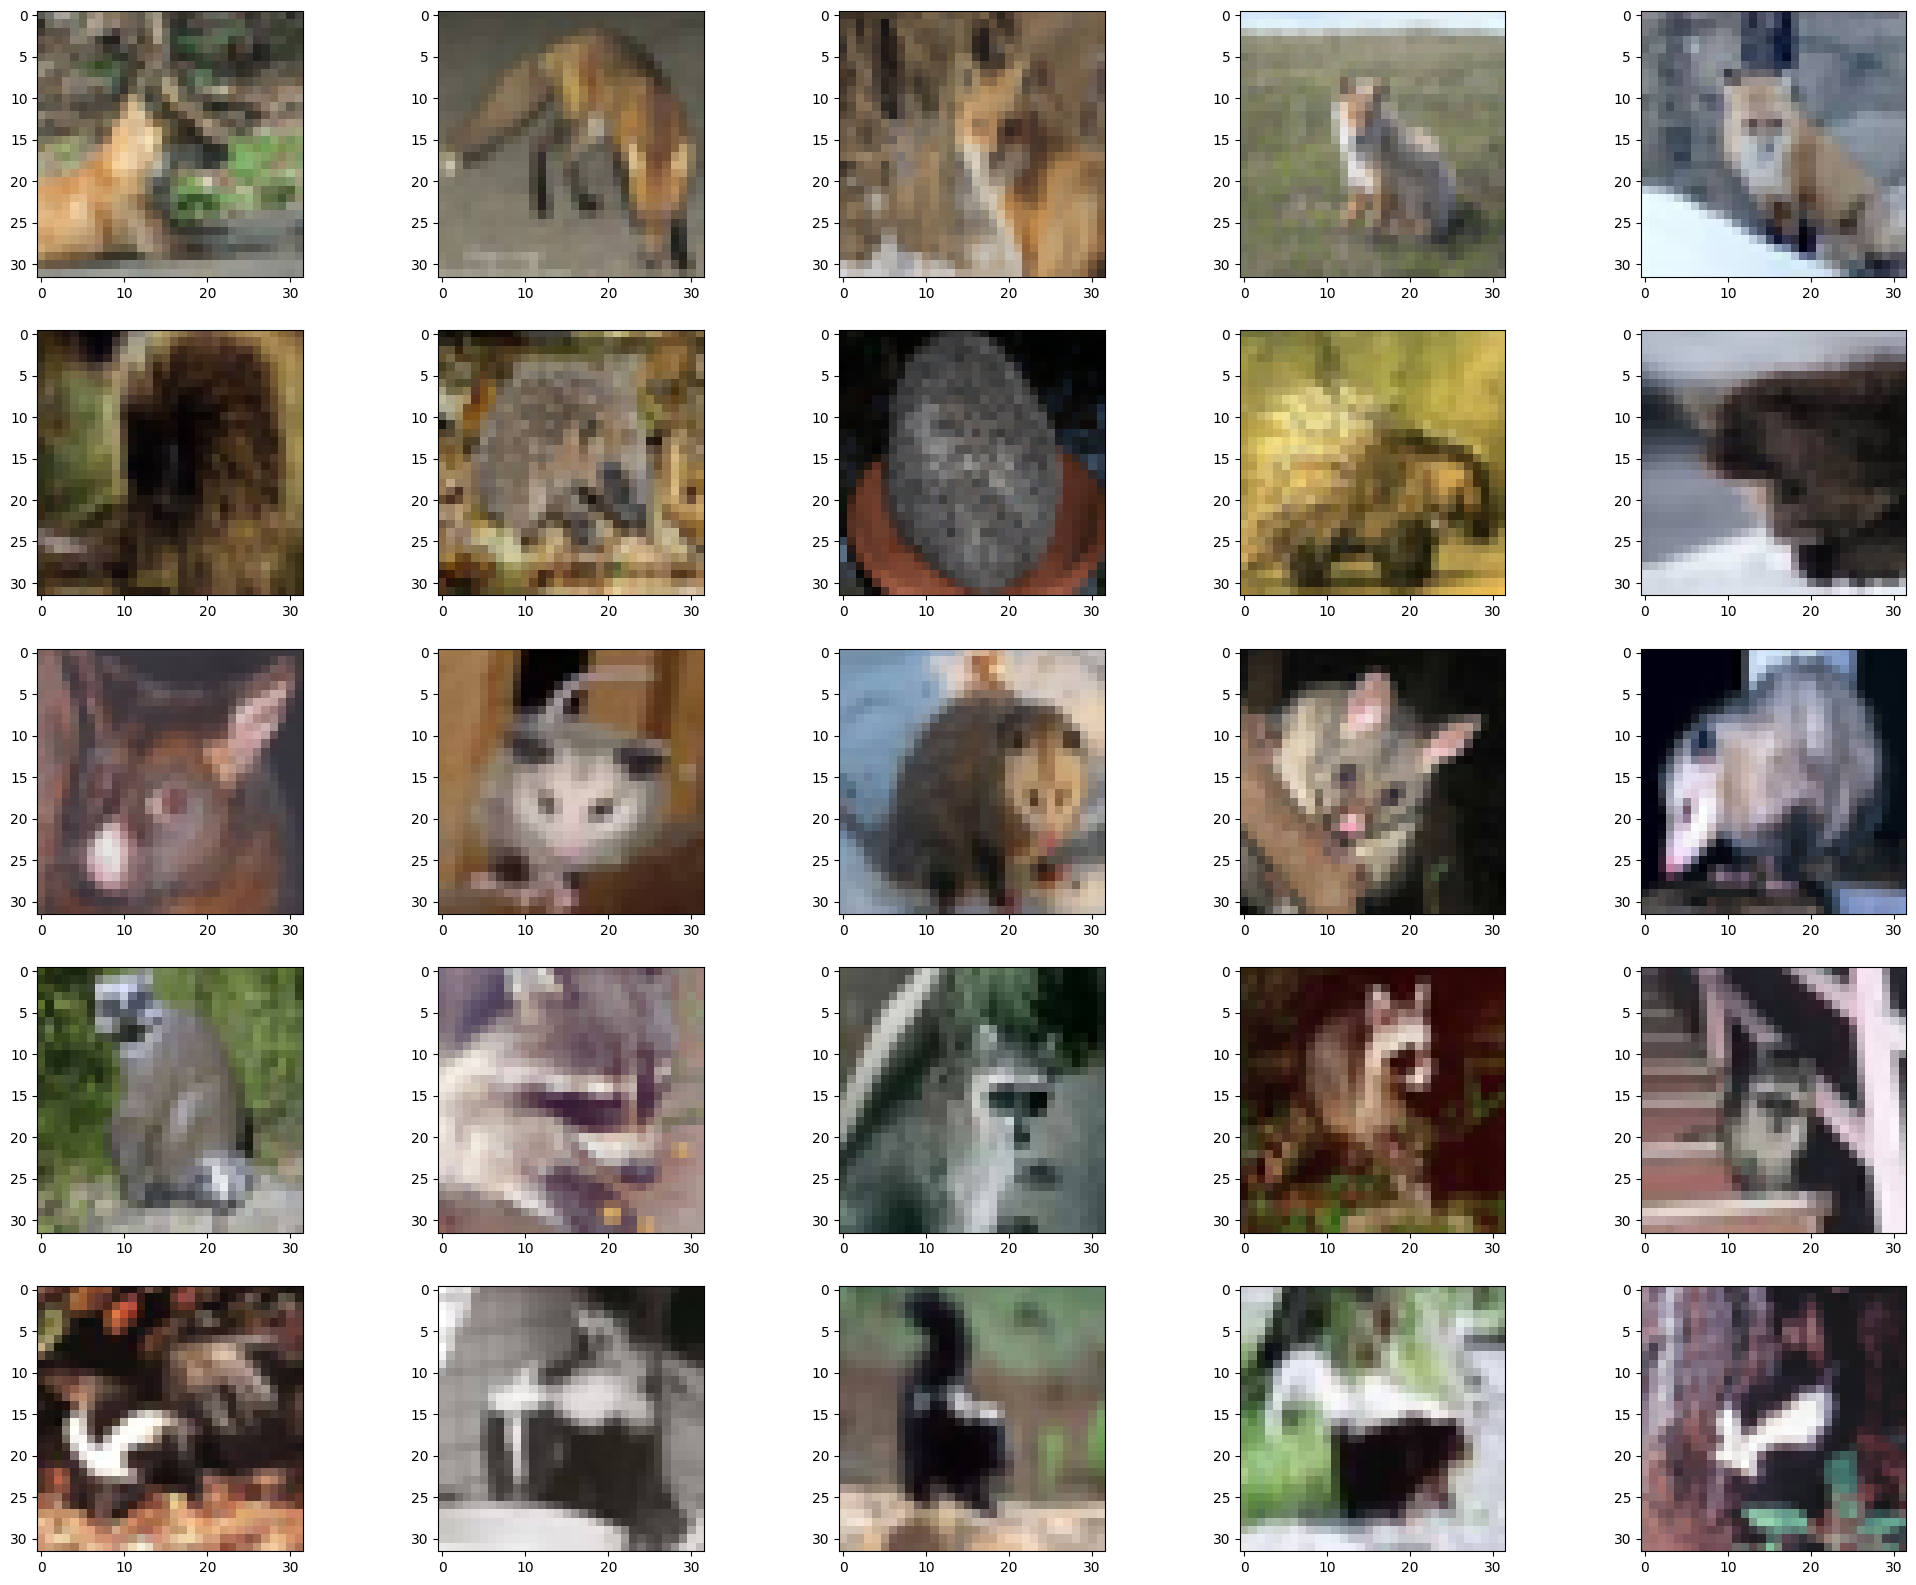

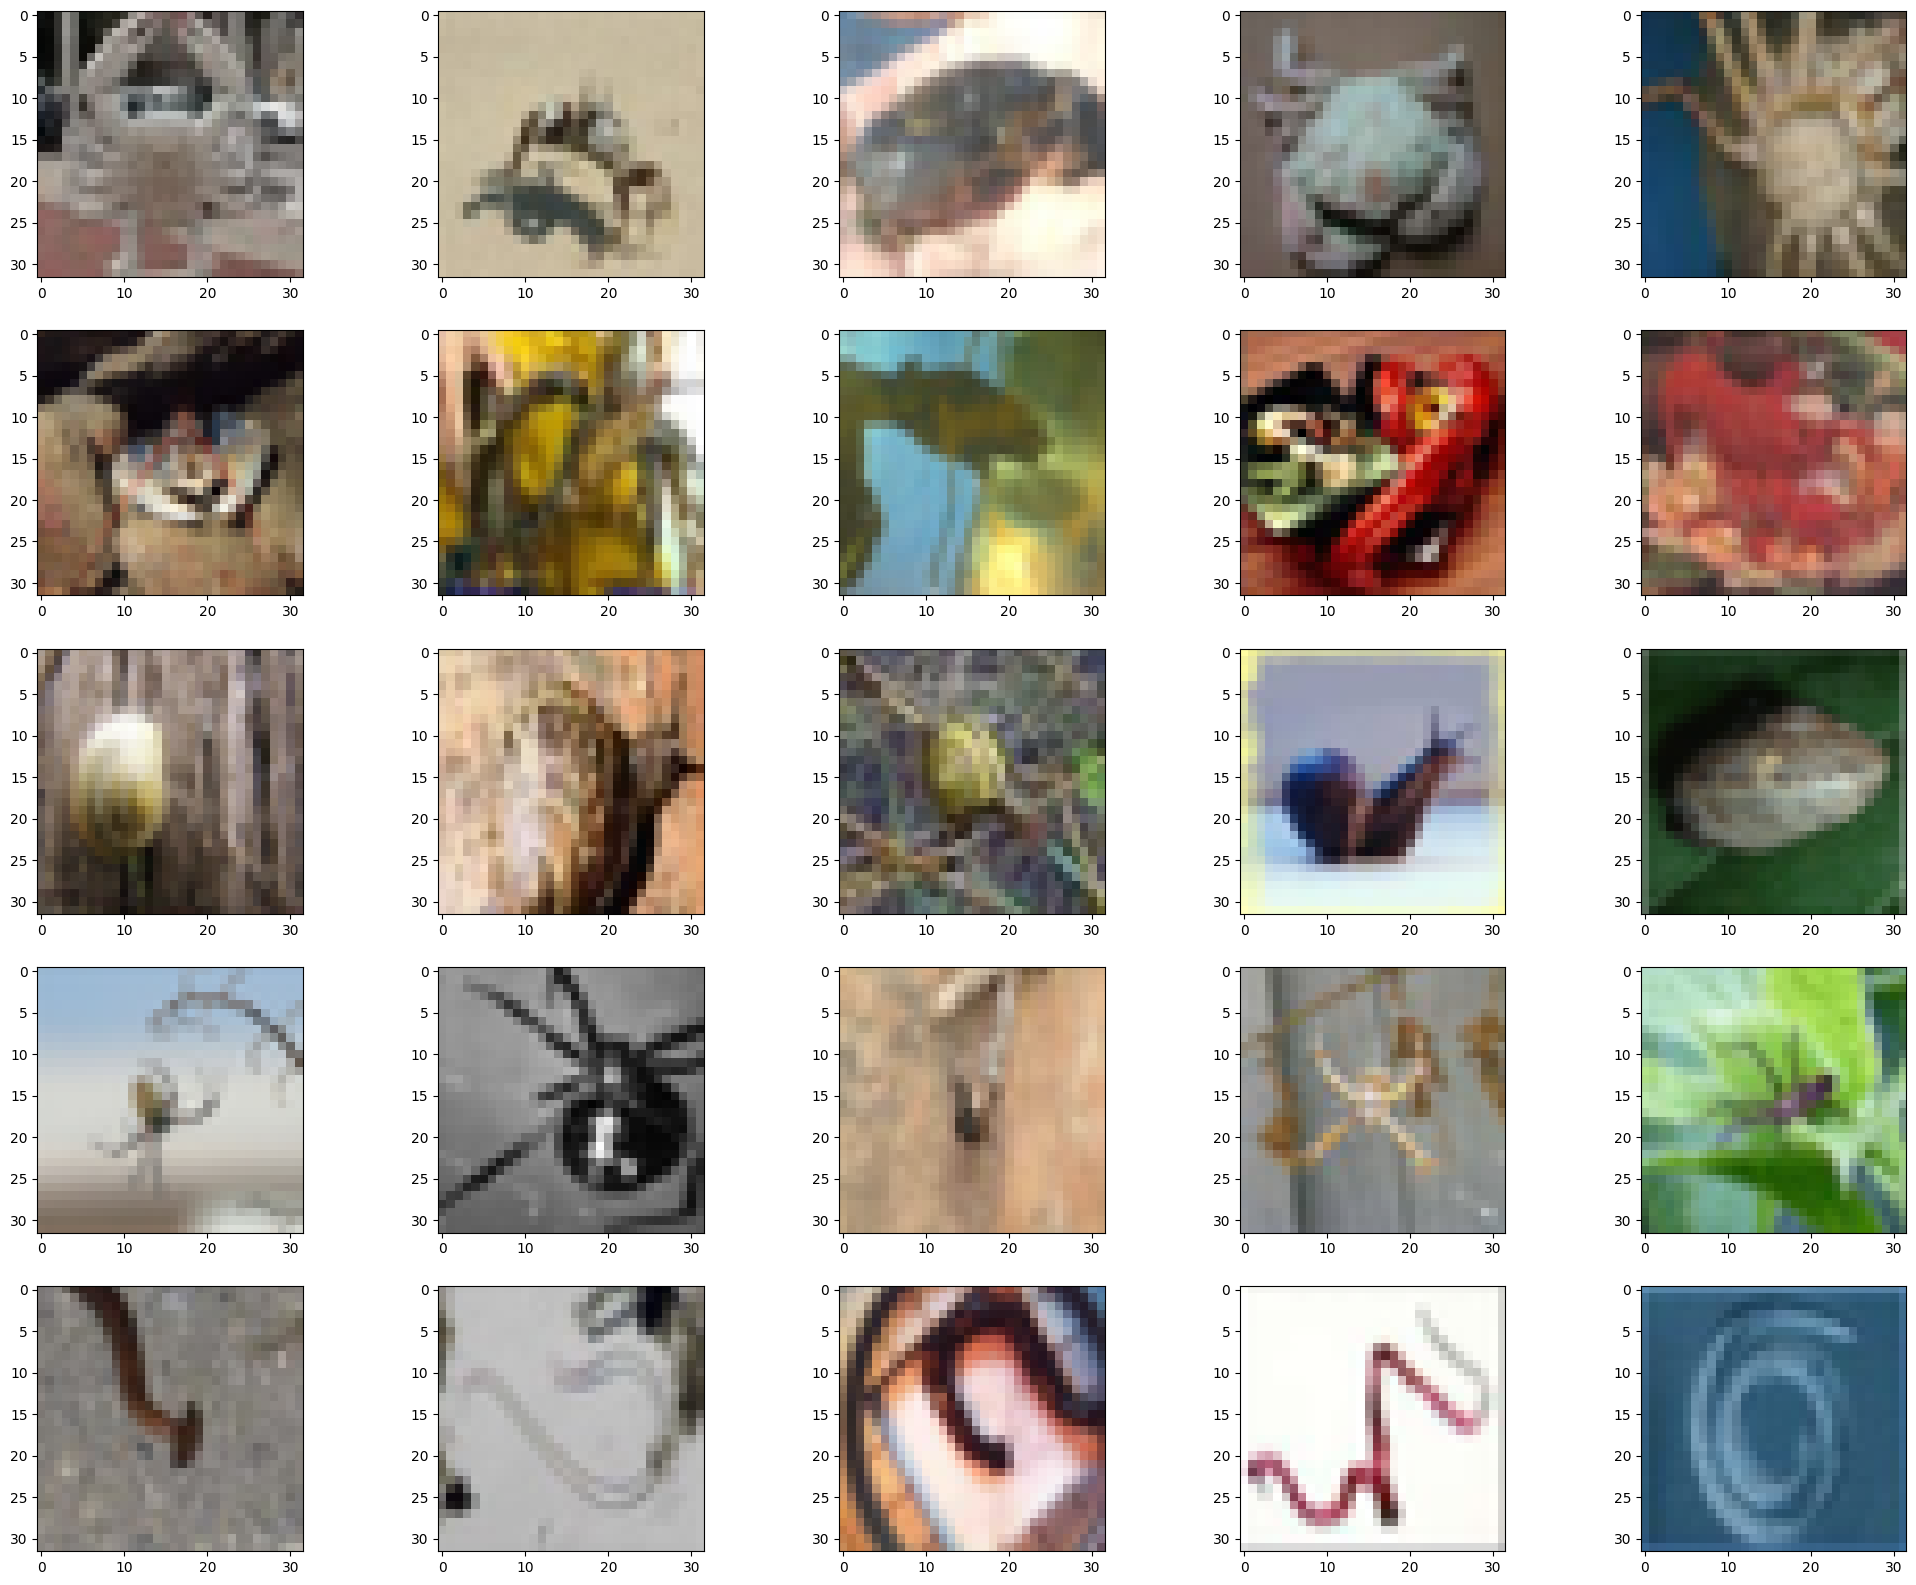

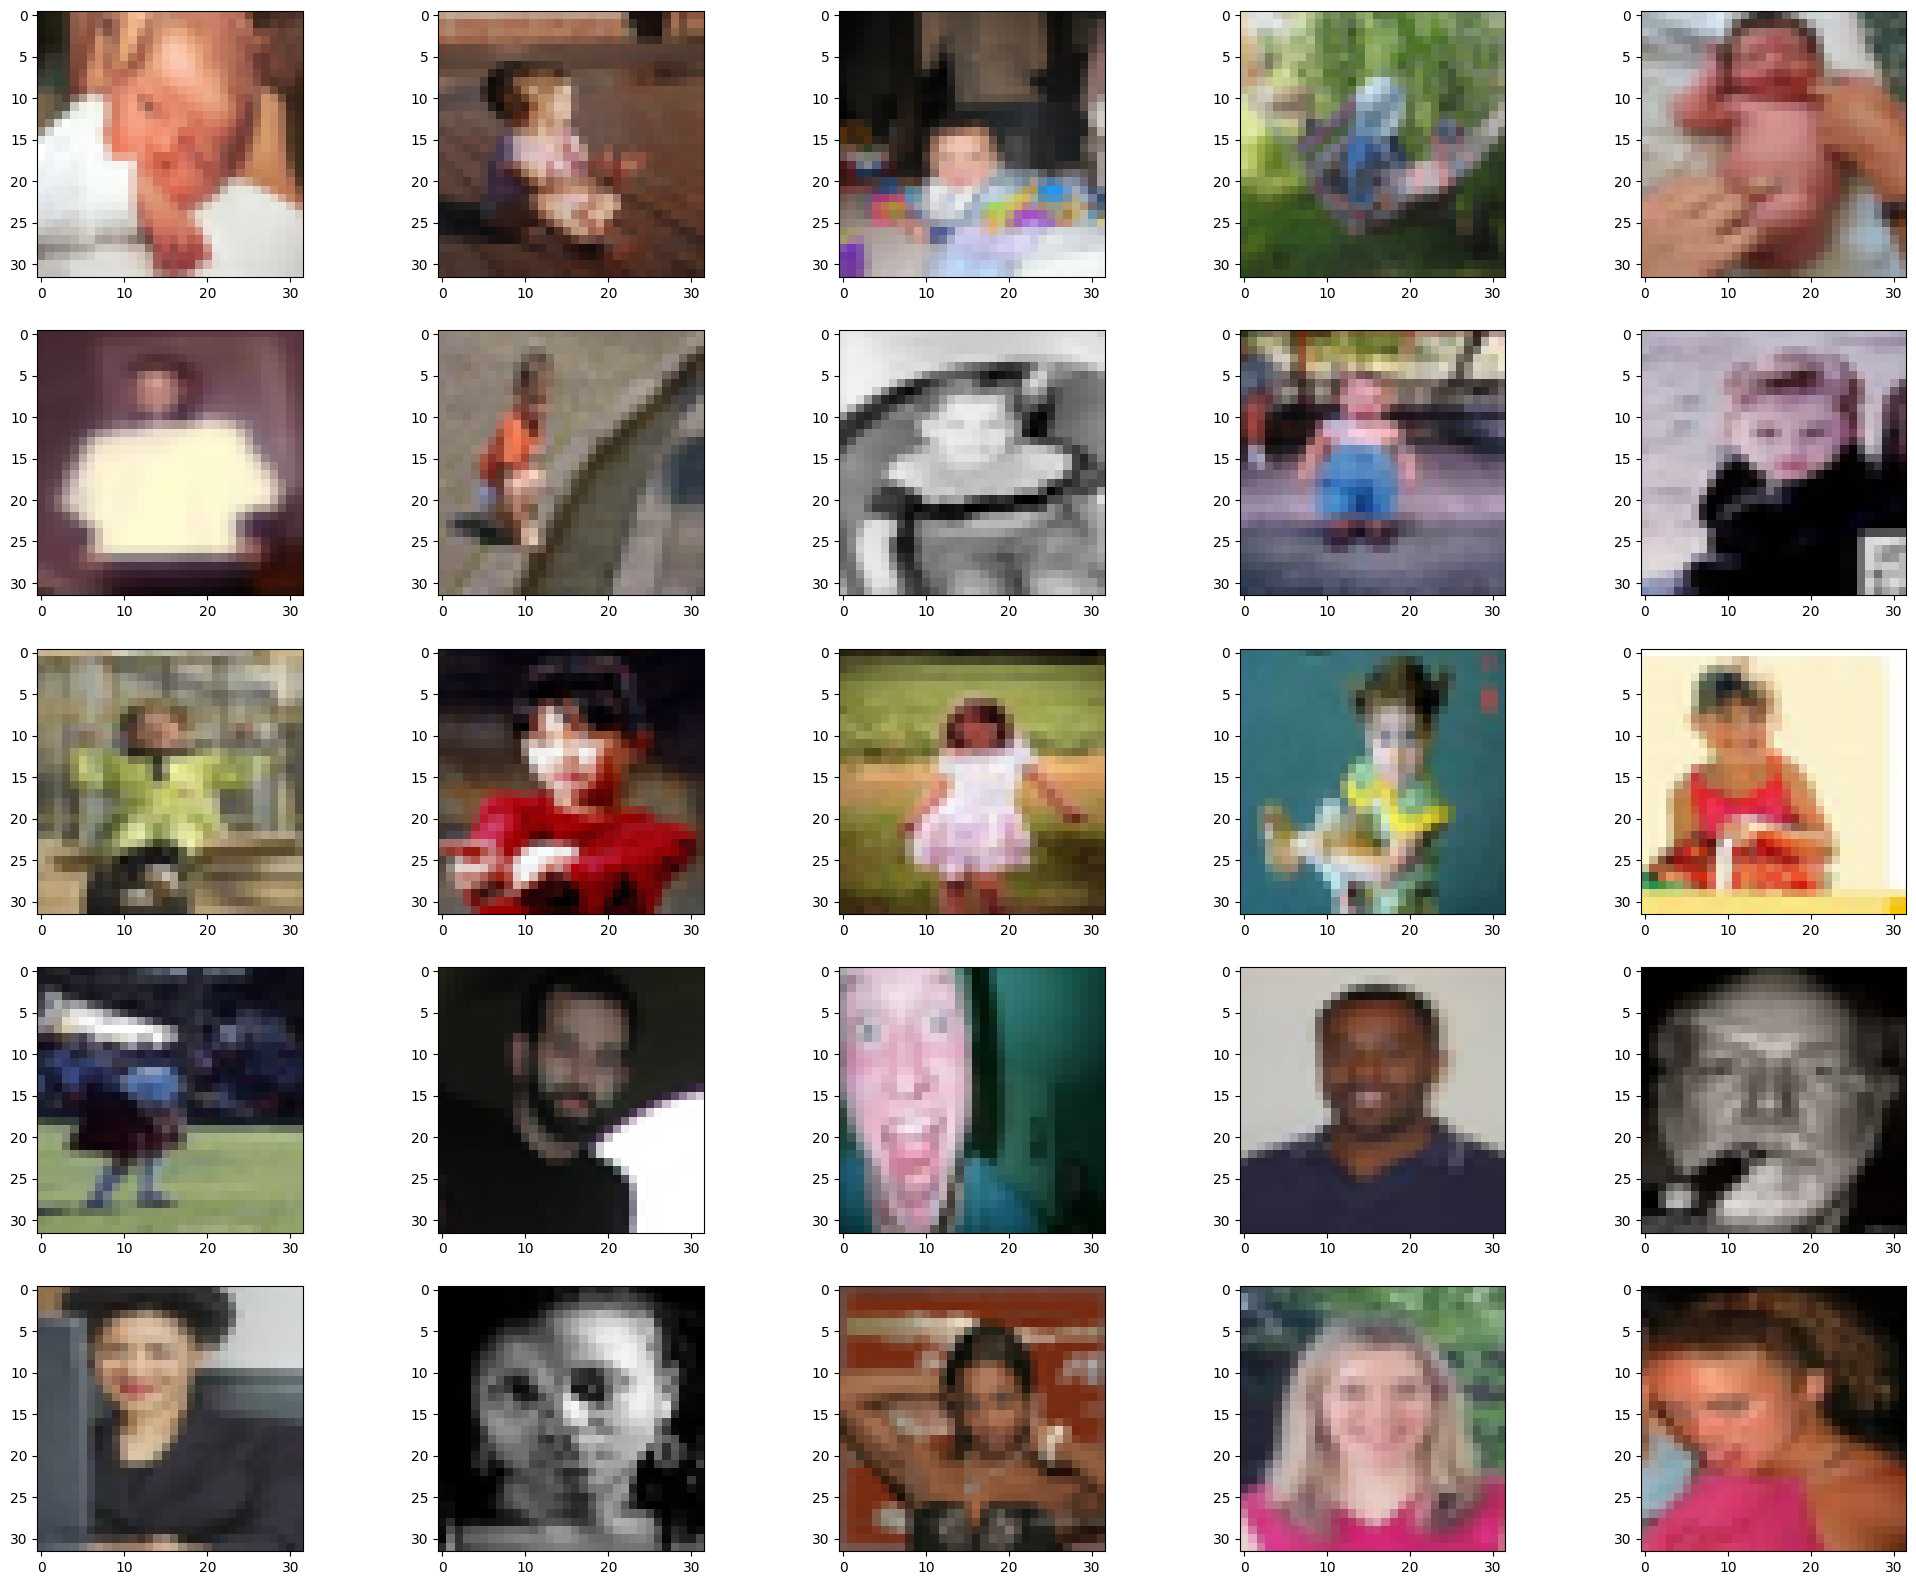

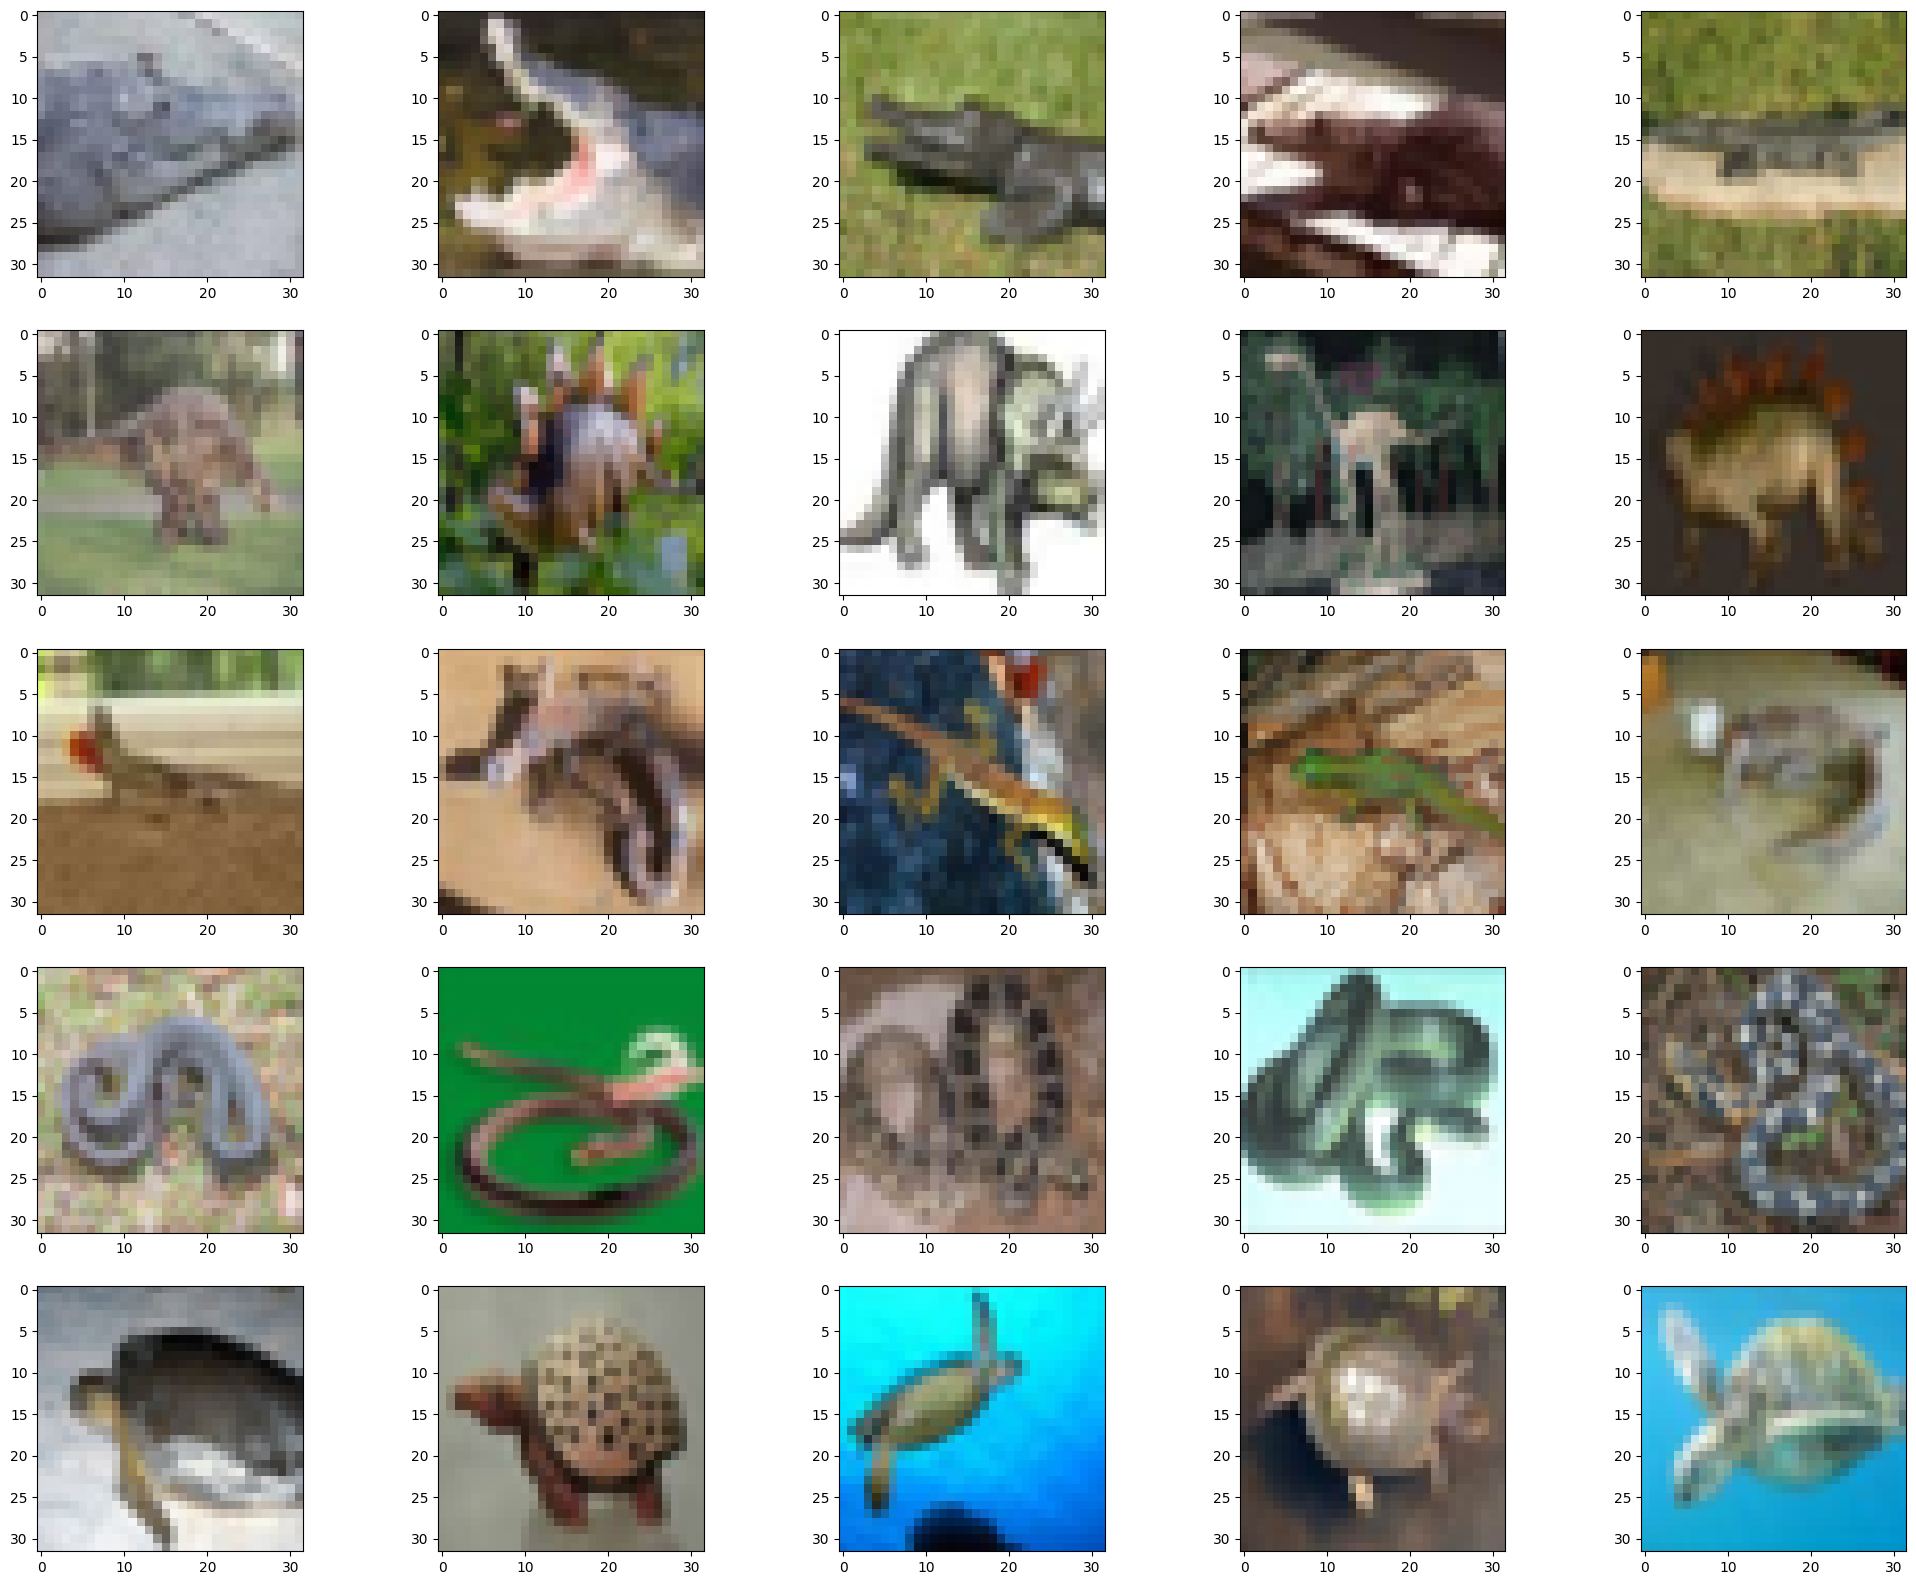

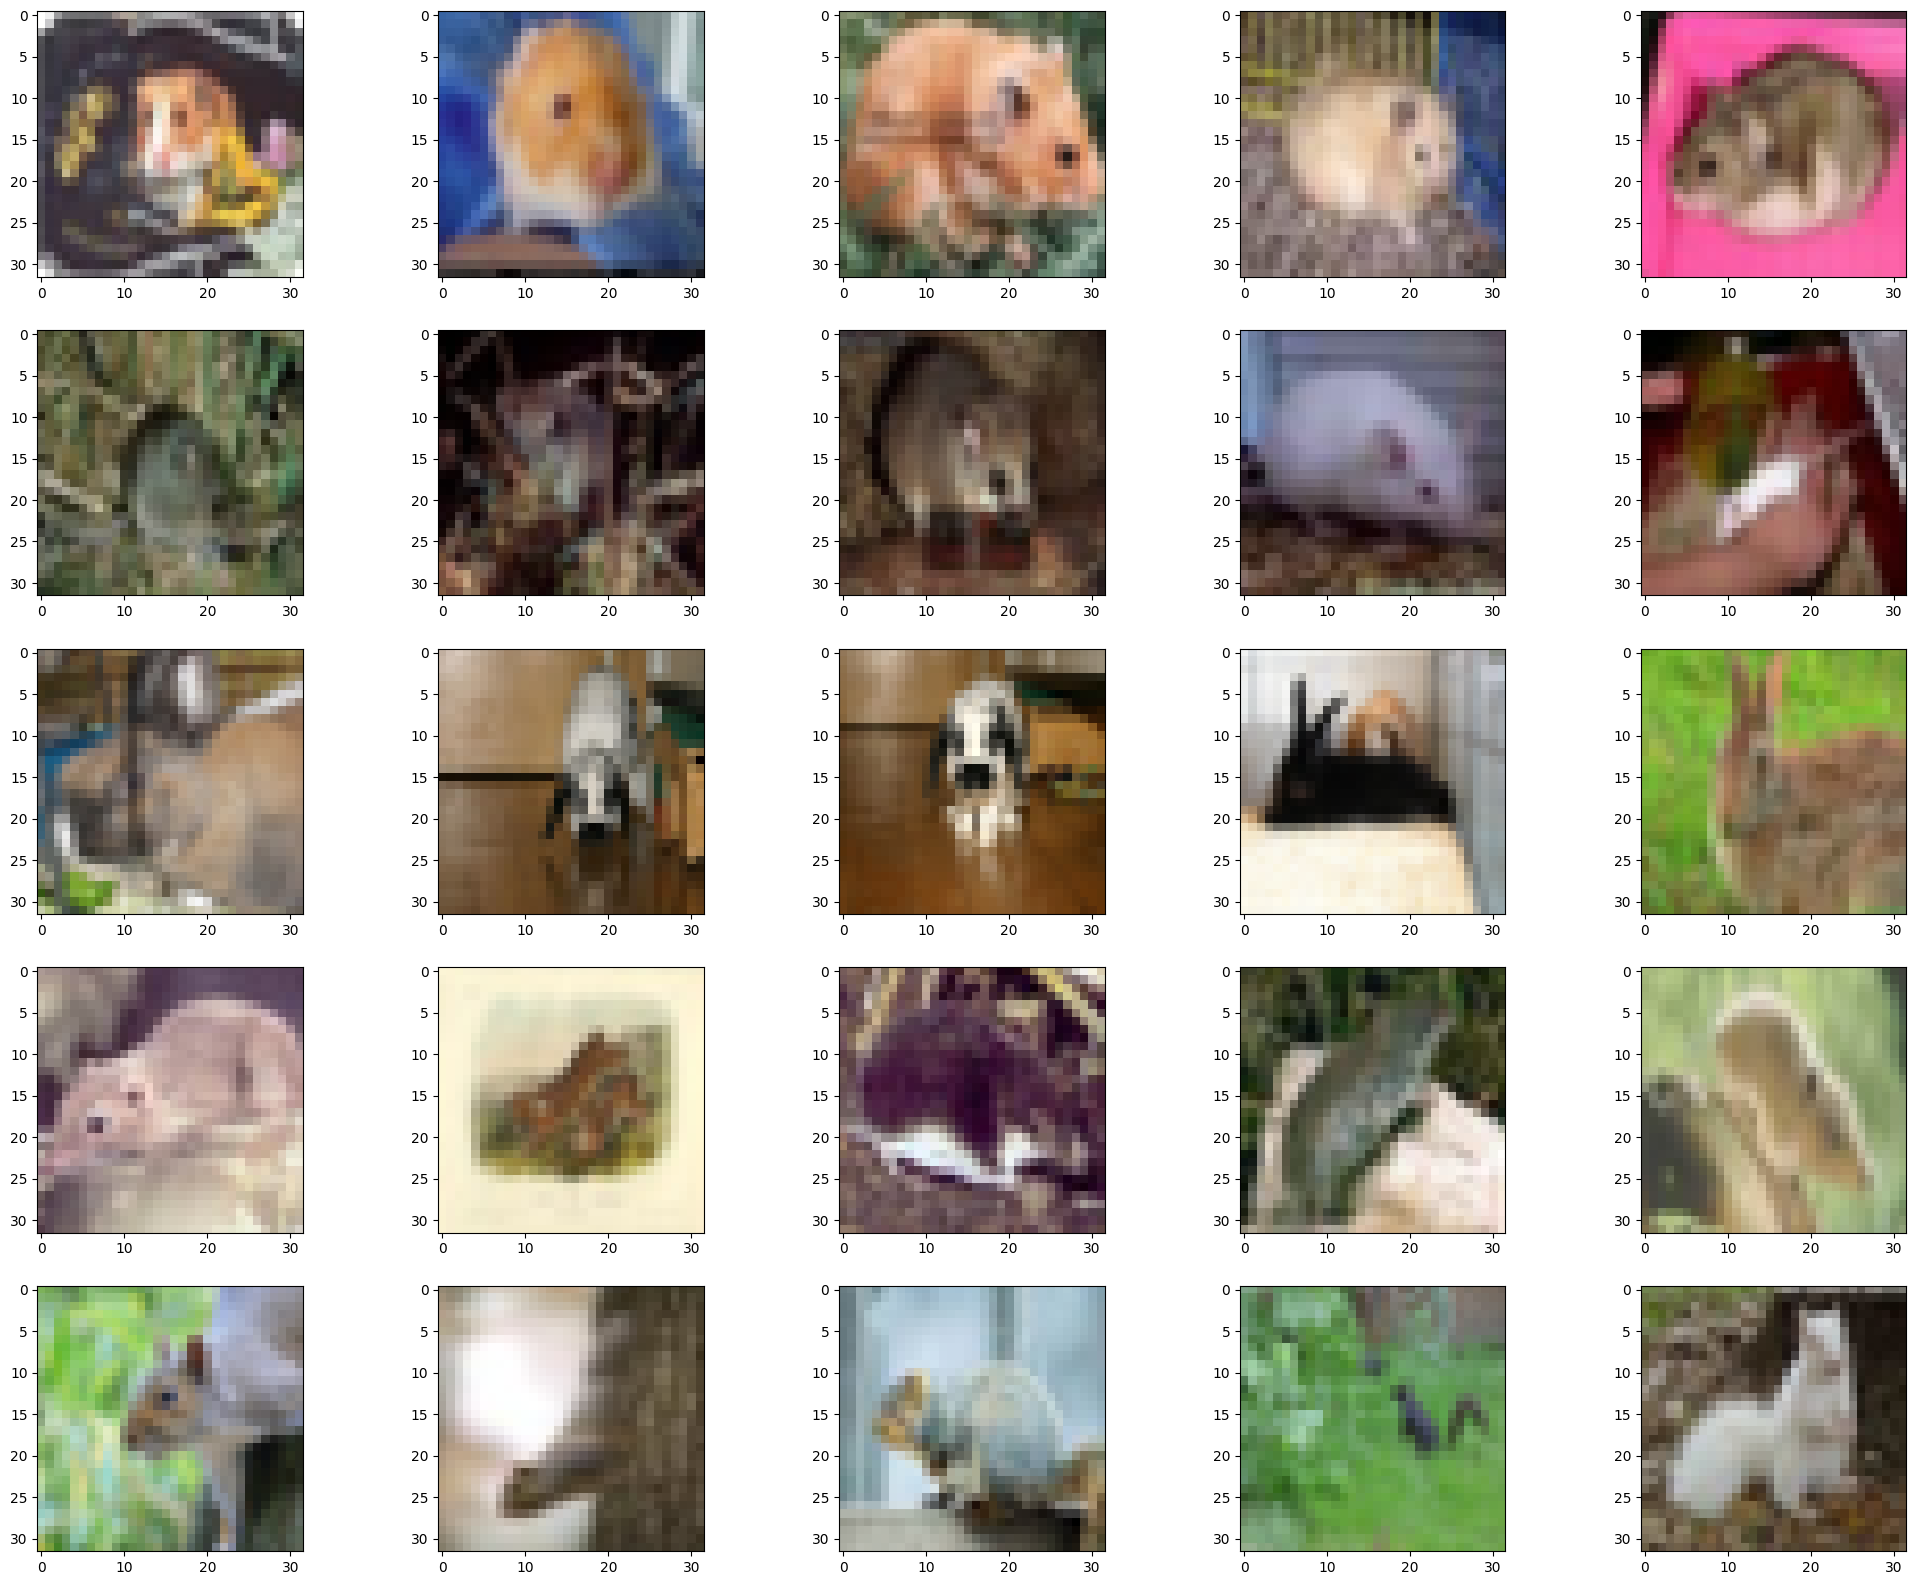

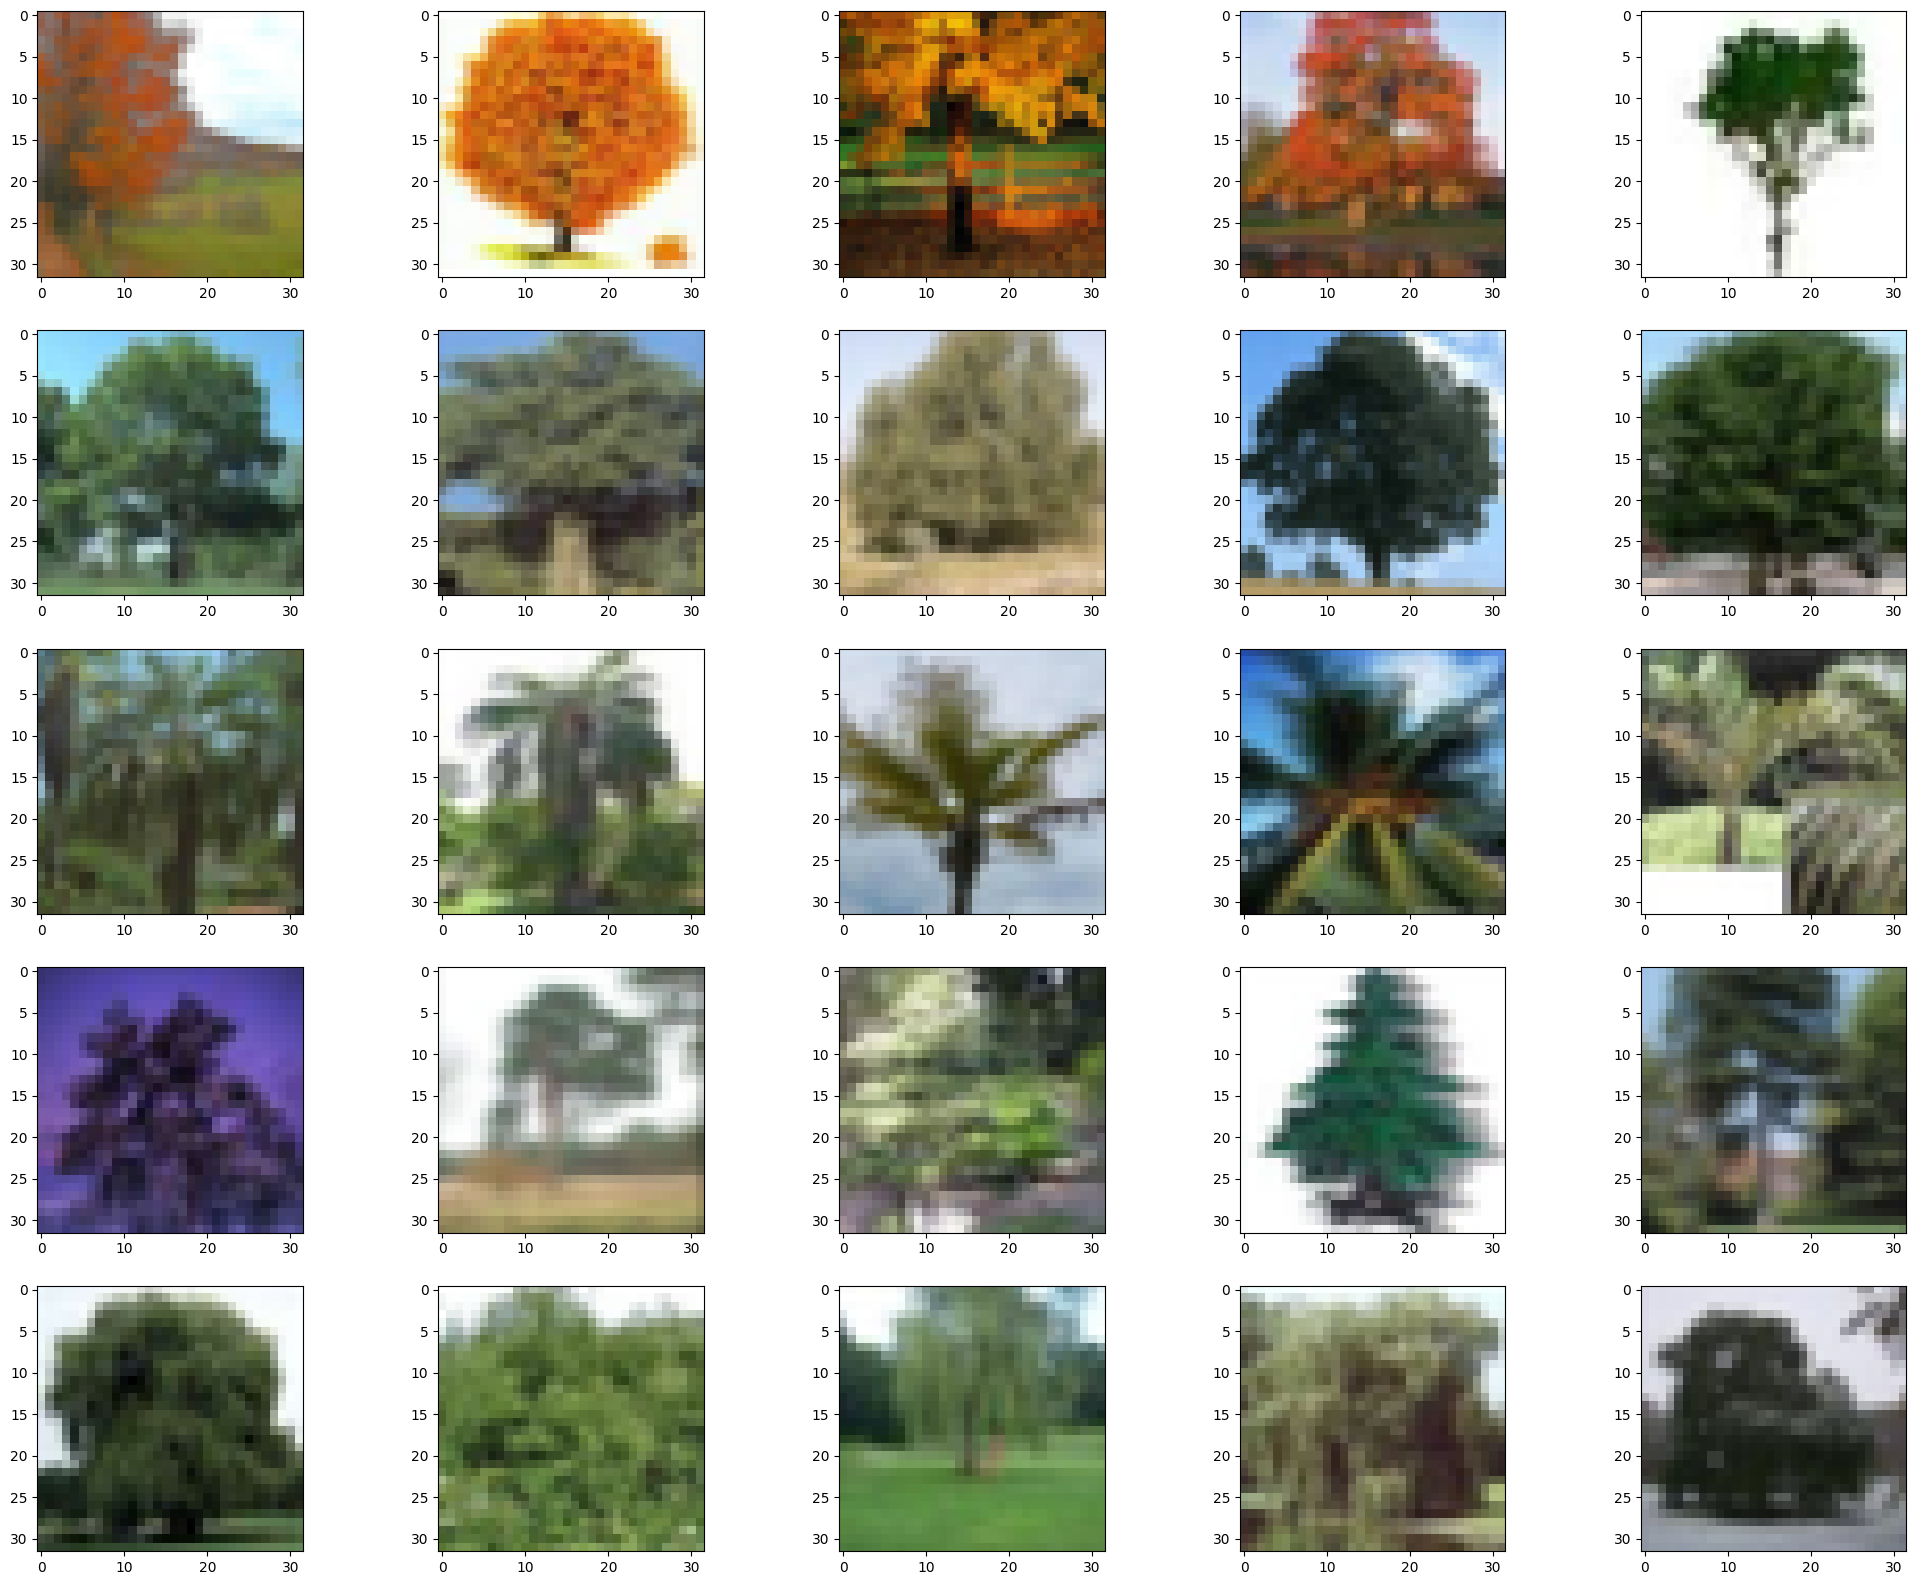

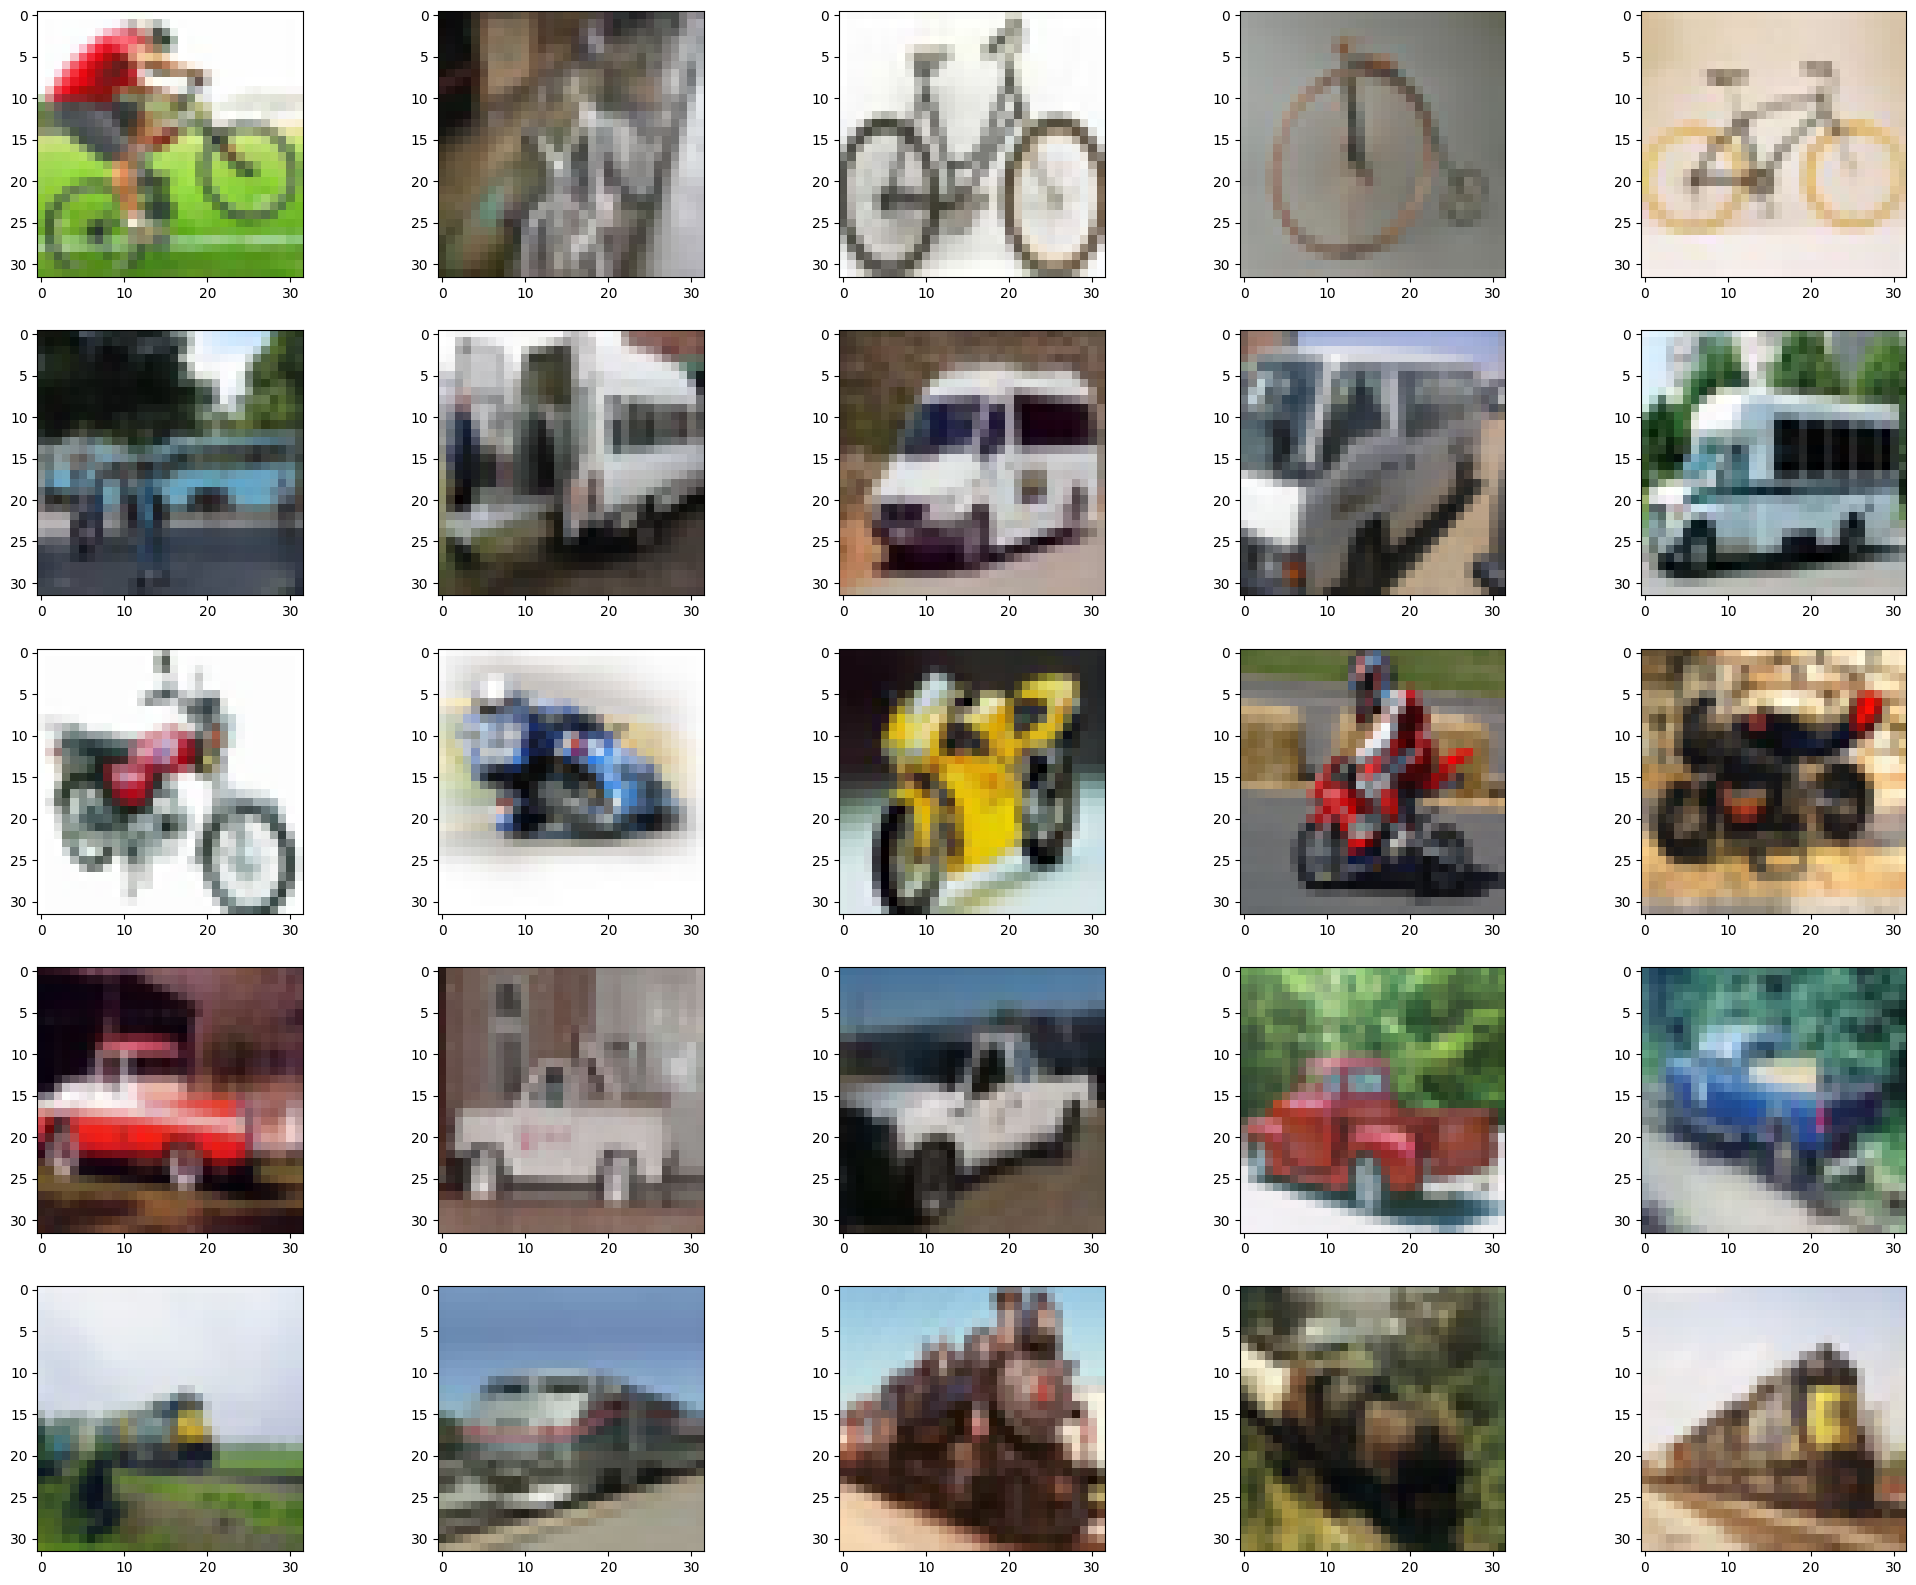

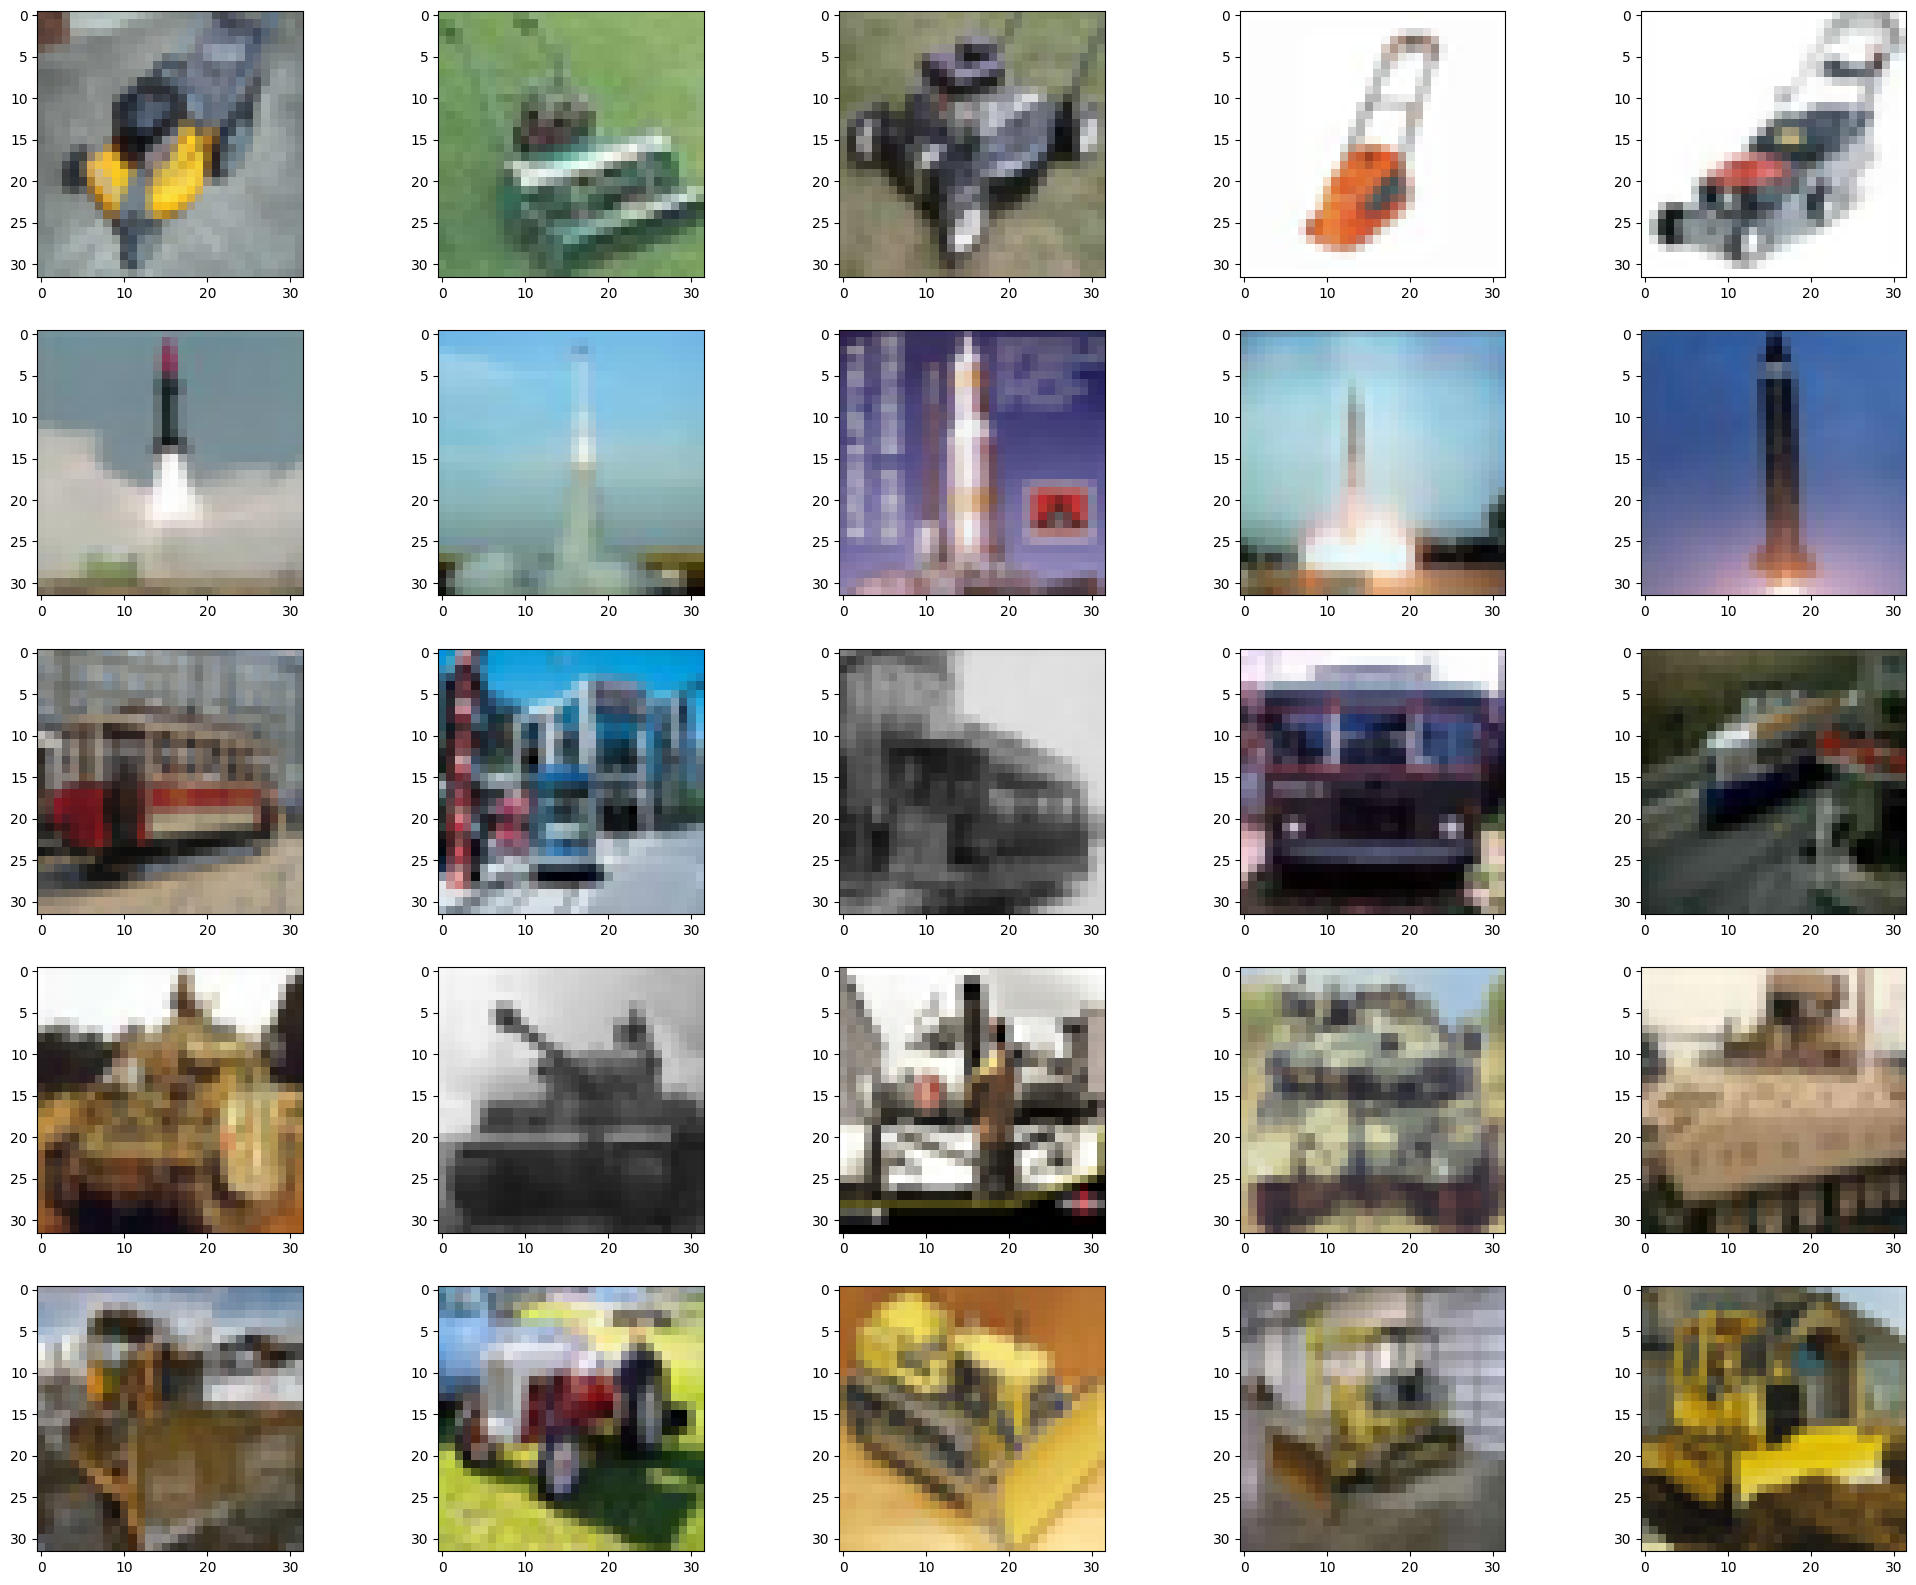

In [52]:
# YOUR CODE HERE
data = torch.tensor(train_set.data)
labels = torch.tensor(train_set.targets)

num_classes_per_superclass = len(superclasses['trees'])
num_samples = num_classes_per_superclass

for superclass in superclasses.keys():
    fig, axs = plt.subplots(num_classes_per_superclass, num_samples, figsize=(25, 20))
    for num_class, index in enumerate(superclass_to_indices[superclass]):
        subset = data[labels == index]
        random_indices = torch.randperm(subset.size(0))
        for num_sample, sample_index in enumerate(random_indices[ : num_samples]):
            axs[num_class, num_sample].imshow(subset[sample_index])
        

<a id="section-3"></a>
### **Section 3: TwoLayerNet Architecture (2 points)**

In this section, you will implement the architecture of a fully connected neural network called `TwoLayerNet`, consisting of two fully connected layers with a ReLU activation in between. The network accepts an input size of 3x32x32 (CIFAR-100 image), a specified hidden layer size, and the number of output classes. In the `__init__` method, define the first fully connected layer that maps the input size to the hidden size, and the second fully connected layer that maps the hidden size to the number of classes. 

Ensure to call the parent class constructor using `super(TwoLayerNet, self).__init__()`. In the `forward` method, flatten the input tensor, pass it through the first layer with ReLU activation, and then through the second layer to obtain the final scores.

**Note:** You are allowed to modify the provided function definitions as needed.

In [118]:
class TwoLayerNet(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        '''
        Initializes the two-layer neural network model.

        Args:
            input_size (int): The size of the input features.
            hidden_size (int): The size of the hidden layer.
            num_classes (int): The number of classes in the dataset.
        '''

        # YOUR CODE HERE
        super().__init__()
        layers = [nn.Linear(input_size, hidden_size), nn.ReLU(), nn.Linear(hidden_size, num_classes)]
        self.model = nn.Sequential(*layers)
    

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE
        # flatten input
        x = x.flatten(start_dim=1)
        return self.model(x)


<a id="section-4"></a>
### **Section 4: ConvNet Architecture (2 points)**

In this section, you will implement a convolutional neural network inspired by the structure of [LeNet-5](https://ieeexplore.ieee.org/document/726791). The network processes color images using three convolutional layers followed by two fully connected layers. Since you need to feed color images into this network, determine the kernel size of the first convolutional layer. Additionally, calculate the number of trainable parameters in the "F6" layer, providing the calculation process.

In [119]:
class ConvNet(nn.Module):

    def __init__(self, non_linear=None, extra_layers=False):
        '''	
        Initializes the convolutional neural network model.
        Follows the architecture of LeNet-5.

        Args:
            None
        '''

        # YOUR CODE HERE
        super().__init__()

        if non_linear is None:
            non_linear1 = nn.Tanh()
            non_linear2 = nn.Sigmoid()
        elif non_linear == "ReLU":
            non_linear1, non_linear2 = nn.ReLU()
        else:
            raise ValueError("Invalid non-linear function. Please choose 'ReLU' or None.")
        
        #TODO add extra layers
        
        layers = []

        # Layer C1 is a convolutional layer with six feature maps.
        # Each unit in each feature map is connected to a 5X5 neighborhood in the input. 
        # output: 6 feature maps of size 28X28
        layers.append(nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5))
        # each layer is passed through a squashing function (hyperbolic tangent)
        layers.append(non_linear1)

        # Layer S2 is a subsampling layer with six feature maps of size 14X14. 
        # Each unit in each feature map is connected to a 2X2 neighborhood in the corresponding feature map in C1.
        # output: 6 feature maps of size 14X14
        layers.append(nn.AvgPool2d(kernel_size=2, stride=2))

        # The result is passed through a sigmoidal function.
        layers.append(non_linear2)

        # Layer C3 is a convolutional layer with 16 feature maps.
        # Each unit in each feature map is connected to several 5X5 
        # neighborhoods at identical locations in a subset of S2’s feature maps
        # output: 16 feature maps of size 10X10
        layers.append(nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5))
        layers.append(non_linear1)
        
        # Layer S4 is a subsampling layer with 16 feature maps of size 5X5. 
        # Each unit in each feature map is connected to a 2X2 neighborhood 
        # in the corresponding feature map in C3
        layers.append(nn.AvgPool2d(kernel_size=2, stride=2))
                  
        # Layer C5 is a convolutional layer with 120 feature maps.
        # Each unit is connected to a 5 5 neighborhood on all 16
        # of S4’s feature maps.
        layers.append(nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5))
        layers.append(non_linear1)
        
        # Flatten the output of C5 (linear layer expects a 2D input of size (batch_size, num_features))
        layers.append(nn.Flatten())
        
        # Layer F6 contains 84 units and is fully connected to C5
        # Layer F6 has 10 164 trainable parameters
        # Total Parameters = input features ×output features + bias (of size output features)
        # 120 * 84 + 84 = 10164
        # TODO: experiment with output features, maybe 128?
        layers.append(nn.Linear(in_features=120, out_features=84))
        layers.append(non_linear1)
        
        layers.append(nn.Linear(in_features=84, out_features=100))
        
        self.model = nn.Sequential(*layers)
                  

    def forward(self, x):
        '''
        Defines the forward pass of the neural network.

        Args:
            x (torch.Tensor): The input tensor.

        Returns:
            torch.Tensor: The output tensor.
        '''

        # YOUR CODE HERE
        out = self.model(x)
        #print("Output shape:", out.shape)
        return out


<a id="section-5"></a>
### **Section 5: Preparation of Training (7 points)**

In this section, you will create a custom dataset class to load the CIFAR-100 data, define a transform function for data augmentation, and set up an optimizer for training. While the previous section utilized the built-in CIFAR-100 class from `torchvision`, in practice, you often need to prepare datasets manually. Here, you will implement the `CIFAR100_loader` class to handle the dataset and use `DataLoader` to make it iterable. You will also define a transform function for data augmentation and an optimizer for updating the model's parameters.

In [120]:
class CIFAR100_loader(Dataset):
    
    def __init__(self, root, train=True, transform=None, download=False):
        '''
        Initializes the CIFAR-100 dataset loader.

        Args:
            root (str): The root directory to store the dataset.
            train (bool): If True, loads the training data; otherwise, loads the test data.
            transform (callable, optional): The data transformations to apply.
            download (bool): If True, downloads the dataset if it is not already available.
        '''
    
        # YOUR CODE HERE
        self.data = torchvision.datasets.CIFAR100(root=root, train=train, download=download, transform=transform)

    def __len__(self):
        '''
        Returns the number of samples in the dataset.

        Returns:
            int: The number of samples in the dataset.
        '''

        # YOUR CODE HERE
        return len(self.data)

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the image and label tensors.
        '''

        # YOUR CODE HERE
        return self.data[idx]

In [121]:
def create_transforms(additional_transform=False):
    '''
    Creates the data transformations for the CIFAR-100 dataset.

    Returns:
        torchvision.transforms.Compose: The data transformations for the dataset.
    '''

    if additional_transform is False:
        transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  
        ])
    elif additional_transform is True:
        transform = transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(10),
        transforms.RandomResizedCrop(32, scale=(0.8, 1.0)),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ])
    else:
        raise ValueError("Invalid transformation type. Please choose 'original' or 'augmented'.")
    
    return transform
    
    

In [122]:
def create_optimizer(model, learning_rate=0.001, weight_decay=1.0, optimizer='adam'):
    '''
    Creates an optimizer for the model.

    Args:
        model (torch.nn.Module): The neural network model.
        learning_rate (float): The learning rate for the optimizer.
        weight_decay (float): The L2 regularization strength.
        optimizer (str): The optimizer to use.

    Returns:
        torch.optim.Adam: The optimizer for the model.
    '''

    # YOUR CODE HERE
    # Adam optimiser with L2 regularisation
    if optimizer == "adam":
        opt = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay, betas=(0.9, 0.98))
    elif optimizer == "sgd":
        opt = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=0.9)
    elif optimizer == "rmsprop":
        opt = torch.optim.RMSprop(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    elif optimizer == "adagrad":
        opt = torch.optim.Adagrad(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    else:
        raise ValueError("Invalid optimizer. Please choose 'adam', 'sgd', 'rmsprop', or 'adagrad'.")
    
    return opt

<a id="section-6"></a>
### **Section 6: Training the Networks (5 points)**

In this section, you will complete the `train` function and use it to train both the `TwoLayerNet` and `ConvNet` models. You will use the custom `CIFAR100_loader`, transform function, and optimizer function that you implemented. The goal is to compare the performance of the two models on the CIFAR-100 dataset.

In [123]:
def validate(net, testloader):
    '''
    Validates the model on the test dataset.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.

    Returns:
        dictionary: The accuracy, precision, recall, and f1 scores for the model.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    correct, total = 0, 0
    y_true, y_pred = [], []
    test_results = {}

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in tqdm(testloader):
            
            # move data to device
            inputs, labels = inputs.to(device), labels.to(device)
            
            # pass inputs to model
            outputs = net(inputs)
            
            # get predicted class
            _, predicted = torch.max(outputs, 1)
            
            # sum correct predictions & total predictions
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            y_true += labels.tolist()
            y_pred += predicted.tolist()
    
    # calculate metrics
    accuracy = metrics.accuracy_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred, average='weighted')
    recall = metrics.recall_score(y_true, y_pred, average='weighted')
    f1 = metrics.f1_score(y_true, y_pred, average='weighted')
    
    test_results['accuracy'] = accuracy
    test_results['precision'] = precision
    test_results['recall'] = recall
    test_results['f1'] = f1

    return test_results

In [124]:
def validate_per_class(net, testloader, classes):
    '''
    Validates the model on the test dataset per class.

    Args:
        net (torch.nn.Module): The neural network model.
        testloader (torch.utils.data.DataLoader): The data loader for the test dataset.
        classes (tuple): The tuple of class names.

    Returns:
        class_accuracy (dictionary): The accuracy per class for the model.
    '''

    # Set the model to evaluation mode
    net.eval()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    class_correct = [0. for _ in range(len(classes))]
    class_total = [0. for _ in range(len(classes))]
    
    class_accuracy = {}

    # Disable gradient computation
    with torch.no_grad():

        # Iterate over the test dataset
        for inputs, labels in tqdm(testloader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            correct_predictions = (predicted == labels).squeeze()

            for i in range(len(labels)):
                label = labels[i]
                class_correct[label] += correct_predictions[i].item()
                class_total[label] += 1

    for i, class_name in enumerate(classes):
        accuracy = 100 * class_correct[i] / class_total[i] if class_total[i] > 0 else 0
        class_accuracy[class_name] = accuracy
        
    return class_accuracy

In [125]:
def train(net, train_loader, criterion, optimizer, epochs=100):
    '''
    Trains the neural network model.

    Args:
        net (torch.nn.Module): The neural network model.
        train_loader (torch.utils.data.DataLoader): The data loader for the training dataset.
        criterion (torch.nn.Module): The loss function.
        optimizer (torch.optim.Optimizer): The optimizer for the model.
        epochs (int): The number of epochs to train the model.

    Returns:
        None
    '''

    # YOUR CODE HERE
    # Set the model to train mode
    net.train()

    # Determine the device to run the model on
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    
    for epoch in tqdm(range(epochs)):
        # Iterate over the train dataset
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device).long()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        

First, initialize the datasets and data loaders for both models.

In [126]:
# YOUR CODE HERE

def create_dataloaders(additional_transform=True, batch_size=512, model='cnn'):
    '''
    Create the data loaders for the CIFAR 100 dataset
    additional_transform (bool): whether to use additional transformations
    batch_size (int): the batch size for the data loaders
    '''

    # FOR THE MLP
    if model == 'mlp':
        # Define the transformations
        transform_mlp = create_transforms(additional_transform=additional_transform)
        
        # Load the CIFAR-100 training set
        train_set_mlp = CIFAR100_loader(root='./data', train=True, download=True, transform=transform_mlp)
        
        # Load the CIFAR-100 test set
        test_set_mlp = CIFAR100_loader(root='./data', train=False, download=True, transform=transform_mlp)
        
        # Create data loaders for the entire CIFAR-100 dataset
        train_data_loader_mlp = DataLoader(train_set_mlp, shuffle=True, batch_size=batch_size)
        test_data_loader_mlp = DataLoader(test_set_mlp, shuffle=False, batch_size=batch_size)
        
        return train_data_loader_mlp, test_data_loader_mlp
    
    # FOR THE CNN
    elif model == 'cnn':
        # Define the transformations
        transform_cnn = create_transforms(additional_transform=additional_transform)
        
        # Load the CIFAR-100 training set
        train_set_cnn = CIFAR100_loader(root='./data', train=True, download=True, transform=transform_cnn)
        
        # Load the CIFAR-100 test set
        test_set_cnn = CIFAR100_loader(root='./data', train=False, download=True, transform=transform_cnn)
        
        # Create data loaders for the entire CIFAR-100 dataset
        train_data_loader_cnn = DataLoader(train_set_cnn, shuffle=True, batch_size=batch_size)
        test_data_loader_cnn = DataLoader(test_set_cnn, shuffle=False, batch_size=batch_size)
        
        return train_data_loader_cnn, test_data_loader_cnn
    
    else: 
        raise ValueError("Invalid model. Please choose 'mlp' or 'cnn'.")

Next, train the TwoLayerNet model on the CIFAR-100 dataset using the training data loader.

In [ ]:
train_data_loader_cnn, test_data_loader_cnn = create_dataloaders(model='cnn')
train_data_loader_mlp, test_data_loader_mlp = create_dataloaders(model='mlp')

In [63]:
# YOUR CODE HERE
epochs = 100
learning_rate=0.001

mlp = TwoLayerNet(32 * 32 * 3, 1024, 100)
criterion = nn.CrossEntropyLoss()
optimizer_mlp = create_optimizer(mlp, learning_rate)

train(mlp, train_data_loader_mlp, criterion, optimizer_mlp, epochs)

print("MLP test accuracy: ")
test_mlp = validate(mlp, test_data_loader_mlp)
print("Test Accuracy MLP per class: ")
test_mlp_per_class = validate_per_class(mlp, test_data_loader_mlp, classes)

100%|██████████| 100/100 [25:01<00:00, 15.02s/it]


Finally, train the ConvNet model on the CIFAR-100 dataset using the training data loader.

In [109]:
# YOUR CODE HERE
epochs = 100
learning_rate=0.001

conv_net = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer_cnn = create_optimizer(conv_net, learning_rate)

train(conv_net, train_data_loader_cnn, criterion, optimizer_cnn, epochs)

print("CNN test accuracy: ")
test_accuracy_cnn = validate(conv_net, test_data_loader_cnn)
print("Test Accuracy CNN per class: ")
test_accuracy_cnn_per_class = validate_per_class(conv_net, test_data_loader_cnn, classes)

100%|██████████| 100/100 [21:14<00:00, 12.75s/it]


<a id="section-7"></a>
### **Section 7: Setting Up the Hyperparameters (14 points)**

In this section, you will experiment with both the `ConvNet` and `TwoLayerNet` models by setting up and tuning the hyperparameters to achieve the highest possible accuracy. You have the flexibility to modify the training process, including the `train` function, `DataLoader`, `transform` functions, and optimizer as needed.

1. Adjust the hyperparameters, including learning rate, batch size, number of epochs, optimizer, weight decay, and transform function to improve the performance of both networks. Modify the training procedure and architecture as necessary. You can also add components like Batch Normalization layers.
2. Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.
3. Show the final results and describe the modifications made to enhance performance. Discuss the impact of hyperparameter tuning on both `TwoLayerNet` and `ConvNet`.
4. Compare the two networks in terms of architecture, performance, and learning rates. Provide a detailed explanation of the differences observed.

**Note:** Do not use external pre-trained networks and limit additional convolutional layers to a maximum of three beyond the original architecture.

Test the performance of TwoLayerNet after hyperparameter tuning and compare it with the ConvNet model. Provide a detailed explanation of the results.

In [134]:
def sweep(learning_rate=0.001, batch_size=512, epochs=100, optimizer='adam', weight_decay=1.0, nonlinear_fn=None, layers=False, transformations=False, model='cnn', chkpt=None):
    '''
    Sweeps hyperparameters 

    Args:
        learning_rate (float): The learning rate to test.
        batch_size (int): The batch size to test.
        epochs (int): The number of epochs to test.
        optimizer (str): The optimizer to test.
        weight_decay (float): The weight decay to test.
        nonlinear_fn (str): The non-linear function to test.
        layers (bool): The number of layers to test.
        transformations (bool): The transformations to test.
        model (str): The model to test.

    Returns:
        results (dict): A dict of 2 dictionaries containing the test metrics and accuracy per class
        model (torch.nn.Module): The model to save.
        test_data_loader (torch.utils.data.DataLoader): The data loader for the test dataset.
    '''
    
    # original hyperparameters
    # lr = 0.001, batch_size = 512, epochs = 100, optimizer = AdamW, weight_decay = 1, nonlinear_fn = sigmoid/tanh, layers = original, transformations = original
    
    if chkpt is None:
        train_data_loader, test_data_loader = create_dataloaders(additional_transform=transformations, batch_size=batch_size, model=model)
        if model == "mlp":
            net = TwoLayerNet(32 * 32 * 3, 1024, 100)
        elif model == "cnn":
            net = ConvNet()
        else:
            raise ValueError("Invalid model. Please choose 'mlp' or 'cnn'.")
    
        criterion = nn.CrossEntropyLoss()
        opt = create_optimizer(net, learning_rate=learning_rate, weight_decay=weight_decay, optimizer=optimizer)
        train(conv_net, train_data_loader, criterion, opt)
    
    elif chkpt is not None: 
        net = chkpt
    
    test_accuracy = validate(net, test_data_loader)
    test_accuracy_per_class = validate_per_class(net, test_data_loader, classes)
    
    results = {"metrics": test_accuracy, "class accuracies": test_accuracy_per_class}
    
    return results, net
    
    # YOUR CODE HERE

Test the performance of ConvNet after hyperparameter tuning and compare it with the TwoLayerNet model. Provide a detailed explanation of the results.

In [129]:
import json

In [ ]:
# YOUR CODE HERE
sweep_results = {'original': {}, 'learning_rate': {}, 'batch_size': {}, 'epochs': {}, 'optimizer': {}, 'weight_decay': {}, 'nonlinear_fn': {}, 'layers': {}, 'transformations': {}}

# original hyperparameters
results, model = sweep()
torch.save(model.state_dict(), f"/model_chkpts/cnn_model_original.pt")
sweep_results['original'] = results

with open("sweep_results.json", "w") as f:
    json.dump(sweep_results, f)


In [ ]:
# TODO if there is a .pt file then just load it? 

In [ ]:
# # test the learning rates
# learning_rates = [0.01, 0.1]
# for lr in learning_rates:
#     results, model = sweep(learning_rate=lr)
#     
#     # Store the results for the current learning rate
#     sweep_results['learning_rate'][lr] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_lr_{lr}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
#         
# # test batch size
# batch_size = [256, 1024]
# for batch in batch_size:
#     results, model = sweep(batch_size=batch)
#     
#     # Store the results for the current learning rate
#     sweep_results['batch_size'][batch] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_batch_{batch}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test epochs
# epochs = [10, 500]
# for epoch in epochs:
#     results, model = sweep(epochs=epoch)
#     
#     # Store the results for the current learning rate
#     sweep_results['epochs'][epoch] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_epoch_{epoch}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test optimizer
# optimizer = ['sgd', 'rmsprop', 'adagrad']
# for op in optimizer:
#     results, model = sweep(optimizer=op)
#     
#     # Store the results for the current learning rate
#     sweep_results['optimizer'][op] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_optimizer_{op}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test weight decay
# weight_decay = [0.1, 0.01]
# for wd in weight_decay:
#     results, model = sweep(weight_decay=wd)
#     
#     # Store the results for the current learning rate
#     sweep_results['weight_decay'][wd] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_weightdecay_{wd}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test nonlinear function
# nonlinear_fn = ["relu"]
# for nl in nonlinear_fn:
#     results, model = sweep(nonlinear_fn=nl)
#     
#     # Store the results for the current learning rate
#     sweep_results['nonlinear_fn'][nl] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_nonlinear_{nl}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test layers
# layers = [True]
# for layer in layers:
#     results, model = sweep(layers=layer)
#     
#     # Store the results for the current learning rate
#     sweep_results['layers'][layer] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_layers_{layer}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)
# 
# # test transformations
# transformations = [True]
# for transformation in transformations:
#     results, model = sweep(transformations=transformation)
#     
#     # Store the results for the current learning rate
#     sweep_results['transformations'][transformation] = results
#     
#     torch.save(model.state_dict(), f"/model_chkpts/cnn_model_transformations_{transformation}.pt")
#     
#     with open("sweep_results.json", "w") as f:
#         json.dump(sweep_results, f)

In [135]:
import os

In [136]:
def read_sweep_results(results_file):
    """Read the sweep results from the JSON file."""
    if os.path.exists(results_file):
        with open(results_file, "r") as f:
            return json.load(f)
    return {}

In [137]:
def run_sweep(hyperparameter_name, hyperparameter_values, sweep_results, save_path="/model_chkpts", results_file="sweep_results.json", m="cnn"):
    """
    Run sweeps for different hyperparameters, save model checkpoints, and write results to disk.
    
    Args:
        hyperparameter_name (str): Name of the hyperparameter to be tested (e.g. 'learning_rate', 'batch_size').
        hyperparameter_values (list): A list of values for the hyperparameter.
        sweep_results (dict): Dictionary to store sweep results.
        save_path (str): Directory path where model checkpoints will be saved.
        results_file (str): Path to the JSON file where sweep results will be saved.
        
    Returns:
        None
    """
    
    for value in hyperparameter_values:
        
        # Define the model filename based on hyperparameter value
        model_filename = f"{m}_model_{hyperparameter_name}_{value}.pt"
        model_filepath = os.path.join(save_path, model_filename)
        
        # Check if the model checkpoint already exists
        if os.path.exists(model_filepath):
            print(f"Loading existing model from: {model_filepath}")
            model = torch.load(model_filepath)  # Load the model if it exists
            
            results, model = sweep(chkpt=model)
            
            if hyperparameter_name not in sweep_results:
                sweep_results[hyperparameter_name] = {}
                
            sweep_results[hyperparameter_name][value] = results
            
            print("Results retrieved for: ", hyperparameter_name, value)
        
        else:
            # run the sweep for the current hyperparameter value
            # ex. sweep(learning_rate=0.01)
            kwargs = {hyperparameter_name: value, 'model': m}
            results, model = sweep(**kwargs)
            
            # store the results for the current hyperparameter value
            if hyperparameter_name not in sweep_results:
                sweep_results[hyperparameter_name] = {}
            sweep_results[hyperparameter_name][value] = results
            
            # save the model checkpoint in case of a crash
            torch.save(model.state_dict(), model_filepath)
            
            # save the sweep results to a JSON file in case of a crash
            with open(results_file, "w") as f:
                json.dump(sweep_results, f)
            
            print("Results saved for: ", hyperparameter_name, value)

In [ ]:
sweep_results = {}

# lists of hyperparameters
learning_rates = [0.01, 0.1]
batch_sizes = [256, 1024]
epochs = [10, 500]
optimizers = ['sgd', 'rmsprop', 'adagrad']
weight_decays = [0.1, 0.01]
nonlinear_fns = ["relu"]
transformations = [True]
m = "cnn"

# Run sweeps
run_sweep('learning_rate', learning_rates, sweep_results, m)
run_sweep('batch_size', batch_sizes, sweep_results, m)
run_sweep('epochs', epochs, sweep_results, m)
run_sweep('optimizer', optimizers, sweep_results, m)
run_sweep('weight_decay', weight_decays, sweep_results, m)
run_sweep('nonlinear_fn', nonlinear_fns, sweep_results, m)
run_sweep('transformations', transformations, sweep_results, m)

Files already downloaded and verified
Files already downloaded and verified


 39%|███▉      | 39/100 [09:22<14:07, 13.90s/it]

Add two more layers to both `TwoLayerNet` and `ConvNet`. You can decide the size and placement of these layers. Evaluate if these changes result in higher performance and explain your findings.

In [ ]:
layers = [True]
#run_sweep('layers', layers, sweep_results, m)

<a id="section-8"></a>
### **Section 8: Visualizing the STL-10 Dataset and Preparing the Data Loader (3 points)**

In this section, you will work with a subset of the [STL-10](https://cs.stanford.edu/~acoates/stl10/) dataset, containing higher resolution images and different object classes than CIFAR-100. Before fine-tuning your ConvNet on this dataset, first complete the `visualise_stl10` function to display sample images from the following 5 classes:

1. **Bird**
2. **Deer**
3. **Dog**
4. **Horse**
5. **Monkey**

In [ ]:
def visualise_stl10(class_mapping):
    '''
    Visualizes 5 images from each specified class in the STL-10 dataset.

    Args:
        class_mapping (dict): A dictionary mapping class indices to class names.
    '''

    # YOUR CODE HERE

In [ ]:
# Define the class mapping for bird, deer, dog, horse, and monkey
class_mapping = {1: 'bird', 4: 'deer', 5: 'dog', 6: 'horse', 7: 'monkey'}

# Visualize STL-10 classes
visualise_stl10(class_mapping)

After visualizing the data, implement the `STL10_loader` class to create a custom data loader that initializes the dataset, extracts the target classes, and applies the necessary image transformations. Once these tasks are completed, you will move on to fine-tuning the ConvNet on this dataset in the next section.

In [ ]:
class STL10_loader(Dataset):
    def __init__(self, root, train=True, transform=None):
        '''
        Initializes the STL10 dataset.

        Args:
            root (str): Root directory of the dataset.
            train (bool): If True, use the training set, otherwise use the test set.
            transform (callable, optional): A function/transform to apply to the images.
        '''

        # YOUR CODE HERE
        
    def __len__(self):
        '''
        Returns the number of samples in the dataset.
        '''

        # YOUR CODE HERE

    def __getitem__(self, idx):
        '''
        Retrieves a sample from the dataset at the specified index.

        Args:
            idx (int): The index of the sample to retrieve.

        Returns:
            tuple: A tuple containing the transformed image and its target label.
        '''

        # YOUR CODE HERE

<a id="section-9"></a>
### **Section 9: Fine-tuning ConvNet on STL-10 (14 points)**

In this section, you will load the pre-trained parameters of the ConvNet (trained on CIFAR-100) and modify the output layer to adapt it to the new dataset containing 5 classes. You can either first load the pre-trained parameters and then modify the output layer, or change the output layer before loading the matched pre-trained parameters. Once modified, you will train the model and document the settings of hyperparameters, accuracy, and learning curve. Additionally, visualize both the training loss and accuracy to assess the learning process. To gain a deeper understanding of the feature learning process, consider using techniques like [**t-sne**](https://lvdmaaten.github.io/tsne/) for feature space visualization.

In [ ]:
# YOUR CODE HERE

<a id="section-10"></a>
### **Section 10: Bonus Challenge (optional)**

Try to achieve the highest possible accuracy on the test dataset (5 classes from STL-10) by adjusting hyperparameters, modifying architectures, or applying techniques like data augmentation. The top-performing teams will earn bonus points that can significantly boost their final lab grade, even allowing it to exceed 10 (up to 11):

- **1st place:** +1.0 to the final grade of the final lab
- **2nd place:** +0.8 to the final grade of the final lab
- **3rd place:** +0.6 to the final grade of the final lab
- **4th place:** +0.4 to the final grade of the final lab
- **5th place:** +0.2 to the final grade of the final lab

**Hint:** You may use techniques like data augmentation, freezing early layers, modifying architecture, or optimizing hyperparameters. Only data from CIFAR-100 and STL-10 can be used, and you cannot add more than 3 additional convolutional layers.

In [ ]:
# YOUR CODE HERE

<a id="section-x"></a>
### **Section X: Individual Contribution Report *(Mandatory)***

Because we want each student to contribute fairly to the submitted work, we ask you to fill out the textcells below. Write down your contribution to each of the assignment components in percentages. Naturally, percentages for one particular component should add up to 100% (e.g. 30% - 30% - 40%). No further explanation has to be given.

| Name | Contribution on Research | Contribution on Programming | Contribution on Writing |
| -------- | ------- | ------- | ------- |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |
|  | - % | - % | - % |

### - End of Notebook -